# Model Development - Model for volatility Prediction


## What is Volatility?

**Volatility** is a statistical measure of the dispersion of returns for a given security or market index. In simpler terms, it indicates how much the price of an asset fluctuates over a specific period. High volatility means that the price can change dramatically in a short time, while low volatility indicates more stable prices.

Volatility is a critical concept in finance for several reasons:
- **Risk Assessment**: It serves as a proxy for the uncertainty and risk associated with an asset
- **Portfolio Management**: Investors use volatility to construct diversified portfolios and manage risk
- **Trading Strategies**: Many trading strategies are built around volatility patterns, including mean reversion and momentum strategies
- **Market Sentiment**: Spikes in volatility often indicate market stress, uncertainty, or significant events

## Types of Volatility

### 1. Historical Volatility (HV) 
Calculated using past price data, historical volatility measures how much the price of an asset has fluctuated over a specific period in the past. We will use dialy historical volatility calculated from log returns as our target variable.

### 2. Implied Volatility (IV)
Derived from option prices, implied volatility reflects the market's expectation of future volatility. It looks forward and represents what the market thinks will happen.

### 3. Realized Volatility (RV)
This is a more precise measure of historical volatility calculated using high-frequency intraday data, such as minute-by-minute or hour-by-hour prices. It provides a more accurate measure of volatility compared to traditional methods that rely on daily closing prices.

## Why Bitcoin Volatility Matters

Bitcoin and cryptocurrencies are known for their exceptionally high volatility compared to traditional assets:
- **Price Discovery**: Bitcoin is still a relatively young asset class undergoing price discovery
- **24/7 Markets**: Unlike traditional markets, crypto markets never close, leading to continuous price movements
- **Regulatory Uncertainty**: News about regulations can cause dramatic price swings

Understanding and predicting Bitcoin volatility is crucial for:
- **Risk Management**: Setting appropriate position sizes and stop-losses
- **Option Trading**: Pricing crypto derivatives accurately
- **Portfolio Allocation**: Determining how much capital to allocate to crypto assets
- **Market Timing**: Identifying periods of high/low volatility for entry and exit points

## Measuring Volatility: Historical Volatility (HV)

One of the most common and robust volatility measures is **Historical Volatility (HV)**, which is calculated using historical price data to estimate the actual volatility experienced by an asset.

### The Formula for Historical Volatility (HV)

$$ HV = 100 \cdot \sqrt{\frac{252}{N} \sum_{i=1}^{N} R_i^2} $$

Where:
- $HV$ = Historical Volatility (annualized percentage)
- $N$ = Number of trading days in the period (typically 252 for a year, 21 for a month)
- $R_i$ = Continuously compounded daily returns (log returns)
- The factor of 252 annualizes the volatility (assuming 252 trading days per year)
- The factor of 100 converts the result to a percentage

However, since we are working with crypto data that trades 24/7, we may adjust the annualization factor based on the number of days in a year (365).
In that case, the formula becomes:

$$ HV = 100 \cdot \sqrt{\frac{365}{N} \sum_{i=1}^{N} R_i^2} $$

And $N$ for a month would be 30 days instead of 21 trading days.

### Computing Log Returns

The continuously compounded daily returns $R_i$ are calculated as:

$$ R_i = \ln\left(\frac{P_i}{P_{i-1}}\right) $$

Where:
- $P_i$ = Price of the asset on day $i$
- $P_{i-1}$ = Price of the asset on day $i-1$
- $\ln$ = Natural logarithm

**Why use log returns instead of simple returns?**
1. **Time-additivity**: Log returns can be summed across time periods
2. **Symmetry**: Equal magnitude gains and losses have equal absolute log returns
3. **Statistical properties**: Log returns are more likely to be normally distributed
4. **Continuous compounding**: Better represents continuous price changes

### Interpretation of Historical Volatility

- **HV = 20%**: Low volatility - the asset's price is relatively stable
- **HV = 50%**: Moderate volatility - typical for stocks during normal market conditions
- **HV = 80%**: High volatility - common for Bitcoin and cryptocurrencies
- **HV > 100%**: Extreme volatility - often seen during market crashes or euphoric rallies

## Alternative Volatility Estimators

While the standard historical volatility formula is widely used, several alternative estimators can provide more efficient or robust estimates:

### Parkinson Volatility Estimator
Uses high and low prices to estimate volatility, which can be more efficient than close-to-close estimators:

$$ \sigma_{\text{Parkinson}} = \sqrt{\frac{1}{4N \ln(2)} \sum_{i=1}^{N} \left(\ln\frac{H_i}{L_i}\right)^2} $$

Where $H_i$ and $L_i$ are the high and low prices on day $i$.

### Garman-Klass Volatility Estimator
Incorporates open, high, low, and close prices for a more comprehensive measure:

$$ \sigma_{\text{GK}}^2 = \frac{1}{N} \sum_{i=1}^{N} \left[\frac{1}{2}\left(\ln\frac{H_i}{L_i}\right)^2 - (2\ln2-1)\left(\ln\frac{C_i}{O_i}\right)^2\right] $$

Where $O_i$, $H_i$, $L_i$, and $C_i$ are the open, high, low, and close prices on day $i$.

### Rogers-Satchell Volatility Estimator
Designed to handle trending markets better than other estimators:

$$ \sigma_{\text{RS}}^2 = \frac{1}{N} \sum_{i=1}^{N} \left[\ln\frac{H_i}{C_i} \cdot \ln\frac{H_i}{O_i} + \ln\frac{L_i}{C_i} \cdot \ln\frac{L_i}{O_i}\right] $$

## Our goal

This project aims to build a comprehensive volatility prediction model for Bitcoin using machine learning techniques. By leveraging historical price data, technical indicators, and engineered features. 

### First Part: Regression Model for Volatility Prediction

- **Objective**: Develop a regression model to predict the next-month (30 days) historical volatility (HV) of Bitcoin based on past price data and technical indicators.
- **Target Variable**: The target variable for our regression model will be the next-month (30 days) historical volatility (HV) of Bitcoin, calculated using the formula mentioned above based on log returns.

### Second Part: Classification Model for Volatility Prediction
If the first model will not be able to predict volatility with sufficient accuracy, we will pivot to a classification approach where we will classify the next-month volatility into discrete categories (e.g., low, medium, high) based on predefined thresholds. This can provide actionable insights even if precise numerical predictions are challenging.

## Import Libraries, Define Constants and Load Data


In [367]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set global plotting style
sns.set_theme(style="whitegrid")

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    StackingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

from utils.common_utils import (
    time_series_train_val_test_split,
    plot_forecasts,
    calculate_evaluation_metrics,
    plot_top_models,
)

from utils.volatility_prediction_utils import (
    calculate_parkinson_volatility,
    calculate_garman_klass_volatility,
    calculate_roger_satchel_volatility,
    train_model_with_feature_sets,
    compare_feature_sets_results,
    train_neural_network_with_feature_sets,
    calculate_classification_metrics,
    plot_confusion_matrix,
    train_classifier_with_feature_sets,
)

from utils.model_development_classes import VolatilityLSTM, AttentionLSTM, VolatilityGRU

In [298]:
# Constants

# Base directories
DATA_DIR = Path("../data/")
FILE_NAME = "bitcoin_data_processed.csv"
DATA_PATH = DATA_DIR / FILE_NAME

# Reproducibility
RANDOM_SEED = 2137

# Data split ratios
TRAIN_SIZE = 0.7
VALIDATION_SIZE = 0.15
TEST_SIZE = 0.15

In [299]:
# Load data
df = pd.read_csv(DATA_PATH)

# Ensure 'Date' column is in datetime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

## Prepare data for building model

### 1. Calculate Historical Volatility and Prepare Data for Modeling

#### Create Historical Volatility using log returns

We will calculate the historical volatility using a 7-day rolling window based on the log returns already present in our dataset. The formula used will annualize the volatility based on 365 days, suitable for the 24/7 trading nature of cryptocurrencies. We will also add other volatility estimators as features to help our model better understand volatility patterns.

In [300]:
# Calculate Historical Volatility using log returns
# We already have log returns calculated

window = 30  # 30-day rolling window
df["Volatility"] = df["Log_Return"].rolling(window=window).std() * np.sqrt(
    365
)  # Annualized volatility

# Calculate and add other volatility estimators as features
df["Parkinson_Volatility"] = calculate_parkinson_volatility(df, window)
df["Garman_Klass_Volatility"] = calculate_garman_klass_volatility(df, window)
df["Roger_Satchel_Volatility"] = calculate_roger_satchel_volatility(df, window)

# Drop NaN values resulting from rolling calculation
print(f"Data shape before dropping NaNs: {df.shape}")
df = df.dropna(subset=["Volatility"])
print(f"Data shape after dropping NaNs: {df.shape}")

print(f"Number of missing values: {df.isnull().sum().sum()}")

Data shape before dropping NaNs: (4107, 38)
Data shape after dropping NaNs: (4078, 38)
Number of missing values: 0


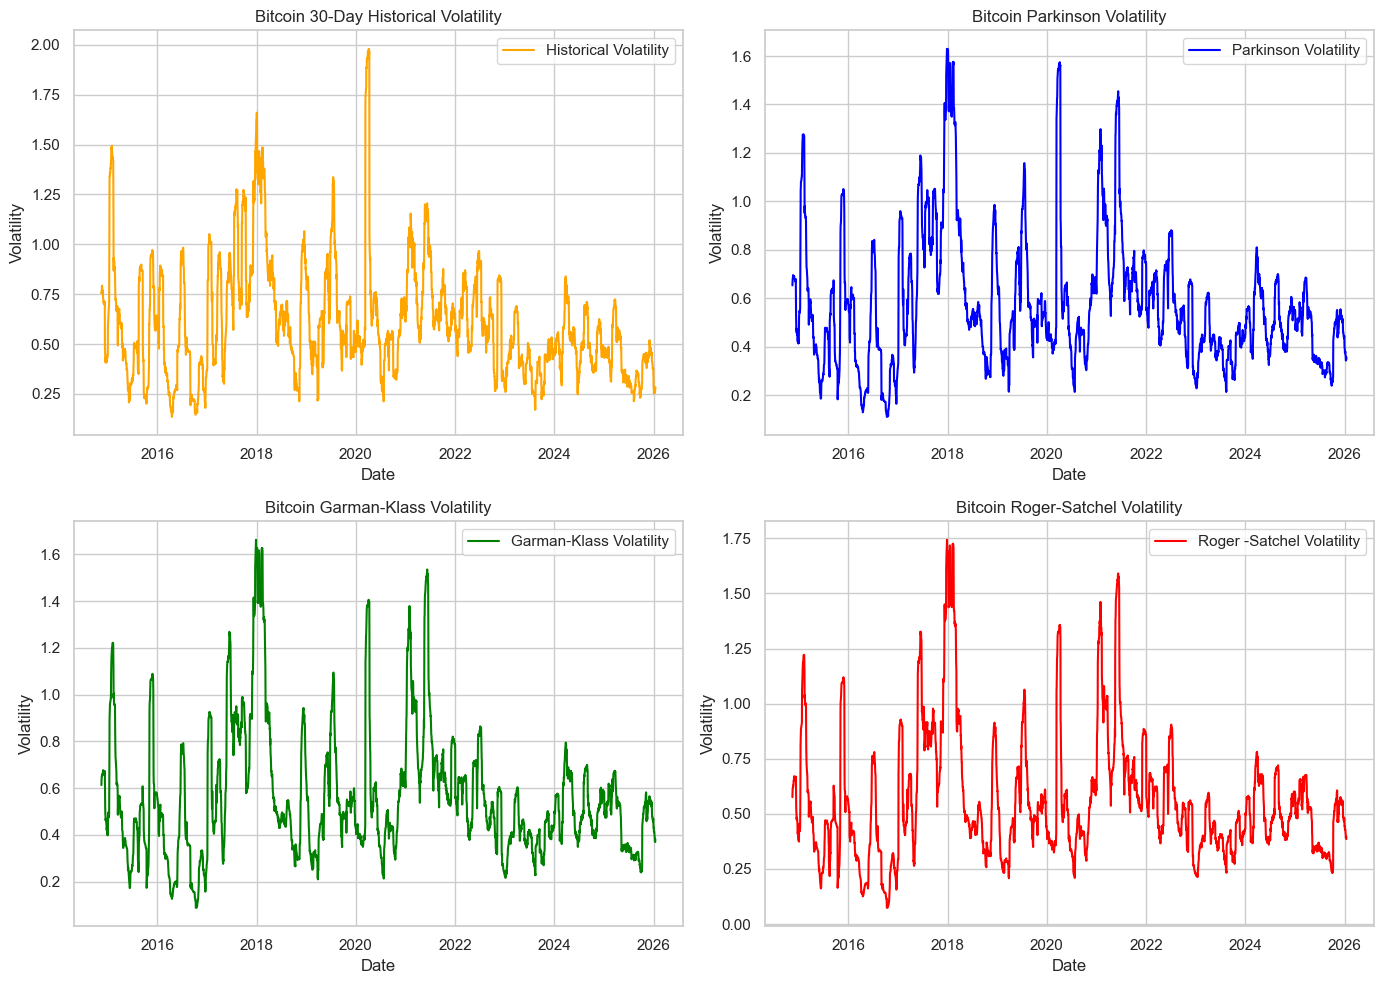

In [301]:
# Plot all volatility estimators in one plot (2x2 grid)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df.index, df["Volatility"], label="Historical Volatility", color="orange")
plt.title("Bitcoin 30-Day Historical Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(
    df.index, df["Parkinson_Volatility"], label="Parkinson Volatility", color="blue"
)
plt.title("Bitcoin Parkinson Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(
    df.index,
    df["Garman_Klass_Volatility"],
    label="Garman-Klass Volatility",
    color="green",
)
plt.title("Bitcoin Garman-Klass Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(
    df.index,
    df["Roger_Satchel_Volatility"],
    label="Roger -Satchel Volatility",
    color="red",
)
plt.title("Bitcoin Roger-Satchel Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.tight_layout()
plt.show()

#### Feature Engineering for Volatility Prediction

In our data we already have many useful features calculated such as technical indicators or moving averages. We also added other volatility estimators as features to help our model better understand volatility patterns.

We will add some volatitility specific features such as:
- Lagged volatility values (e.g., 1-day, 7-day, 14-day lags)
- Rolling statistics of volatility (e.g., rolling mean, rolling std dev)
- Changes and momentum of volatility (e.g., volatility returns, volatility momentum)

In [302]:
# Lagged volatility features
df["Volatility_Lag1"] = df["Volatility"].shift(1)
df["Volatility_Lag7"] = df["Volatility"].shift(7)
df["Volatility_Lag14"] = df["Volatility"].shift(14)
df["Volatility_Lag30"] = df["Volatility"].shift(30)

# Moving averages of volatility
df["Volatility_MA_7"] = df["Volatility"].rolling(window=7).mean()
df["Volatility_MA_14"] = df["Volatility"].rolling(window=14).mean()
df["Volatility_MA_30"] = df["Volatility"].rolling(window=30).mean()

# Standard deviation of volatility over different windows
df["Volatility_STD_7"] = df["Volatility"].rolling(window=7).std()
df["Volatility_STD_14"] = df["Volatility"].rolling(window=14).std()
df["Volatility_STD_30"] = df["Volatility"].rolling(window=30).std()

# Volatility changes and momentum
df["Volatility_Change"] = df["Volatility"].pct_change()
df["Volatility_Change_7d"] = df["Volatility"].pct_change(periods=7)
df["Volatility_Change_14d"] = df["Volatility"].pct_change(periods=14)
df["Volatility_Change_30d"] = df["Volatility"].pct_change(periods=30)
df["Volatility_Momentum"] = df["Volatility"] - df["Volatility_MA_30"]

# Ratio features between different volatility estimators
df["Parkinson_to_HV_Ratio"] = df["Parkinson_Volatility"] / (df["Volatility"] + 1e-8)
df["GK_to_HV_Ratio"] = df["Garman_Klass_Volatility"] / (df["Volatility"] + 1e-8)
df["RS_to_HV_Ratio"] = df["Roger_Satchel_Volatility"] / (df["Volatility"] + 1e-8)

# Drop NaN values resulting from feature engineering
print(f"Data shape before dropping NaNs: {df.shape}")
df = df.dropna()
print(f"Data shape after dropping NaNs: {df.shape}")

Data shape before dropping NaNs: (4078, 56)
Data shape after dropping NaNs: (4048, 56)


## Part 1: Regression Model for Volatility Prediction

### 1. Add target variable to our dataset

We will try to forecast volatility for 30 days (1 month) ahead. It will be more useful from practical point of view than trying to predict next day volatility.

In [303]:
forecast_horizon = 30  # Forecasting 30 days ahead
df["Volatility_Future"] = df["Volatility"].shift(-forecast_horizon)

# Drop NaN values resulting from shifting
df = df.dropna(subset=["Volatility_Future"])

### 2. Preparing data

#### Define Feataures Sets

We will define different sets of features to test their predictive power for volatility forecasting. Along with each set we will store information about how many days in the past we need to look to calculate those features. 

In [304]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Return', 'Log_Return', 'Price_Diff',
       'Volume', 'Close_Lag1', 'Close_Lag5', 'Close_Lag7', 'Close_Lag30',
       'Return_Lag1', 'Return_Lag5', 'Return_Lag7', 'Return_Lag30', 'SMA_30',
       'Rolling_Mean_Return_30', 'Rolling_Std_Return_30', 'Low_High_Diff',
       'Open_Close_Diff', 'Open_Close_Up', 'Close_Change_5d',
       'Close_Change_10d', 'Close_Change_20d', 'MACD', 'RSI', 'Month',
       'DayOfWeek', 'Day', 'Month_Sin', 'Month_Cos', 'DayOfWeek_Sin',
       'DayOfWeek_Cos', 'Volatility', 'Parkinson_Volatility',
       'Garman_Klass_Volatility', 'Roger_Satchel_Volatility',
       'Volatility_Lag1', 'Volatility_Lag7', 'Volatility_Lag14',
       'Volatility_Lag30', 'Volatility_MA_7', 'Volatility_MA_14',
       'Volatility_MA_30', 'Volatility_STD_7', 'Volatility_STD_14',
       'Volatility_STD_30', 'Volatility_Change', 'Volatility_Change_7d',
       'Volatility_Change_14d', 'Volatility_Change_30d', 'Volatility_Momentum',
       'Parkinson

In [305]:
# FEATURE SETS WITH LOOKBACK DAYS

FEATURE_SETS = {
    "minimal": {
        "features": [
            "Close",
            "Volume",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 1,
    },
    "price_only": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 35,
    },
    "volatility_only": {
        "features": [
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 61,
    },
    "simple_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
        ],
        "lookback_days": 45,
    },
    "base": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 35,
    },
    "base_single_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
        ],
        "lookback_days": 35,
    },
    "base_with_short_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_MA_7",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 38,
    },
    "compact_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Std_Return_30",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_Change_7d",
        ],
        "lookback_days": 45,
    },
    "base_with_medium_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 45,
    },
    "base_with_long_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 61,
    },
    "all_features": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 61,
    },
}

# Quick access
BASE_FEATURES = FEATURE_SETS["base"]["features"]
ALL_FEATURES = FEATURE_SETS["all_features"]["features"]

In [306]:
# Dictionary to store regression model results
REGRESSION_MODEL_RESULTS = {}

#### Split the data into train, validation and test sets

In [307]:
# Split data into train, validation, and test sets
df_train, df_val, df_test = time_series_train_val_test_split(
    df, train_size=TRAIN_SIZE, val_size=VALIDATION_SIZE
)

print(f"Train set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")

Train set shape: (2812, 57)
Validation set shape: (603, 57)
Test set shape: (603, 57)


In [308]:
# Define features and target variable
X_train = df_train.drop(columns=["Volatility_Future"])
y_train = df_train["Volatility_Future"]

X_val = df_val.drop(columns=["Volatility_Future"])
y_val = df_val["Volatility_Future"]

X_test = df_test.drop(columns=["Volatility_Future"])
y_test = df_test["Volatility_Future"]

### 3. Baseline Models

#### 1. Naive Forecasting Model - future volatility is equal to the most recent observed volatility

In [309]:
# Evaluate Naive Model (predicting next volatility as current volatility)
y_pred_naive = df_val["Volatility"]
metrics_naive = calculate_evaluation_metrics(y_val, y_pred_naive)

print("\nNaive Model Evaluation Metrics:")
for metric, value in metrics_naive.items():
    print(f"  {metric}: {value:.6f}")

REGRESSION_MODEL_RESULTS["Naive"] = {
    "model": "Naive",
    "features": None,
    "train_metrics": None,
    "val_metrics": metrics_naive,
}


Naive Model Evaluation Metrics:
  MAE: 0.174741
  RMSE: 0.226056
  MAPE: 40.999514
  Directional_Accuracy: 46.677741


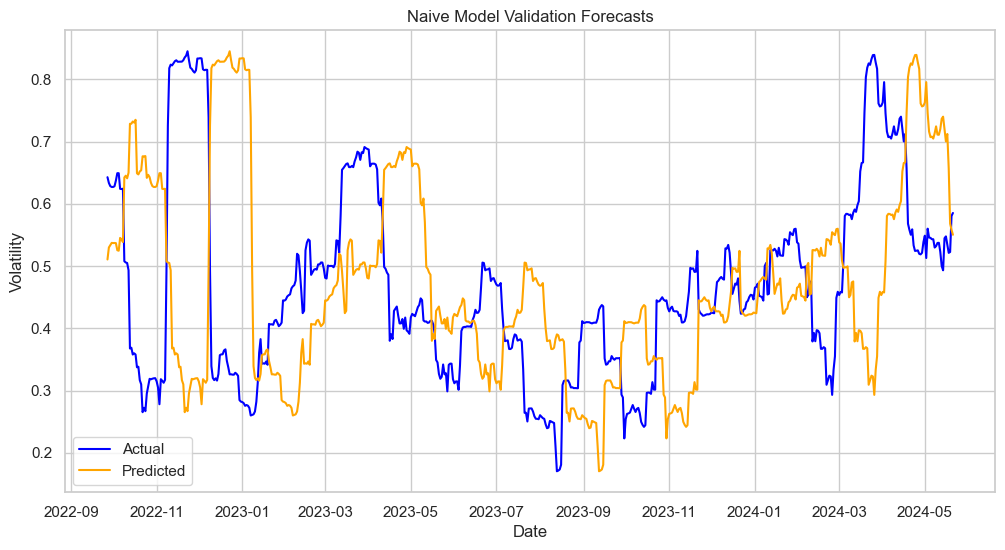

In [310]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    y_pred_naive,
    title="Naive Model Validation Forecasts",
    y_label="Volatility",
)

#### 2. Historical Mean

This model predicts that future volatility will be equal to the mean volatility observed during the training period.

In [311]:
# Calculate historical mean from training data
historical_mean = df_train["Volatility"].mean()
print(f"Historical Mean Volatility: {historical_mean:.6f}")

# Predict using historical mean
y_pred_mean = np.full(len(y_val), historical_mean)

# Evaluate
metrics_mean = calculate_evaluation_metrics(y_val, y_pred_mean)

print("\nHistorical Mean Model Evaluation Metrics:")
for metric, value in metrics_mean.items():
    print(f"  {metric}: {value:.6f}")

REGRESSION_MODEL_RESULTS["Historical_Mean"] = {
    "model": "Historical Mean",
    "features": None,
    "train_metrics": None,
    "val_metrics": metrics_mean,
}

Historical Mean Volatility: 0.677633

Historical Mean Model Evaluation Metrics:
  MAE: 0.233925
  RMSE: 0.260420
  MAPE: 63.909646
  Directional_Accuracy: 51.162791


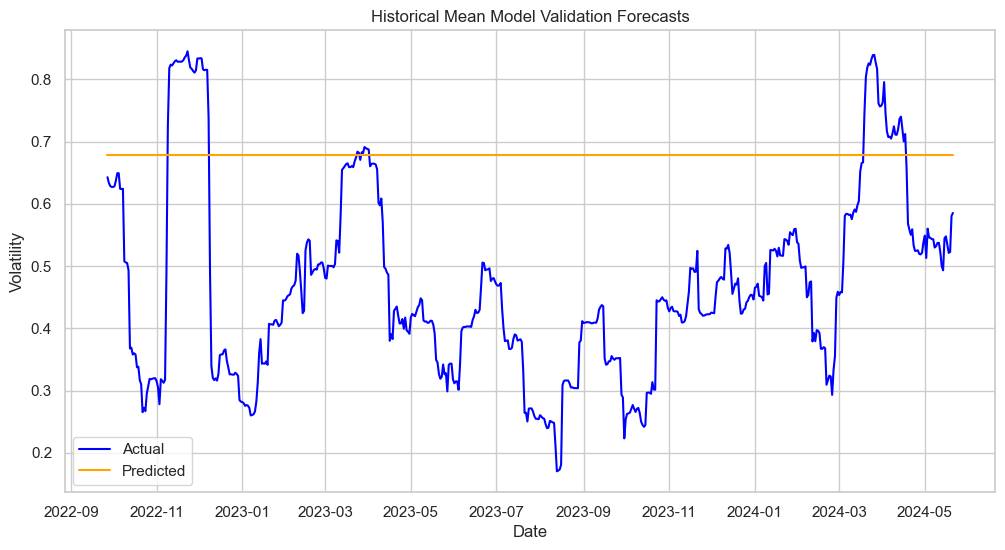

In [312]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    y_pred_mean,
    title="Historical Mean Model Validation Forecasts",
    y_label="Volatility",
)

#### 3. Moving Average

This model uses the 7-day moving average of volatility as the prediction for future volatility.


In [313]:
# Use the pre-calculated 7-day moving average
y_pred_ma = df_val["Volatility_MA_7"]

# Evaluate
metrics_ma = calculate_evaluation_metrics(y_val, y_pred_ma)

print("Moving Average (7-day) Model Evaluation Metrics:")
for metric, value in metrics_ma.items():
    print(f"  {metric}: {value:.6f}")

REGRESSION_MODEL_RESULTS["Moving_Average"] = {
    "model": "Moving Average (7d)",
    "features": ["Volatility_MA_7"],
    "train_metrics": None,
    "val_metrics": metrics_ma,
}

Moving Average (7-day) Model Evaluation Metrics:
  MAE: 0.174325
  RMSE: 0.223206
  MAPE: 41.141381
  Directional_Accuracy: 48.504983


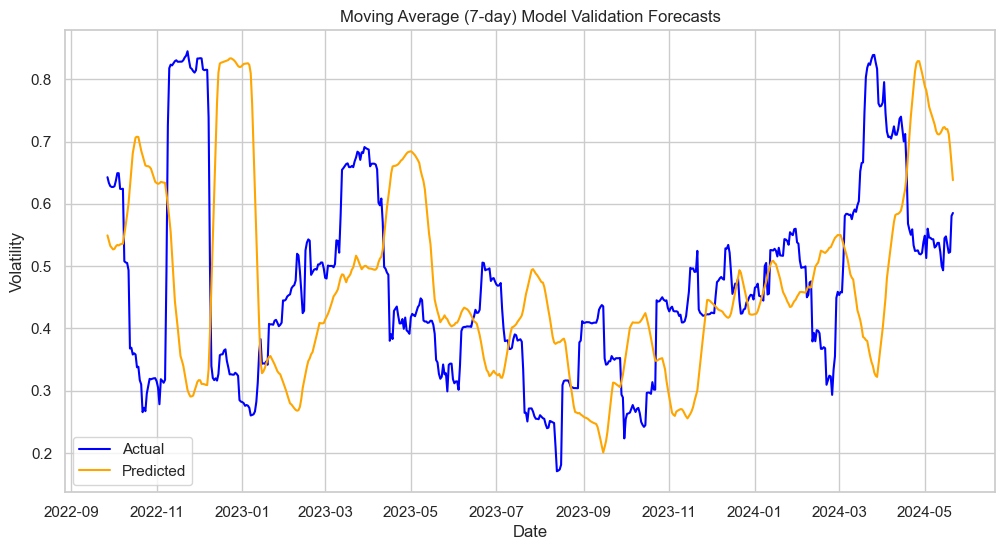

In [314]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    y_pred_ma,
    title="Moving Average (7-day) Model Validation Forecasts",
    y_label="Volatility",
)

#### 4. Comparison of Baseline Models and Setting a benchmark for further models

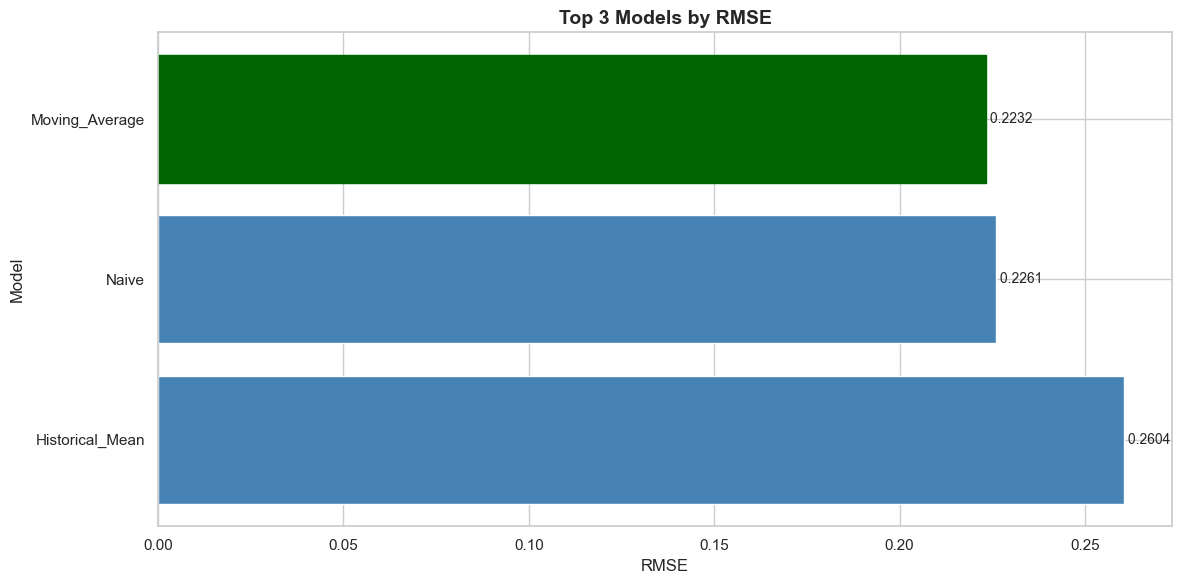


Top 3 Models by RMSE
 1. Moving_Average                 RMSE: 0.2232
 2. Naive                          RMSE: 0.2261
 3. Historical_Mean                RMSE: 0.2604



In [315]:
plot_top_models(REGRESSION_MODEL_RESULTS, top_n=3)

### 4. Machine Learning Models 

#### 1. Linear Regression

In [316]:
# Linear Regression
lr_result = train_model_with_feature_sets(
    model=LinearRegression(),
    model_name="Linear Regression",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    metric="RMSE",
    verbose=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["Linear_Regression_Best"] = {
    "model": "Linear Regression",
    "feature_set": lr_result["best_feature_set_name"],
    "features": lr_result["best_features"],
    "train_metrics": lr_result["best_metrics"]["train"],
    "val_metrics": lr_result["best_metrics"]["val"],
}


Training Linear Regression with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.296429
  Validation RMSE: 0.262883

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.278647
  Validation RMSE: 0.230993

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.261166
  Validation RMSE: 0.212426

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.285966
  Validation RMSE: 0.237091

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.262942
  Validation RMSE: 0.230301

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.279544
  Validation RMSE: 0.233169

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.261398
  Validation RMSE: 0.234199

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.285195
  Validation RMSE: 0.240940

Feat

In [317]:
# View comparison
comparison_df = compare_feature_sets_results(lr_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_lr_model = lr_result["best_model"]
best_features = lr_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0        volatility_only          22             61    0.261166  0.212426   
1     base_with_long_vol          44             61    0.257903  0.217486   
2           all_features          47             61    0.257627  0.217740   
3                   base          35             35    0.262942  0.230301   
4             price_only          28             35    0.278647  0.230993   
5   base_with_medium_vol          43             45    0.261222  0.232216   
6        base_single_vol          29             35    0.279544  0.233169   
7    base_with_short_vol          40             38    0.261398  0.234199   
8             simple_vol          17             45    0.285966  0.237091   
9            compact_vol          21             45    0.285195  0.240940   
10               minimal           9              1    0.296429  0.262883   

    Overfit_Gap  
0     -0.048740  
1     -0.040418  
2     -0.039887  
3  

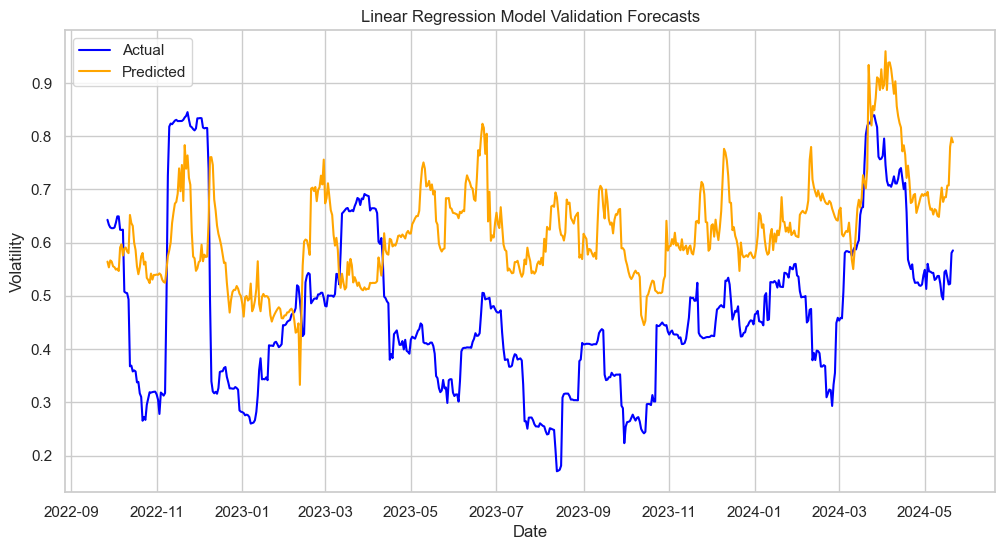

In [318]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_lr_model.predict(X_val[best_features]),
    title="Linear Regression Model Validation Forecasts",
    y_label="Volatility",
)

#### 2. Ridge Regression

In [319]:
# Train Ridge Regression Model

# Ridge Regression is sensitive to feature scaling, so we will standardize the features before training

rr_result = train_model_with_feature_sets(
    model=Ridge(alpha=0.5, random_state=RANDOM_SEED),
    model_name="Ridge Regression",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["Ridge_Regression_Best"] = {
    "model": "Ridge Regression",
    "scaler": rr_result["best_scaler"],
    "features": rr_result["best_features"],
    "train_metrics": rr_result["best_metrics"]["train"],
    "val_metrics": rr_result["best_metrics"]["val"],
}


Training Ridge Regression with 11 feature sets
Optimizing for: RMSE
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.296429
  Validation RMSE: 0.262900

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.276080
  Validation RMSE: 0.229048

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.261483
  Validation RMSE: 0.215370

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.285546
  Validation RMSE: 0.236757

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.257674
  Validation RMSE: 0.219792

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.275081
  Validation RMSE: 0.226700

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.257104
  Validation RMSE: 0.223076

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.278654
  Validation RMSE: 0.229078

Feat

In [320]:
# View comparison
comparison_df = compare_feature_sets_results(rr_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model and scaler
best_rr_model = rr_result["best_model"]
best_rr_scaler = rr_result["best_scaler"]
best_rr_features = rr_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0           all_features          47             61    0.253956  0.207440   
1     base_with_long_vol          44             61    0.254085  0.207446   
2        volatility_only          22             61    0.261483  0.215370   
3                   base          35             35    0.257674  0.219792   
4   base_with_medium_vol          43             45    0.256894  0.220485   
5    base_with_short_vol          40             38    0.257104  0.223076   
6        base_single_vol          29             35    0.275081  0.226700   
7             price_only          28             35    0.276080  0.229048   
8            compact_vol          21             45    0.278654  0.229078   
9             simple_vol          17             45    0.285546  0.236757   
10               minimal           9              1    0.296429  0.262900   

    Overfit_Gap  
0     -0.046515  
1     -0.046639  
2     -0.046113  
3  

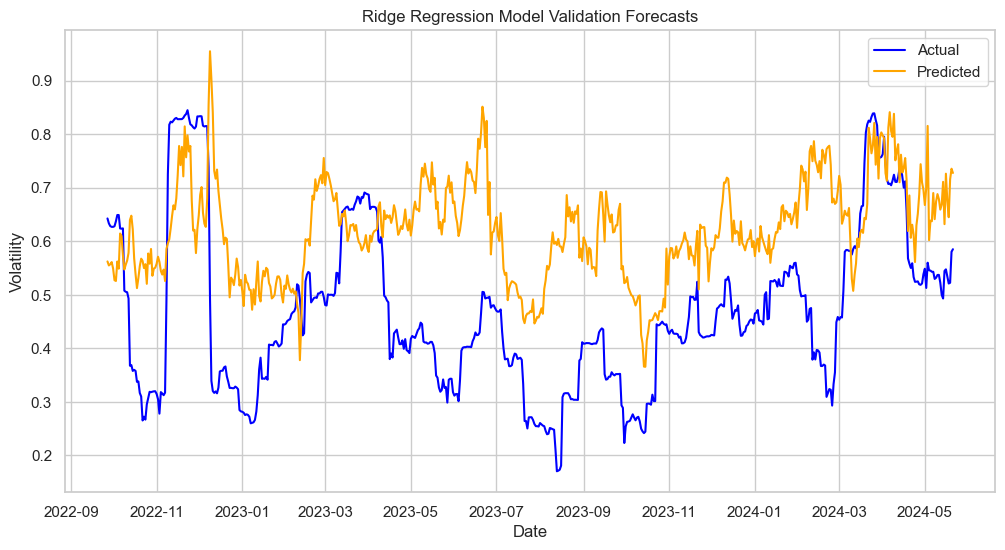

In [321]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_rr_model.predict(best_rr_scaler.transform(X_val[best_rr_features])),
    title="Ridge Regression Model Validation Forecasts",
    y_label="Volatility",
)

#### 3. Lasso Regression

In [322]:
# Train Lasso Regression Model
lasso_result = train_model_with_feature_sets(
    model=Lasso(alpha=0.1, random_state=RANDOM_SEED),
    model_name="Lasso Regression",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["Lasso_Regression_Best"] = {
    "model": "Lasso Regression",
    "scaler": lasso_result["best_scaler"],
    "features": lasso_result["best_features"],
    "train_metrics": lasso_result["best_metrics"]["train"],
    "val_metrics": lasso_result["best_metrics"]["val"],
}


Training Lasso Regression with 11 feature sets
Optimizing for: RMSE
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.308986
  Validation RMSE: 0.261064

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.308986
  Validation RMSE: 0.261064

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.296361
  Validation RMSE: 0.246234

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.308986
  Validation RMSE: 0.261064

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.296361
  Validation RMSE: 0.246234

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.308986
  Validation RMSE: 0.261064

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.296361
  Validation RMSE: 0.246234

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.308986
  Validation RMSE: 0.261064

Feat

In [323]:
# Plot comparison of feature sets for Lasso Regression
comparison_df = compare_feature_sets_results(lasso_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model and scaler
best_lasso_model = lasso_result["best_model"]
best_lasso_scaler = lasso_result["best_scaler"]
best_lasso_features = lasso_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0        volatility_only          22             61    0.296361  0.246234   
1                   base          35             35    0.296361  0.246234   
2    base_with_short_vol          40             38    0.296361  0.246234   
3   base_with_medium_vol          43             45    0.296361  0.246234   
4     base_with_long_vol          44             61    0.296361  0.246234   
5           all_features          47             61    0.296361  0.246234   
6                minimal           9              1    0.308986  0.261064   
7             price_only          28             35    0.308986  0.261064   
8             simple_vol          17             45    0.308986  0.261064   
9        base_single_vol          29             35    0.308986  0.261064   
10           compact_vol          21             45    0.308986  0.261064   

    Overfit_Gap  
0     -0.050128  
1     -0.050128  
2     -0.050128  
3  

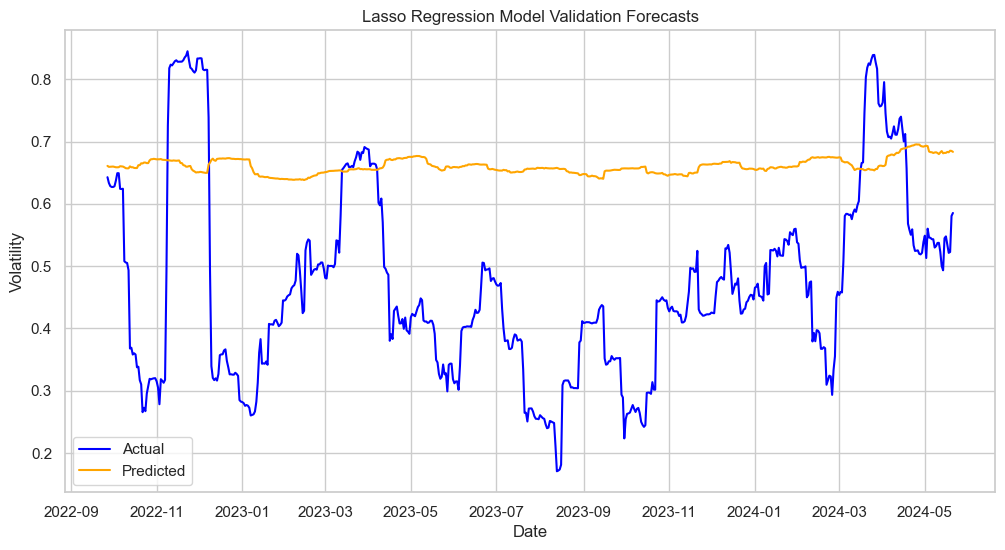

In [324]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_lasso_model.predict(best_lasso_scaler.transform(X_val[best_lasso_features])),
    title="Lasso Regression Model Validation Forecasts",
    y_label="Volatility",
)

#### 4. Random Forest Regression

In [325]:
# Train Random Forest Regressor

rf_result = train_model_with_feature_sets(
    model=RandomForestRegressor(random_state=RANDOM_SEED),
    model_name="Random Forest Regressor",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=False,
)

# Store best result
REGRESSION_MODEL_RESULTS["Random_Forest_Best"] = {
    "model": "Random Forest Regressor",
    "features": rf_result["best_features"],
    "train_metrics": rf_result["best_metrics"]["train"],
    "val_metrics": rf_result["best_metrics"]["val"],
}


Training Random Forest Regressor with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.050762
  Validation RMSE: 0.328544

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.036970
  Validation RMSE: 0.287037

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.047515
  Validation RMSE: 0.314250

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.028203
  Validation RMSE: 0.315966

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.034375
  Validation RMSE: 0.273071

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.036181
  Validation RMSE: 0.283445

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.034817
  Validation RMSE: 0.273621

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.027955
  Validation RMSE: 0.314541

In [326]:
# View comparison
comparison_df = compare_feature_sets_results(rf_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_rf_model = rf_result["best_model"]
best_rf_features = rf_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0                   base          35             35    0.034375  0.273071   
1    base_with_short_vol          40             38    0.034817  0.273621   
2   base_with_medium_vol          43             45    0.034474  0.281668   
3        base_single_vol          29             35    0.036181  0.283445   
4             price_only          28             35    0.036970  0.287037   
5     base_with_long_vol          44             61    0.032530  0.301395   
6           all_features          47             61    0.032571  0.306877   
7        volatility_only          22             61    0.047515  0.314250   
8            compact_vol          21             45    0.027955  0.314541   
9             simple_vol          17             45    0.028203  0.315966   
10               minimal           9              1    0.050762  0.328544   

    Overfit_Gap  
0      0.238696  
1      0.238803  
2      0.247193  
3  

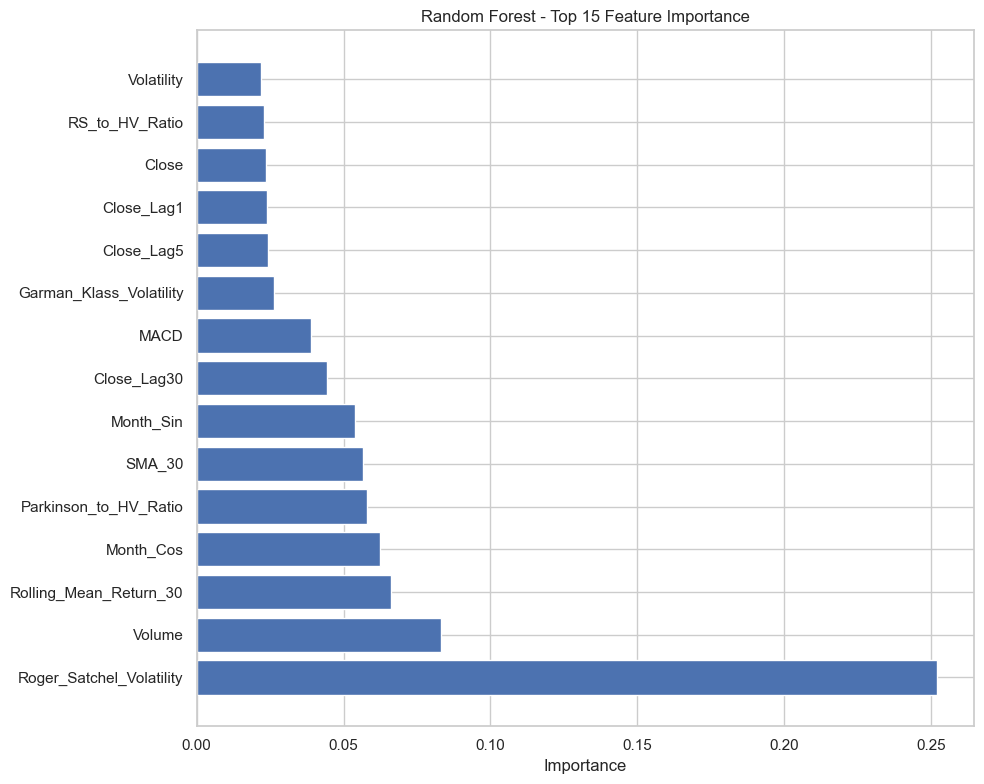

In [327]:
# Feature importance

feature_importance_rf = pd.DataFrame(
    {"feature": best_rf_features, "importance": best_rf_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_rf["feature"][:15], feature_importance_rf["importance"][:15]
)
plt.xlabel("Importance")
plt.title("Random Forest - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

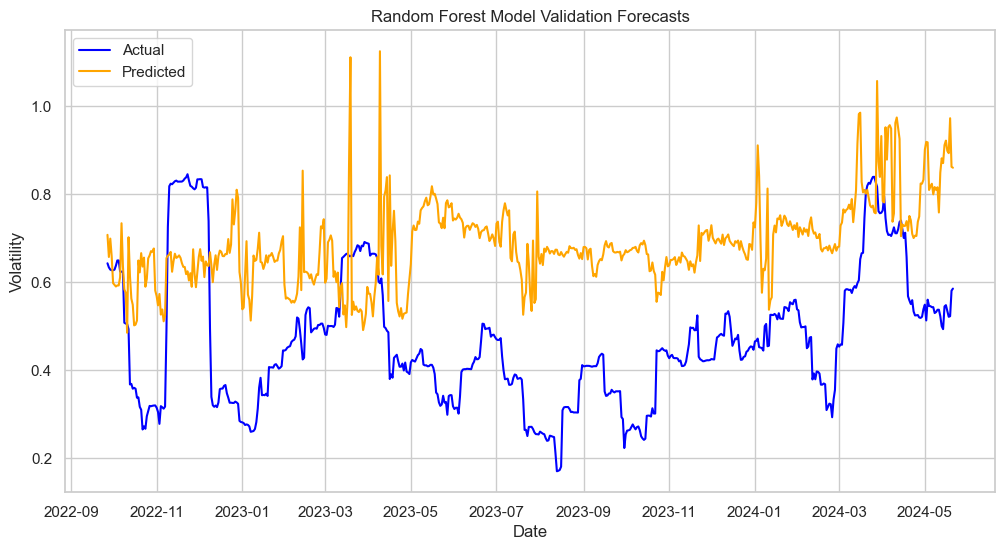

In [328]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_rf_model.predict(X_val[best_rf_features]),
    title="Random Forest Model Validation Forecasts",
    y_label="Volatility",
)

#### 5. Extreme Gradient Boosting (XGBoost) Regression

In [329]:
# Train XGBoost Regressor

xgb_result = train_model_with_feature_sets(
    model=xgb.XGBRegressor(random_state=RANDOM_SEED, objective="reg:squarederror"),
    model_name="XGBoost Regressor",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=False,
)

# Store best result
REGRESSION_MODEL_RESULTS["XGBoost_Best"] = {
    "model": "XGBoost Regressor",
    "features": xgb_result["best_features"],
    "train_metrics": xgb_result["best_metrics"]["train"],
    "val_metrics": xgb_result["best_metrics"]["val"],
}


Training XGBoost Regressor with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.033431
  Validation RMSE: 0.346561

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.011672
  Validation RMSE: 0.339105

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.015799
  Validation RMSE: 0.324759

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.011936
  Validation RMSE: 0.337007

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.009696
  Validation RMSE: 0.320061

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.010492
  Validation RMSE: 0.300081

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.008513
  Validation RMSE: 0.290825

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.010989
  Validation RMSE: 0.316416

Feat

In [330]:
# View comparison
comparison_df = compare_feature_sets_results(xgb_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_xgb_model = xgb_result["best_model"]
best_xgb_features = xgb_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0    base_with_short_vol          40             38    0.008513  0.290825   
1        base_single_vol          29             35    0.010492  0.300081   
2   base_with_medium_vol          43             45    0.008565  0.312616   
3            compact_vol          21             45    0.010989  0.316416   
4                   base          35             35    0.009696  0.320061   
5        volatility_only          22             61    0.015799  0.324759   
6             simple_vol          17             45    0.011936  0.337007   
7             price_only          28             35    0.011672  0.339105   
8                minimal           9              1    0.033431  0.346561   
9     base_with_long_vol          44             61    0.006582  0.352287   
10          all_features          47             61    0.006681  0.356528   

    Overfit_Gap  
0      0.282312  
1      0.289589  
2      0.304051  
3  

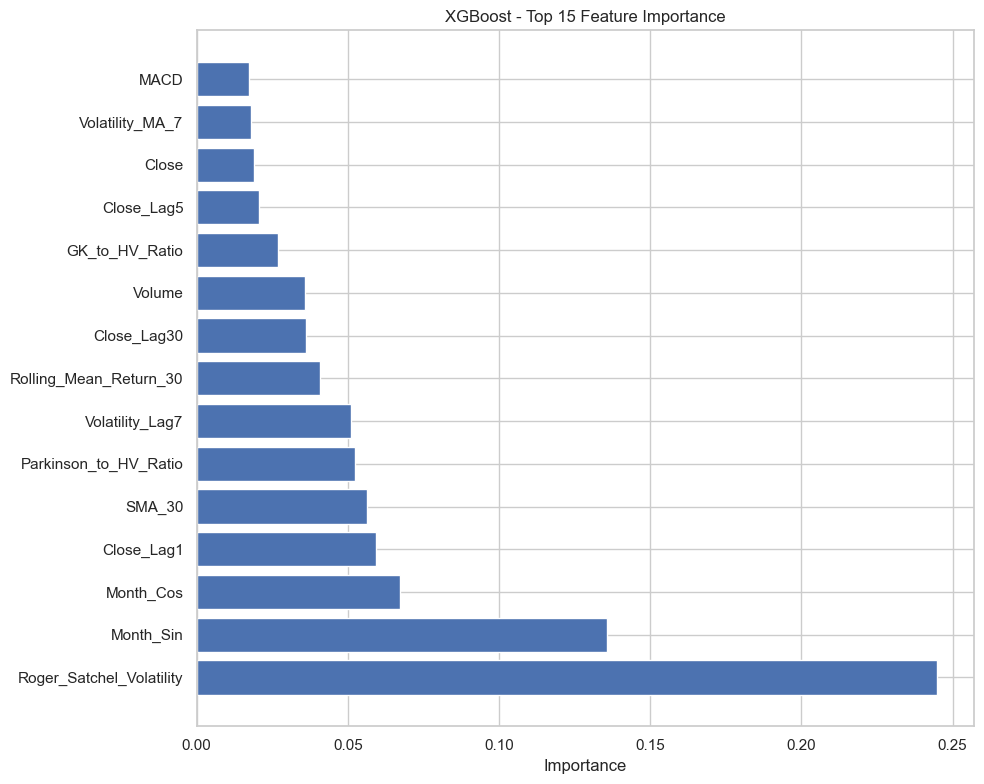

In [331]:
# Feature importance
feature_importance_xgb = pd.DataFrame(
    {"feature": best_xgb_features, "importance": best_xgb_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_xgb["feature"][:15], feature_importance_xgb["importance"][:15]
)
plt.xlabel("Importance")
plt.title("XGBoost - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

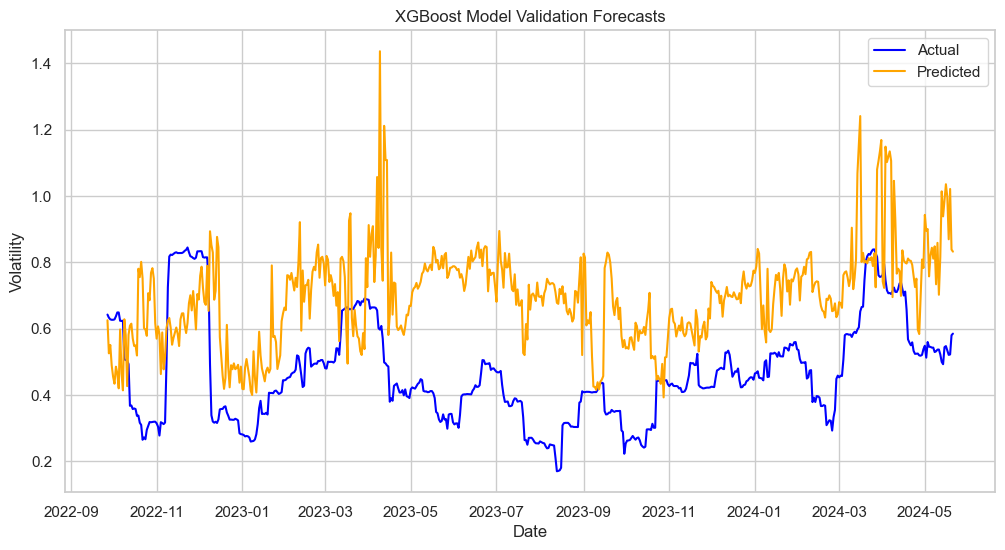

In [332]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_xgb_model.predict(X_val[best_xgb_features]),
    title="XGBoost Model Validation Forecasts",
    y_label="Volatility",
)

#### 6. LightGBM Regression

In [333]:
# Train LGBM Regressor
lgb_result = train_model_with_feature_sets(
    model=lgb.LGBMRegressor(random_state=RANDOM_SEED),
    model_name="LightGBM Regressor",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=False,
)
# Store best result
REGRESSION_MODEL_RESULTS["LightGBM_Best"] = {
    "model": "LightGBM Regressor",
    "features": lgb_result["best_features"],
    "train_metrics": lgb_result["best_metrics"]["train"],
    "val_metrics": lgb_result["best_metrics"]["val"],
}


Training LightGBM Regressor with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.090720
  Validation RMSE: 0.334815

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.043996
  Validation RMSE: 0.353055

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.059533
  Validation RMSE: 0.331701

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.041538
  Validation RMSE: 0.351030

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.037976
  Validation RMSE: 0.302207

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.044583
  Validation RMSE: 0.337054

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.035405
  Validation RMSE: 0.300955

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.038440
  Validation RMSE: 0.338412

Fea

In [334]:
# Compare feature sets
comparison_df = compare_feature_sets_results(lgb_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_lgb_model = lgb_result["best_model"]
best_lgb_features = lgb_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0   base_with_medium_vol          43             45    0.033663  0.295904   
1    base_with_short_vol          40             38    0.035405  0.300955   
2                   base          35             35    0.037976  0.302207   
3     base_with_long_vol          44             61    0.029756  0.303881   
4           all_features          47             61    0.029131  0.315315   
5        volatility_only          22             61    0.059533  0.331701   
6                minimal           9              1    0.090720  0.334815   
7        base_single_vol          29             35    0.044583  0.337054   
8            compact_vol          21             45    0.038440  0.338412   
9             simple_vol          17             45    0.041538  0.351030   
10            price_only          28             35    0.043996  0.353055   

    Overfit_Gap  
0      0.262241  
1      0.265550  
2      0.264230  
3  

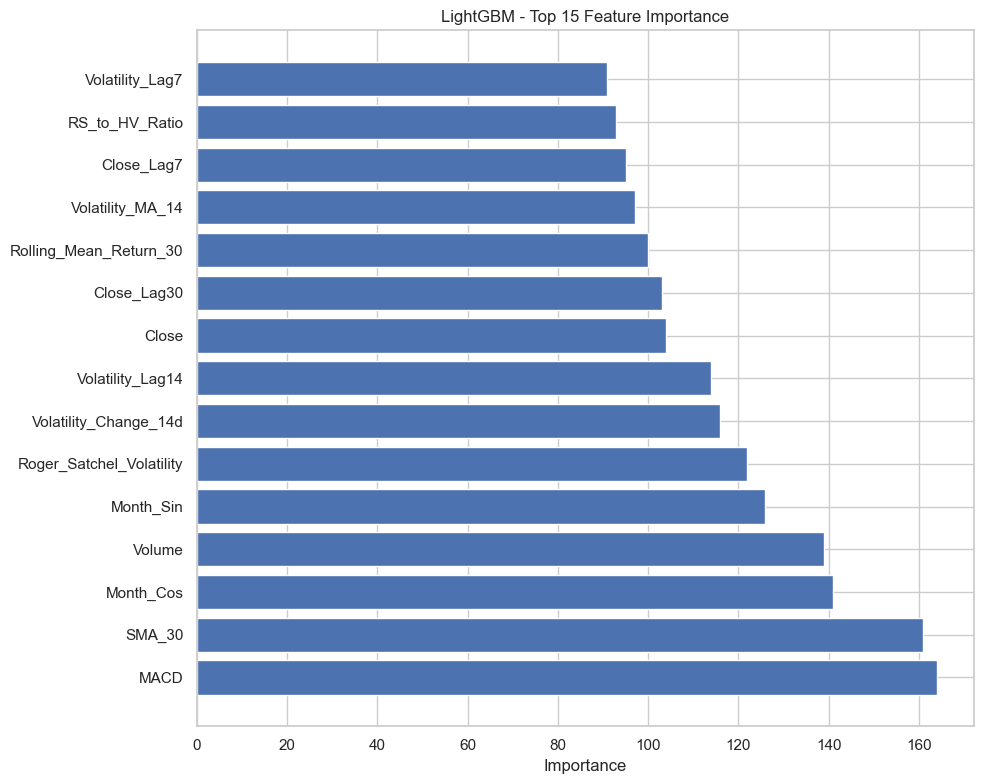

In [335]:
# Feature importance
feature_importance_lgb = pd.DataFrame(
    {"feature": best_lgb_features, "importance": best_lgb_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_lgb["feature"][:15], feature_importance_lgb["importance"][:15]
)
plt.xlabel("Importance")
plt.title("LightGBM - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

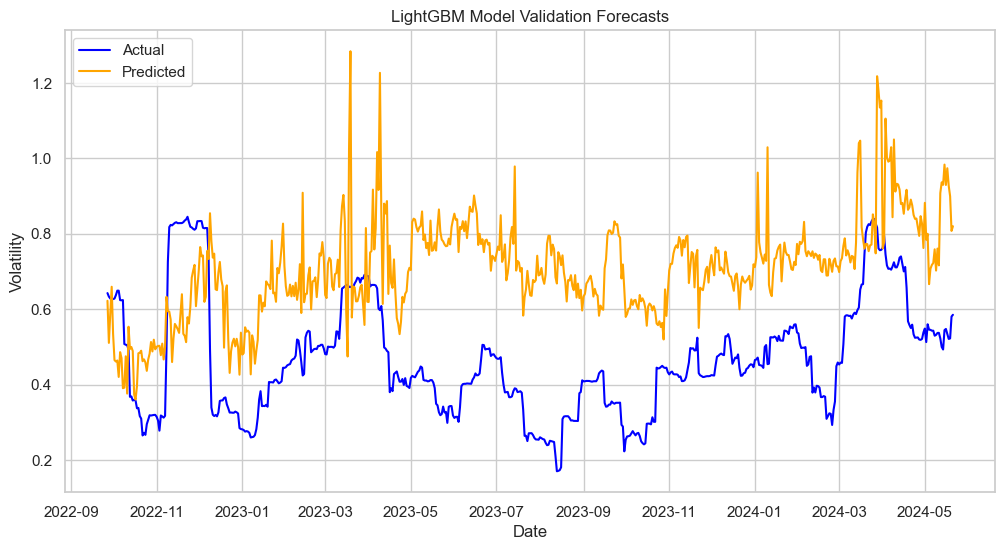

In [336]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_lgb_model.predict(X_val[best_lgb_features]),
    title="LightGBM Model Validation Forecasts",
    y_label="Volatility",
)

### 5. Deep Learning Models

#### 1. LSTM Neural Network

In [337]:
# Train LSTM

sequence_length = 7  # Using 7 days of historical data to predict future volatility
# As a result, we need to remember taht if we want to fetch data, we need to have `lookback_days` + `sequence_length - 1` days of data available for the model to make a prediction.
hidden_size = 64
num_layers = 2
dropout = 0.2
batch_size = 32
epochs = 100
learning_rate = 0.001
patience = 5

lstm_result = train_neural_network_with_feature_sets(
    model_class=VolatilityLSTM,
    model_name="LSTM",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    sequence_length=sequence_length,
    hidden_size=hidden_size,
    num_layers=num_layers,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    patience=patience,
    metric="RMSE",
    verbose=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["LSTM_Best"] = {
    "model": "LSTM",
    "features": lstm_result["best_features"],
    "train_metrics": lstm_result["best_metrics"]["train"],
    "val_metrics": lstm_result["best_metrics"]["val"],
    "parameters": {
        "sequence_length": sequence_length,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "patience": patience,
    },
}


Training LSTM with 11 feature sets
Sequence length: 7, Device: mps
Optimizing for: RMSE



  Early stopping at epoch 14
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.193749
  Validation RMSE: 0.289299

  Early stopping at epoch 7
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.151339
  Validation RMSE: 0.272354

  Early stopping at epoch 8
Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.210063
  Validation RMSE: 0.339429

  Early stopping at epoch 11
Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.125716
  Validation RMSE: 0.375309

  Early stopping at epoch 6
Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.119956
  Validation RMSE: 0.343163

  Early stopping at epoch 10
Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.118375
  Validation RMSE: 0.307936

  Early stopping at epoch 6
Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.122810
  Validation RMSE: 0.419538

  

In [338]:
# Compare feature sets
comparison_df = compare_feature_sets_results(lstm_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_lstm_model = lstm_result["best_model"]
best_lstm_features = lstm_result["best_features"]
best_lstm_scaler = lstm_result["best_scaler"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0             price_only          28             35    0.151339  0.272354   
1                minimal           9              1    0.193749  0.289299   
2        base_single_vol          29             35    0.118375  0.307936   
3           all_features          47             61    0.097209  0.309997   
4            compact_vol          21             45    0.133681  0.324355   
5        volatility_only          22             61    0.210063  0.339429   
6                   base          35             35    0.119956  0.343163   
7             simple_vol          17             45    0.125716  0.375309   
8     base_with_long_vol          44             61    0.101467  0.394246   
9   base_with_medium_vol          43             45    0.099159  0.406381   
10   base_with_short_vol          40             38    0.122810  0.419538   

    Overfit_Gap  
0      0.121015  
1      0.095550  
2      0.189561  
3  

#### 2. GRU Neural Network

In [339]:
# Train GRU Model

gru_result = train_neural_network_with_feature_sets(
    model_class=VolatilityGRU,
    model_name="GRU",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    sequence_length=sequence_length,
    hidden_size=hidden_size,
    num_layers=num_layers,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    patience=patience,
    metric="RMSE",
    verbose=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["GRU_Best"] = {
    "model": "GRU",
    "features": gru_result["best_features"],
    "train_metrics": gru_result["best_metrics"]["train"],
    "val_metrics": gru_result["best_metrics"]["val"],
    "parameters": {
        "sequence_length": sequence_length,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "patience": patience,
    },
}


Training GRU with 11 feature sets
Sequence length: 7, Device: mps
Optimizing for: RMSE

  Early stopping at epoch 7
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.230519
  Validation RMSE: 0.256438

  Early stopping at epoch 7
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.173083
  Validation RMSE: 0.326651

  Early stopping at epoch 8
Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.229809
  Validation RMSE: 0.254269

  Early stopping at epoch 8
Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.187947
  Validation RMSE: 0.390996

  Early stopping at epoch 7
Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.150957
  Validation RMSE: 0.283689

  Early stopping at epoch 6
Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.177925
  Validation RMSE: 0.345441

  Early stopping at epoch 6
Feature Set: base_with_short_vol
  Fea

In [340]:
# Compare feature sets
comparison_df = compare_feature_sets_results(gru_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_gru_model = gru_result["best_model"]
best_gru_features = gru_result["best_features"]
best_gru_scaler = gru_result["best_scaler"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0        volatility_only          22             61    0.229809  0.254269   
1                minimal           9              1    0.230519  0.256438   
2    base_with_short_vol          40             38    0.146347  0.280701   
3                   base          35             35    0.150957  0.283689   
4   base_with_medium_vol          43             45    0.134150  0.283753   
5             price_only          28             35    0.173083  0.326651   
6        base_single_vol          29             35    0.177925  0.345441   
7     base_with_long_vol          44             61    0.137729  0.366928   
8             simple_vol          17             45    0.187947  0.390996   
9            compact_vol          21             45    0.173626  0.406433   
10          all_features          47             61    0.118438  0.408518   

    Overfit_Gap  
0      0.024460  
1      0.025919  
2      0.134354  
3  

#### 3. Attention LSTM Neural Network

In [341]:
# Train Attention LSTM Model
attention_lstm_result = train_neural_network_with_feature_sets(
    model_class=AttentionLSTM,
    model_name="Attention LSTM",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    sequence_length=sequence_length,
    hidden_size=hidden_size,
    num_layers=num_layers,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    patience=patience,
    metric="RMSE",
    verbose=True,
)
# Store best result
REGRESSION_MODEL_RESULTS["Attention_LSTM_Best"] = {
    "model": "Attention LSTM",
    "features": attention_lstm_result["best_features"],
    "train_metrics": attention_lstm_result["best_metrics"]["train"],
    "val_metrics": attention_lstm_result["best_metrics"]["val"],
    "parameters": {
        "sequence_length": sequence_length,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "patience": patience,
    },
}


Training Attention LSTM with 11 feature sets
Sequence length: 7, Device: mps
Optimizing for: RMSE

  Early stopping at epoch 7
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.218577
  Validation RMSE: 0.302381

  Early stopping at epoch 6
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.160250
  Validation RMSE: 0.264111

  Early stopping at epoch 11
Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.203731
  Validation RMSE: 0.266924

  Early stopping at epoch 6
Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.153787
  Validation RMSE: 0.435368

  Early stopping at epoch 9
Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.088566
  Validation RMSE: 0.314912

  Early stopping at epoch 10
Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.127875
  Validation RMSE: 0.322362

  Early stopping at epoch 6
Feature Set: base_with_sh

In [342]:
# Compare feature sets
comparison_df = compare_feature_sets_results(
    attention_lstm_result["all_results"], metric="RMSE"
)
print(comparison_df)

# Access best model
best_attention_lstm_model = attention_lstm_result["best_model"]
best_attention_lstm_features = attention_lstm_result["best_features"]
best_attention_lstm_scaler = attention_lstm_result["best_scaler"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0             price_only          28             35    0.160250  0.264111   
1        volatility_only          22             61    0.203731  0.266924   
2            compact_vol          21             45    0.160320  0.298912   
3                minimal           9              1    0.218577  0.302381   
4                   base          35             35    0.088566  0.314912   
5        base_single_vol          29             35    0.127875  0.322362   
6   base_with_medium_vol          43             45    0.106894  0.335590   
7     base_with_long_vol          44             61    0.103174  0.364795   
8           all_features          47             61    0.089446  0.414162   
9    base_with_short_vol          40             38    0.105401  0.424016   
10            simple_vol          17             45    0.153787  0.435368   

    Overfit_Gap  
0      0.103861  
1      0.063193  
2      0.138592  
3  

### 6. Model Evaluation and Comparison

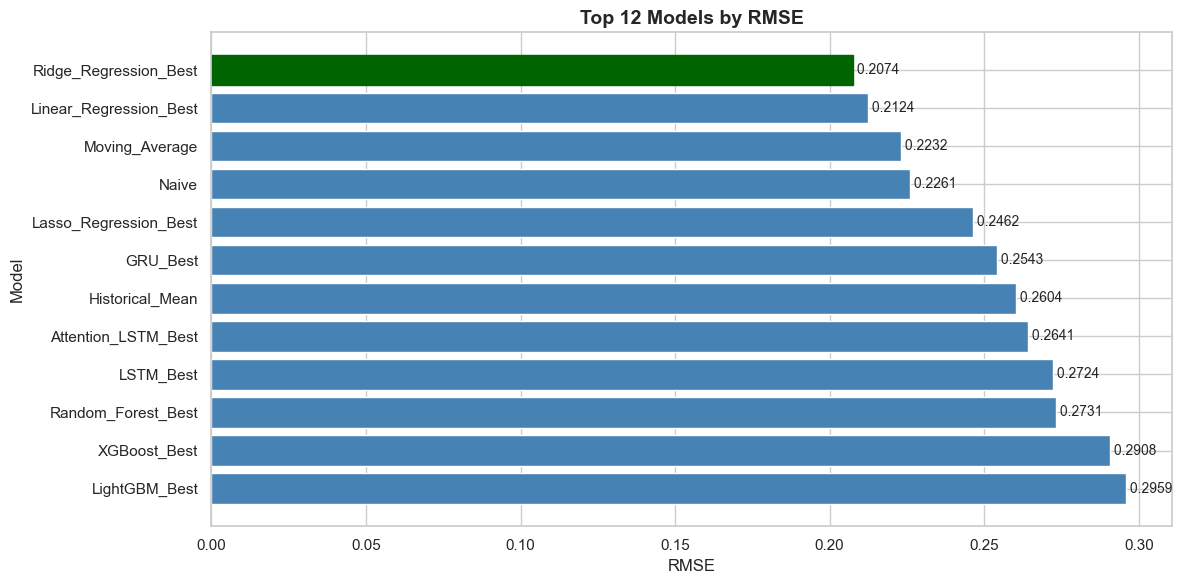


Top 12 Models by RMSE
 1. Ridge_Regression_Best          RMSE: 0.2074
 2. Linear_Regression_Best         RMSE: 0.2124
 3. Moving_Average                 RMSE: 0.2232
 4. Naive                          RMSE: 0.2261
 5. Lasso_Regression_Best          RMSE: 0.2462
 6. GRU_Best                       RMSE: 0.2543
 7. Historical_Mean                RMSE: 0.2604
 8. Attention_LSTM_Best            RMSE: 0.2641
 9. LSTM_Best                      RMSE: 0.2724
10. Random_Forest_Best             RMSE: 0.2731
11. XGBoost_Best                   RMSE: 0.2908
12. LightGBM_Best                  RMSE: 0.2959



In [343]:
plot_top_models(REGRESSION_MODEL_RESULTS, top_n=12)

### 7. Hyperparameter Tuning for the Best Model

#### 7.1 Find best hyperparameters for best regression model using validation set

Best model on validation set is Ridge Regression. We will try with different alpha values and solvers to find the best configuration for our data.

In [348]:
# Identify the overall best regression model based on validation RMSE
best_regression_model_results = REGRESSION_MODEL_RESULTS["Ridge_Regression_Best"]
best_regression_model_features = best_regression_model_results["features"]
print(f"Best Regression Model: {best_regression_model_results['model']}")
print(f"Best Regression Model Features: {best_regression_model_features}")

Best Regression Model: Ridge Regression
Best Regression Model Features: ['Close', 'Volume', 'Return', 'Log_Return', 'Price_Diff', 'Low_High_Diff', 'Open_Close_Diff', 'Open_Close_Up', 'Close_Lag1', 'Close_Lag5', 'Close_Lag7', 'Close_Lag30', 'Return_Lag1', 'Return_Lag5', 'Return_Lag7', 'Return_Lag30', 'SMA_30', 'Rolling_Mean_Return_30', 'Rolling_Std_Return_30', 'Close_Change_5d', 'Close_Change_10d', 'Close_Change_20d', 'MACD', 'RSI', 'Month_Sin', 'Month_Cos', 'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Volatility', 'Parkinson_Volatility', 'Garman_Klass_Volatility', 'Roger_Satchel_Volatility', 'Volatility_Lag1', 'Volatility_Lag7', 'Volatility_Lag14', 'Volatility_Lag30', 'Volatility_MA_7', 'Volatility_MA_14', 'Volatility_MA_30', 'Volatility_Change', 'Volatility_Change_7d', 'Volatility_Change_14d', 'Volatility_Change_30d', 'Volatility_Momentum', 'Parkinson_to_HV_Ratio', 'GK_to_HV_Ratio', 'RS_to_HV_Ratio']


In [363]:
alphas = [0.01, 0.1, 1, 10, 100]
solvers = ["svd", "cholesky", "lsqr", "auto"]

best_rmse = float("inf")
best_params = {}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[best_regression_model_features])
X_val_scaled = scaler.transform(X_val[best_regression_model_features])

for alpha in alphas:
    for solver in solvers:
        ridge = Ridge(alpha=alpha, solver=solver, random_state=RANDOM_SEED)
        ridge.fit(X_train_scaled, y_train)
        y_val_pred = ridge.predict(X_val_scaled)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {"alpha": alpha, "solver": solver}

        print(f"Alpha: {alpha}, Solver: {solver}, Val RMSE: {rmse:.6f}")

print(f"Best alpha: {best_params['alpha']}")
print(f"Best solver: {best_params['solver']}")
print(f"Best val RMSE: {best_rmse:.6f}")

Alpha: 0.01, Solver: svd, Val RMSE: 0.206242
Alpha: 0.01, Solver: cholesky, Val RMSE: 0.206242
Alpha: 0.01, Solver: lsqr, Val RMSE: 0.207744
Alpha: 0.01, Solver: auto, Val RMSE: 0.206242
Alpha: 0.1, Solver: svd, Val RMSE: 0.206765
Alpha: 0.1, Solver: cholesky, Val RMSE: 0.206765
Alpha: 0.1, Solver: lsqr, Val RMSE: 0.207733
Alpha: 0.1, Solver: auto, Val RMSE: 0.206765
Alpha: 1, Solver: svd, Val RMSE: 0.207733
Alpha: 1, Solver: cholesky, Val RMSE: 0.207733
Alpha: 1, Solver: lsqr, Val RMSE: 0.207100
Alpha: 1, Solver: auto, Val RMSE: 0.207733
Alpha: 10, Solver: svd, Val RMSE: 0.207421
Alpha: 10, Solver: cholesky, Val RMSE: 0.207421
Alpha: 10, Solver: lsqr, Val RMSE: 0.207469
Alpha: 10, Solver: auto, Val RMSE: 0.207421
Alpha: 100, Solver: svd, Val RMSE: 0.202732
Alpha: 100, Solver: cholesky, Val RMSE: 0.202732
Alpha: 100, Solver: lsqr, Val RMSE: 0.202789
Alpha: 100, Solver: auto, Val RMSE: 0.202732
Best alpha: 100
Best solver: cholesky
Best val RMSE: 0.202732


#### 7.2 Train and Evaluate final model with best hyperparameters

In [364]:
final_regression_model = Ridge(
    alpha=best_params["alpha"], solver=best_params["solver"], random_state=RANDOM_SEED
)

final_regression_model.fit(X_train_scaled, y_train)
y_train_pred = final_regression_model.predict(X_train_scaled)
y_val_pred = final_regression_model.predict(X_val_scaled)

train_metrics_final = calculate_evaluation_metrics(y_train, y_train_pred)
val_metrics_final = calculate_evaluation_metrics(y_val, y_val_pred)

print("\nFinal Ridge Regression Model Evaluation Metrics:")
print("Train Metrics:")
for metric, value in train_metrics_final.items():
    print(f"  {metric}: {value:.6f}")
print("Validation Metrics:")
for metric, value in val_metrics_final.items():
    print(f"  {metric}: {value:.6f}")


Final Ridge Regression Model Evaluation Metrics:
Train Metrics:
  MAE: 0.190762
  RMSE: 0.259346
  MAPE: 34.881760
  Directional_Accuracy: 48.061188
Validation Metrics:
  MAE: 0.178322
  RMSE: 0.202732
  MAPE: 47.574920
  Directional_Accuracy: 50.332226


### 8. Save the best model and its parameters for future use

In [ ]:
# Store final model results
model_data = {
    "model": final_regression_model,
    "features": best_regression_model_features,
    "alpha": best_params["alpha"],
    "solver": best_params["solver"],
    "scaler": scaler,
}

# Save the final model and its metadata
path = "volatility_models/final_regression_model.pkl"
os.makedirs(os.path.dirname(path), exist_ok=True)

with open(path, "wb") as f:
    pickle.dump(model_data, f)

#### Conclusions


##### 1. Superiority of Linear Regularization

The analysis reveals that **Ridge Regression** is the top-performing model (RMSE: 0.2074 on validation set). The fact that it outperformed standard Linear Regression suggests that **multicollinearity** (features that are too closely related) or noise was present in the dataset. Ridge’s ability to apply  regularization successfully smoothed out this noise, providing the most robust generalization.

##### 2. The "Complexity Penalty"

A significant finding is the inverse relationship between model complexity and accuracy. High-capacity models, specifically **Attention LSTM** and **XGBoost**, yielded the highest error rates. This indicates that Bitcoin volatility likely exhibits a high "signal-to-noise" ratio, where complex architectures attempt to find patterns in stochastic (random) noise, leading to **overfitting**.

##### 3. Benchmark Comparison (Naive & Moving Average)

The **Naive** and **Moving Average** benchmarks performed exceptionally well, ranking 3rd and 4th respectively. This serves as a critical baseline:

* Any model ranking below the **Naive** model (RMSE: 0.2261) is failing to add predictive value beyond simply assuming "tomorrow will look like today."
* **7 out of 12 models failed this benchmark**, highlighting the difficulty of "beating the market" using algorithmic approaches.

##### 4. Failure of Gradient Boosting and Recurrent Networks

Tree-based ensembles (**XGBoost, LightGBM**) and Deep Learning models (**LSTM, GRU**) were suboptimal for this specific time-series task.

* **Ensembles:** Likely struggled with the non-stationary nature of Bitcoin data.
* **Recurrent Networks:** Likely lacked a sufficient volume of high-quality training sequences to justify their parameter depth.

## Part 2: Classification Model for Volatility Prediction

After establishing that regression-based volatility prediction faces challenges, we now focus on a classification approach to categorize Bitcoin's volatility into discrete, actionable classes: Low, Medium, and High.

### 1. Analyze the distribution of volatility in the dataset and define thresholds for low, medium, and high volatility classes

At first we need to define thresholds for volatility levels. We will analyze the distribution of volatility in our train data to set appropriate cutoffs for low, medium, and high volatility. We use train in order to avoid data leakage.

In [50]:
# Dictionary to store classification model results
CLASSIFICATION_MODEL_RESULTS = {}

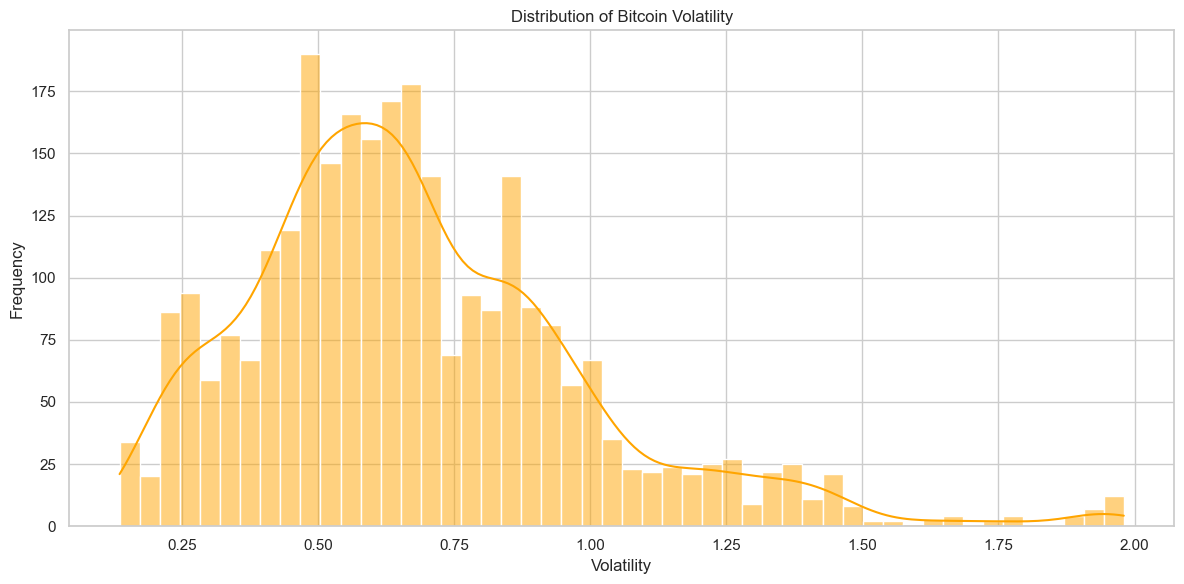

In [51]:
# Analyze distribution of volatility in our data

plt.figure(figsize=(12, 6))
sns.histplot(df_train["Volatility"], bins=50, kde=True, color="orange")
plt.title("Distribution of Bitcoin Volatility")
plt.xlabel("Volatility")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

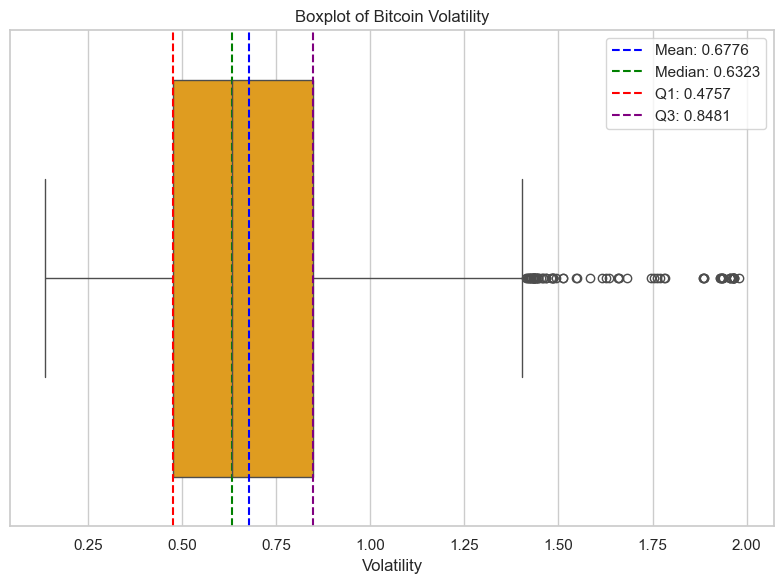

In [52]:
# Boxplot to visualize volatility distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train["Volatility"], color="orange")
plt.title("Boxplot of Bitcoin Volatility")

# Add lines for mean, median, and quantiles
mean_volatility = df_train["Volatility"].mean()
median_volatility = df_train["Volatility"].median()
q1_volatility = df_train["Volatility"].quantile(0.25)
q3_volatility = df_train["Volatility"].quantile(0.75)

plt.axvline(
    mean_volatility, color="blue", linestyle="--", label=f"Mean: {mean_volatility:.4f}"
)
plt.axvline(
    median_volatility,
    color="green",
    linestyle="--",
    label=f"Median: {median_volatility:.4f}",
)
plt.axvline(
    q1_volatility, color="red", linestyle="--", label=f"Q1: {q1_volatility:.4f}"
)
plt.axvline(
    q3_volatility, color="purple", linestyle="--", label=f"Q3: {q3_volatility:.4f}"
)
plt.legend()

plt.xlabel("Volatility")
plt.tight_layout()
plt.show()

Based on the percentiles of the volatility distribution in the training set, we can set the following thresholds:

- **Low Volatility**: 0-0.40
- **Normal Volatility**: 0.40-0.65
- **High Volatility**: >0.65

I choose these thresholds based not only on the distribution of volatility in the training set but also on practical considerations and some articles.

There is nice article:

- [Understanding Volatility in Cryptocurrencies](https://www.postfinance.ch/en/blog/investing-in-simple-terms/understanding-volatility-cryptocurrencies.html)



In [377]:
THRESHOLDS = {
    "Low": 0.40,
    "Normal": 0.65,
    "High": np.inf,
}  # Thresholds based distribution analysis and online research on typical Bitcoin volatility levels


def classify_volatility(vol: float) -> str:
    """
    Classify volatility into 'Low', 'Normal', or 'High' based on predefined thresholds.
     Args:
        vol (float): The volatility value to classify.
    Returns:
        str: The volatility class ('Low', 'Normal', or 'High').
    """
    if vol <= THRESHOLDS["Low"]:
        return "Low"
    elif vol <= THRESHOLDS["Normal"]:
        return "Normal"
    else:
        return "High"


df_train = df_train.copy()
df_val = df_val.copy()
df_test = df_test.copy()

# Create classification target variable
df_train["Volatility_Class"] = df_train["Volatility"].apply(classify_volatility)
df_val["Volatility_Class"] = df_val["Volatility"].apply(classify_volatility)
df_test["Volatility_Class"] = df_test["Volatility"].apply(classify_volatility)

In [378]:
# Apply to validation set
df_val["Volatility_Class"] = df_val["Volatility"].apply(classify_volatility)
print("Volatility Class Distribution in Validation Set:")
print(df_val["Volatility_Class"].value_counts() / len(df_val))

Volatility Class Distribution in Validation Set:
Volatility_Class
Normal    0.497512
Low       0.336650
High      0.165837
Name: count, dtype: float64


In [379]:
# Apply to test set
df_test["Volatility_Class"] = df_test["Volatility"].apply(classify_volatility)

### 2. Create a new target variable `Volatility_Future_Class` based on the defined thresholds

In [380]:
# Define mapping for class labels
MAPPING = {"Low": 0, "Normal": 1, "High": 2}

In [381]:
# Map current volatility classes to numbers - new feature
df_train["Volatility_Class_Num"] = df_train["Volatility_Class"].map(MAPPING)
df_val["Volatility_Class_Num"] = df_val["Volatility_Class"].map(MAPPING)
df_test["Volatility_Class_Num"] = df_test["Volatility_Class"].map(MAPPING)

# Create new target variable for future volatility class
df_train["Volatility_Future_Class"] = df_train["Volatility_Future"].apply(
    classify_volatility
)
df_val["Volatility_Future_Class"] = df_val["Volatility_Future"].apply(
    classify_volatility
)
df_test["Volatility_Future_Class"] = df_test["Volatility_Future"].apply(
    classify_volatility
)

# Drop previous target variable to avoid confusion
df_train = df_train.drop(columns=["Volatility_Future"])
df_val = df_val.drop(columns=["Volatility_Future"])
df_test = df_test.drop(columns=["Volatility_Future"])

In [382]:
# Create encoded target variables for classification and features
X_train = df_train.drop(columns=["Volatility_Future_Class"])
X_val = df_val.drop(columns=["Volatility_Future_Class"])
X_test = df_test.drop(columns=["Volatility_Future_Class"])


y_train_class = df_train["Volatility_Future_Class"].map(MAPPING)
y_val_class = df_val["Volatility_Future_Class"].map(MAPPING)
y_test_class = df_test["Volatility_Future_Class"].map(MAPPING)

In [60]:
# Print class distribution
print("\n" + "=" * 80)
print("CLASSIFICATION TARGET DISTRIBUTION")
print("=" * 80)
print("\nTraining Set:")
print(pd.Series(y_train_class).value_counts(normalize=True).sort_index())
print(f"\nClass mapping: {MAPPING}")

print("\nValidation Set:")
print(pd.Series(y_val_class).value_counts(normalize=True).sort_index())

print("\nTest Set:")
print(pd.Series(y_test_class).value_counts(normalize=True).sort_index())


CLASSIFICATION TARGET DISTRIBUTION

Training Set:
Volatility_Future_Class
0    0.161807
1    0.366643
2    0.471550
Name: proportion, dtype: float64

Class mapping: {'Low': 0, 'Normal': 1, 'High': 2}

Validation Set:
Volatility_Future_Class
0    0.336650
1    0.514096
2    0.149254
Name: proportion, dtype: float64

Test Set:
Volatility_Future_Class
0    0.417910
1    0.505804
2    0.076285
Name: proportion, dtype: float64


We can see that the distribution of volatility classes is unbalanced and different in train, validation and test sets. This is expected as volatility is a non-stationary variable and can change over time. We will need to take this into account when training our classification models. We may set class weight to "balanced" to give more importance to minority classes.

#### Update feature sets - include the current volatility class as a feature

In [153]:
# FEATURE SETS WITH LOOKBACK DAYS

FEATURE_SETS = {
    "minimal": {
        "features": [
            "Close",
            "Volume",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 1,
    },
    "price_only": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 35,
    },
    "volatility_only": {
        "features": [
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
    "short_volatility_only": {
        "features": [
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "simple_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Volatility_Lag7",
            "Volatility_Lag14",
        ],
        "lookback_days": 45,
    },
    "base": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
        ],
        "lookback_days": 35,
    },
    "base_single_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
        ],
        "lookback_days": 35,
    },
    "base_with_short_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_MA_7",
            "Volatility_STD_7",
            "Volatility_Change",
            "Volatility_Change_7d",
        ],
        "lookback_days": 38,
    },
    "compact_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Std_Return_30",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "base_with_medium_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "base_with_long_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
    "all_features": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
}

### 3. Building Baseline Models

#### 1. Baseline 1: Majority Class Classifier

In [62]:
from sklearn.dummy import DummyClassifier

# Baseline 1 - Majority Class Classifier
majority_baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_SEED)
majority_baseline.fit(X_train, y_train_class)

y_pred_train_majority = majority_baseline.predict(X_train)
y_pred_val_majority = majority_baseline.predict(X_val)

metrics_train_majority = calculate_classification_metrics(
    y_train_class, y_pred_train_majority, mapping=MAPPING
)
metrics_val_majority = calculate_classification_metrics(
    y_val_class, y_pred_val_majority, mapping=MAPPING
)

print("\nBaseline 1: Majority Class Classifier")
print(
    f"  Always predicts class: {majority_baseline.classes_[0]} ({list(MAPPING.keys())[list(MAPPING.values()).index(majority_baseline.classes_[0])]})"
)
print("\nValidation Set Metrics:")
for metric, value in metrics_val_majority.items():
    print(f"  Val {metric}: {value:.4f}")

CLASSIFICATION_MODEL_RESULTS["Baseline_Majority"] = {
    "model": "Majority Class Baseline",
    "feature_set": "None",
    "features": [],
    "train_metrics": metrics_train_majority,
    "val_metrics": metrics_val_majority,
}


Baseline 1: Majority Class Classifier
  Always predicts class: 0 (Low)

Validation Set Metrics:
  Val Accuracy: 0.1493
  Val Precision_Macro: 0.0498
  Val Recall_Macro: 0.3333
  Val F1_Macro: 0.0866
  Val Precision_Weighted: 0.0223
  Val Recall_Weighted: 0.1493
  Val F1_Weighted: 0.0388
  Val Precision_Low: 0.0000
  Val Recall_Low: 0.0000
  Val F1_Low: 0.0000
  Val Precision_Normal: 0.0000
  Val Recall_Normal: 0.0000
  Val F1_Normal: 0.0000
  Val Precision_High: 0.1493
  Val Recall_High: 1.0000
  Val F1_High: 0.2597


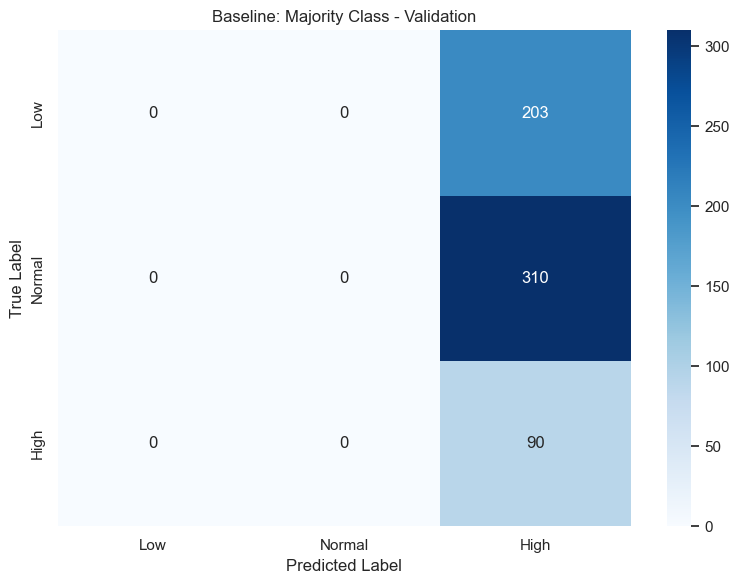


Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       203
      Normal       0.00      0.00      0.00       310
        High       0.15      1.00      0.26        90

    accuracy                           0.15       603
   macro avg       0.05      0.33      0.09       603
weighted avg       0.02      0.15      0.04       603



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

In [63]:
plot_confusion_matrix(
    y_val_class,
    y_pred_val_majority,
    mapping=MAPPING,
    title="Baseline: Majority Class - Validation",
)

#### 2. Baseline 2: Stratified Random Classifier

In [64]:
# Baseline 2: Stratified Random (Random predictions matching class distribution)

stratified_baseline = DummyClassifier(strategy="stratified", random_state=RANDOM_SEED)
stratified_baseline.fit(X_train, y_train_class)

y_pred_train_strat = stratified_baseline.predict(X_train)
y_pred_val_strat = stratified_baseline.predict(X_val)

metrics_train_strat = calculate_classification_metrics(
    y_train_class, y_pred_train_strat, mapping=MAPPING
)
metrics_val_strat = calculate_classification_metrics(
    y_val_class, y_pred_val_strat, mapping=MAPPING
)

print("\nBaseline 2: Stratified Random Classifier")
print(f"  Predicts classes randomly but respects training set class distribution")
print(f" Validation Metrics:")
for metric, value in metrics_val_strat.items():
    print(f"  Val {metric}: {value:.4f}")

CLASSIFICATION_MODEL_RESULTS["Baseline_Stratified"] = {
    "model": "Stratified Random Baseline",
    "feature_set": "None",
    "features": [],
    "train_metrics": metrics_train_strat,
    "val_metrics": metrics_val_strat,
}


Baseline 2: Stratified Random Classifier
  Predicts classes randomly but respects training set class distribution
 Validation Metrics:
  Val Accuracy: 0.3035
  Val Precision_Macro: 0.3271
  Val Recall_Macro: 0.3139
  Val F1_Macro: 0.2827
  Val Precision_Weighted: 0.3957
  Val Recall_Weighted: 0.3035
  Val F1_Weighted: 0.3227
  Val Precision_Low: 0.3431
  Val Recall_Low: 0.1724
  Val F1_Low: 0.2295
  Val Precision_Normal: 0.5068
  Val Recall_Normal: 0.3581
  Val F1_Normal: 0.4197
  Val Precision_High: 0.1312
  Val Recall_High: 0.4111
  Val F1_High: 0.1989


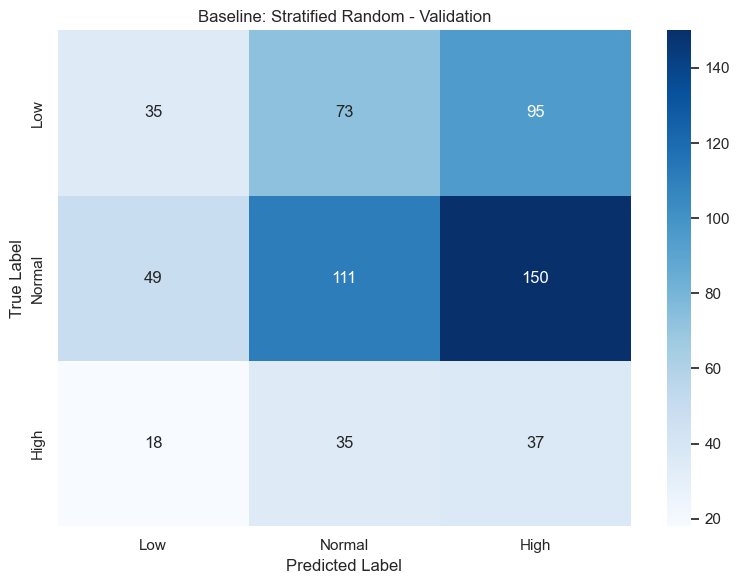


Classification Report:
              precision    recall  f1-score   support

         Low       0.34      0.17      0.23       203
      Normal       0.51      0.36      0.42       310
        High       0.13      0.41      0.20        90

    accuracy                           0.30       603
   macro avg       0.33      0.31      0.28       603
weighted avg       0.40      0.30      0.32       603



In [65]:
plot_confusion_matrix(
    y_val_class,
    y_pred_val_strat,
    mapping=MAPPING,
    title="Baseline: Stratified Random - Validation",
)

#### 3. Baseline 3: Current Volatility Class (Naive Persistence)

In [66]:
# BASELINE 3: PERSISTENCE (Predict same class as current volatility)

# Predict that future volatility class = current volatility class
y_pred_train_persist = df_train["Volatility_Class_Num"]
y_pred_val_persist = df_val["Volatility_Class_Num"]

metrics_train_persist = calculate_classification_metrics(
    y_train_class, y_pred_train_persist, mapping=MAPPING
)
metrics_val_persist = calculate_classification_metrics(
    y_val_class, y_pred_val_persist, mapping=MAPPING
)

print("\nBaseline 3: Persistence (Naive) Classifier")
print(f"  Assumes future class = current class")

print("\nValidation Set Metrics:")
for metric, value in metrics_val_persist.items():
    print(f"  Val {metric}: {value:.4f}")

CLASSIFICATION_MODEL_RESULTS["Baseline_Persistence"] = {
    "model": "Persistence Baseline",
    "feature_set": "Current Volatility",
    "features": ["Volatility"],
    "train_metrics": metrics_train_persist,
    "val_metrics": metrics_val_persist,
}


Baseline 3: Persistence (Naive) Classifier
  Assumes future class = current class

Validation Set Metrics:
  Val Accuracy: 0.3715
  Val Precision_Macro: 0.2907
  Val Recall_Macro: 0.2865
  Val F1_Macro: 0.2885
  Val Precision_Weighted: 0.3795
  Val Recall_Weighted: 0.3715
  Val F1_Weighted: 0.3754
  Val Precision_Low: 0.3054
  Val Recall_Low: 0.3054
  Val F1_Low: 0.3054
  Val Precision_Normal: 0.5267
  Val Recall_Normal: 0.5097
  Val F1_Normal: 0.5180
  Val Precision_High: 0.0400
  Val Recall_High: 0.0444
  Val F1_High: 0.0421


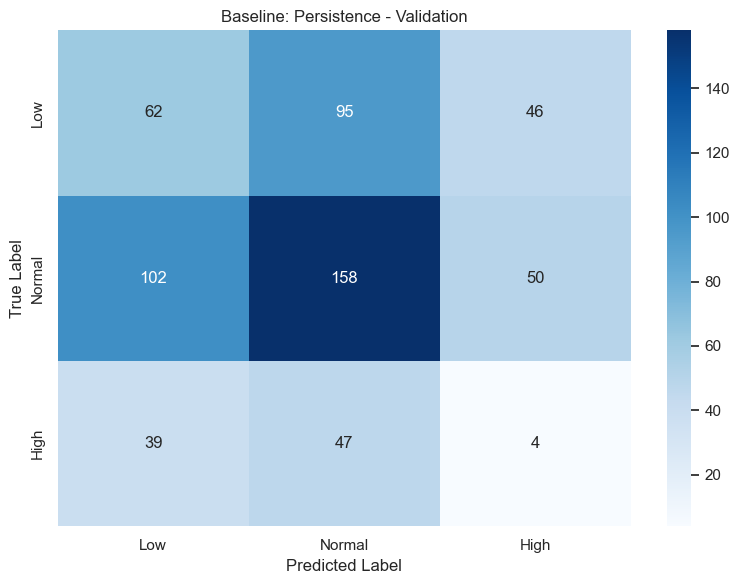


Classification Report:
              precision    recall  f1-score   support

         Low       0.31      0.31      0.31       203
      Normal       0.53      0.51      0.52       310
        High       0.04      0.04      0.04        90

    accuracy                           0.37       603
   macro avg       0.29      0.29      0.29       603
weighted avg       0.38      0.37      0.38       603



In [67]:
plot_confusion_matrix(
    y_val_class,
    y_pred_val_persist,
    mapping=MAPPING,
    title="Baseline: Persistence - Validation",
)

#### 4. Comparison of Baseline Models and Setting a benchmark for further models

                     Model  Train_Accuracy  Val_Accuracy  Train_F1_Macro  Val_F1_Macro  Val_F1_Low  Val_F1_Normal  Val_F1_High
      Persistence Baseline        0.465149      0.371476        0.438073      0.288519    0.305419       0.518033     0.042105
Stratified Random Baseline        0.374822      0.303483        0.323890      0.282698    0.229508       0.419660     0.198925
   Majority Class Baseline        0.471550      0.149254        0.213630      0.086580    0.000000       0.000000     0.259740

BEST BASELINE: Persistence Baseline
   Val F1 Macro: 0.2885
   Val Accuracy: 0.3715


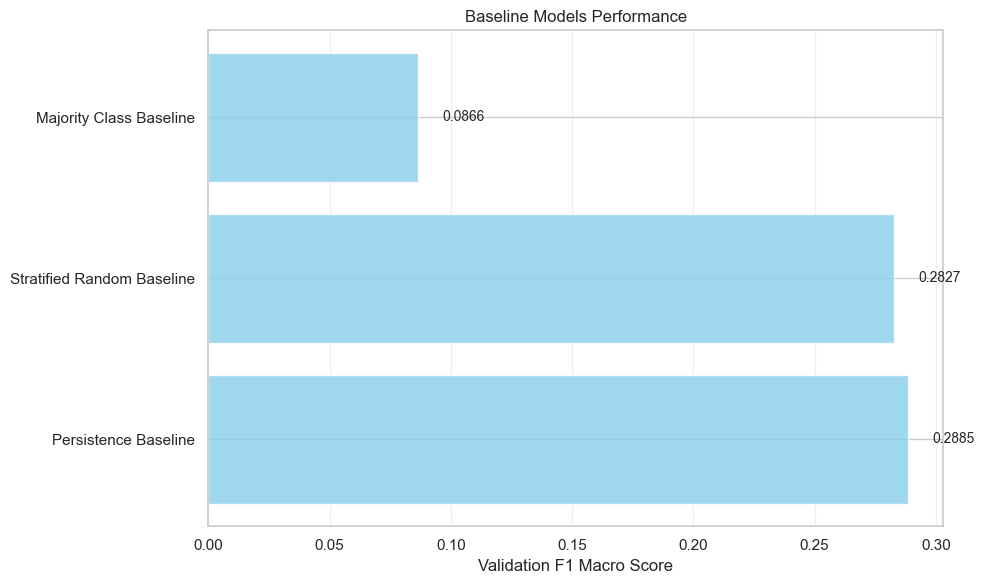

In [68]:
baseline_models = ["Baseline_Majority", "Baseline_Stratified", "Baseline_Persistence"]

baseline_data = []
for model_name in baseline_models:
    if model_name in CLASSIFICATION_MODEL_RESULTS:
        result = CLASSIFICATION_MODEL_RESULTS[model_name]
        baseline_data.append(
            {
                "Model": result["model"],
                "Train_Accuracy": result["train_metrics"]["Accuracy"],
                "Val_Accuracy": result["val_metrics"]["Accuracy"],
                "Train_F1_Macro": result["train_metrics"]["F1_Macro"],
                "Val_F1_Macro": result["val_metrics"]["F1_Macro"],
                "Val_F1_Low": result["val_metrics"]["F1_Low"],
                "Val_F1_Normal": result["val_metrics"]["F1_Normal"],
                "Val_F1_High": result["val_metrics"]["F1_High"],
            }
        )

baseline_df = pd.DataFrame(baseline_data).sort_values("Val_F1_Macro", ascending=False)
print(baseline_df.to_string(index=False))

print(f"\nBEST BASELINE: {baseline_df.iloc[0]['Model']}")
print(f"   Val F1 Macro: {baseline_df.iloc[0]['Val_F1_Macro']:.4f}")
print(f"   Val Accuracy: {baseline_df.iloc[0]['Val_Accuracy']:.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

models = baseline_df["Model"]
val_f1 = baseline_df["Val_F1_Macro"]

bars = ax.barh(models, val_f1, color="skyblue", alpha=0.8)
ax.set_xlabel("Validation F1 Macro Score")
ax.set_title("Baseline Models Performance")
ax.grid(axis="x", alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, val_f1)):
    ax.text(val + 0.01, i, f"{val:.4f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()

### 4. Building Machine Learning Classification Models

#### 1. Logistic Regression

In [69]:
X_train

,Close,High,Low,Open,Return,Log_Return,Price_Diff,Volume,Close_Lag1,Close_Lag5,...,Volatility_Change,Volatility_Change_7d,Volatility_Change_14d,Volatility_Change_30d,Volatility_Momentum,Parkinson_to_HV_Ratio,GK_to_HV_Ratio,RS_to_HV_Ratio,Volatility_Class,Volatility_Class_Num
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-16,327.062012,345.859009,327.062012,345.673004,-0.052941,-0.054394,-18.282990,30864900,345.345001,350.506012,...,0.047266,-0.386971,-0.394147,-0.435076,-0.260283,1.109055,1.136961,1.178078,Normal,1
2014-12-17,319.776001,333.954010,315.152008,326.855011,-0.022277,-0.022529,-7.286011,37567900,327.062012,352.541992,...,0.008493,-0.382570,-0.392541,-0.427822,-0.245879,1.061168,1.069393,1.099153,Normal,1
2014-12-18,311.395996,323.709015,304.231995,319.785004,-0.026206,-0.026555,-8.380005,39173000,319.776001,347.376007,...,-0.008515,-0.389171,-0.400130,-0.438605,-0.238403,1.078525,1.094384,1.127054,Normal,1
2014-12-19,317.842987,318.532990,306.769012,311.178986,0.020704,0.020492,6.446991,23823100,311.395996,351.631989,...,0.010107,-0.092166,-0.391886,-0.432598,-0.223080,1.071244,1.086640,1.117096,Normal,1
2014-12-20,329.955994,330.325012,316.044006,317.618988,0.038110,0.037402,12.113007,20856700,317.842987,345.345001,...,-0.052746,-0.141766,-0.419746,-0.481812,-0.233198,1.099017,1.131608,1.172335,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-23,21528.087891,21646.203125,20955.138672,21401.044922,0.006037,0.006019,129.179688,31878280659,21398.908203,23212.738281,...,-0.000101,0.093844,-0.004287,0.092020,0.007942,0.839283,0.776278,0.775724,Normal,1
2022-08-24,21395.019531,21783.076172,21195.005859,21526.455078,-0.006181,-0.006200,-133.068359,31962253368,21528.087891,20877.552734,...,-0.057625,0.166960,-0.034921,-0.035011,-0.025422,0.869066,0.821071,0.829102,Normal,1
2022-08-25,21600.904297,21789.636719,21362.441406,21395.458984,0.009623,0.009577,205.884766,31028679593,21395.019531,21166.060547,...,0.001006,0.219128,-0.004839,-0.025371,-0.024379,0.865117,0.815182,0.817908,Normal,1


In [70]:
# Train Logistic Regression Classifier With Class Weights
lr_class_result = train_classifier_with_feature_sets(
    model=LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_SEED,
        class_weight="balanced",  # Automatically handles imbalance
    ),
    model_name="Logistic Regression (Balanced)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",  # Macro F1 is good for imbalanced data
    scale=True,
    verbose=True,
)
# Store best result
CLASSIFICATION_MODEL_RESULTS["Logistic_Regression"] = {
    "model": "Logistic Regression",
    "scaler": lr_class_result["best_scaler"],
    "feature_set": lr_class_result["best_feature_set_name"],
    "features": lr_class_result["best_features"],
    "train_metrics": lr_class_result["best_metrics"]["train"],
    "val_metrics": lr_class_result["best_metrics"]["val"],
}

# Print validation metrics for Logistic Regression
print("\nLogistic Regression Best Model Validation Metrics:")
for metric, value in lr_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Logistic Regression (Balanced) with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.4561
  Validation F1_Macro: 0.2790
  Val Accuracy: 0.3997

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.5245
  Validation F1_Macro: 0.2956
  Val Accuracy: 0.4793

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.5579
  Validation F1_Macro: 0.5187
  Val Accuracy: 0.5373

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.5423
  Validation F1_Macro: 0.3834
  Val Accuracy: 0.3930

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.4977
  Validation F1_Macro: 0.3253
  Val Accuracy: 0.4726

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.5967
  Validation F1_Macro: 0.3189
  Val Accuracy: 0.4809

Feature Set: base_single_vol
  Features: 30, Lookback:

In [71]:
compare_feature_sets_results(
    lr_class_result["all_results"], metric="F1_Macro", task="classification"
)

,Feature_Set,N_Features,Lookback_Days,Train_F1_Macro,Val_F1_Macro,Overfit_Gap
0,volatility_only,20,61,0.557934,0.518675,-0.039260
1,short_volatility_only,15,45,0.542326,0.383439,-0.158887
2,base_with_long_vol,46,61,0.605507,0.337324,-0.268184
3,all_features,48,61,0.609053,0.333497,-0.275557
4,compact_vol,26,45,0.524443,0.329060,-0.195383
5,simple_vol,18,45,0.497697,0.325280,-0.172417
6,base,33,35,0.596664,0.318927,-0.277737
7,base_with_short_vol,39,38,0.596786,0.308718,-0.288069
8,price_only,28,35,0.524548,0.295626,-0.228922
9,base_single_vol,30,35,0.547731,0.287133,-0.260598


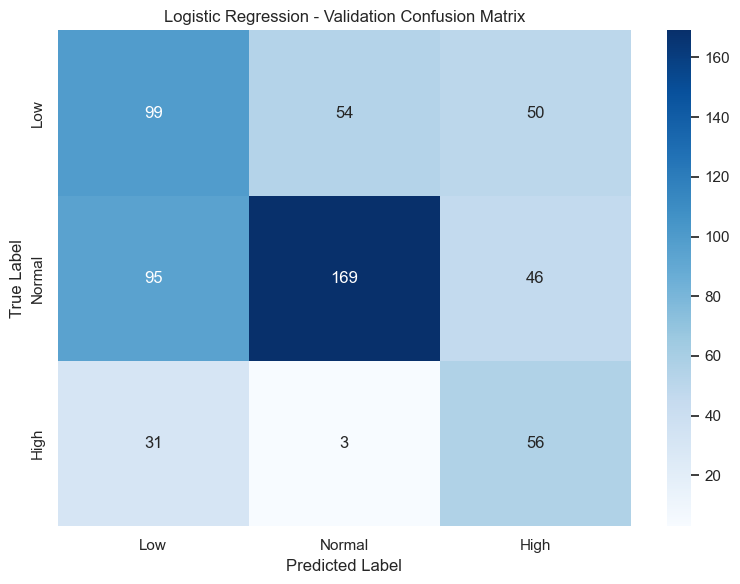


Classification Report:
              precision    recall  f1-score   support

         Low       0.44      0.49      0.46       203
      Normal       0.75      0.55      0.63       310
        High       0.37      0.62      0.46        90

    accuracy                           0.54       603
   macro avg       0.52      0.55      0.52       603
weighted avg       0.59      0.54      0.55       603



In [72]:
# Plot confusion matrix
plot_confusion_matrix(
    y_val_class,
    lr_class_result["best_model"].predict(
        lr_class_result["best_scaler"].transform(
            X_val[lr_class_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="Logistic Regression - Validation Confusion Matrix",
)

#### 2. Random Forest Classifier

In [73]:
# Train Random Forest Classifier With Class Weights

rf_class_result = train_classifier_with_feature_sets(
    model=RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=RANDOM_SEED,
        n_jobs=-1,
        class_weight="balanced",  # Handles imbalance
    ),
    model_name="Random Forest Classifier (Balanced)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=False,
    verbose=True,
)
# Store best result
CLASSIFICATION_MODEL_RESULTS["Random_Forest_Classifier"] = {
    "model": "Random Forest Classifier",
    "feature_set": rf_class_result["best_feature_set_name"],
    "features": rf_class_result["best_features"],
    "train_metrics": rf_class_result["best_metrics"]["train"],
    "val_metrics": rf_class_result["best_metrics"]["val"],
}
# Print validation metrics for Random Forest Classifier
print("\nRandom Forest Classifier Best Model Validation Metrics:")
for metric, value in rf_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Random Forest Classifier (Balanced) with 12 feature sets
Optimizing for: F1_Macro
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9398
  Validation F1_Macro: 0.1960
  Val Accuracy: 0.2388

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.9853
  Validation F1_Macro: 0.1130
  Val Accuracy: 0.1410

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.9625
  Validation F1_Macro: 0.3010
  Val Accuracy: 0.3002

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.9523
  Validation F1_Macro: 0.2702
  Val Accuracy: 0.2769

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.9821
  Validation F1_Macro: 0.1630
  Val Accuracy: 0.2056

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.9837
  Validation F1_Macro: 0.1739
  Val Accuracy: 0.2156

Feature Set: base_single_vol
  Features: 30, Lookb

In [74]:
comparison_df = compare_feature_sets_results(
    rf_class_result["all_results"], metric="F1_Macro", task="classification"
)
comparison_df

,Feature_Set,N_Features,Lookback_Days,Train_F1_Macro,Val_F1_Macro,Overfit_Gap
0,volatility_only,20,61,0.962530,0.300978,-0.661552
1,short_volatility_only,15,45,0.952263,0.270191,-0.682072
2,minimal,9,1,0.939765,0.196011,-0.743755
3,base_with_short_vol,39,38,0.988068,0.177229,-0.810839
4,base,33,35,0.983671,0.173939,-0.809732
5,simple_vol,18,45,0.982107,0.163006,-0.819101
6,all_features,48,61,0.986302,0.140948,-0.845354
7,base_with_long_vol,46,61,0.988520,0.140641,-0.847879
8,compact_vol,26,45,0.988362,0.137417,-0.850944
9,base_single_vol,30,35,0.983294,0.136959,-0.846335


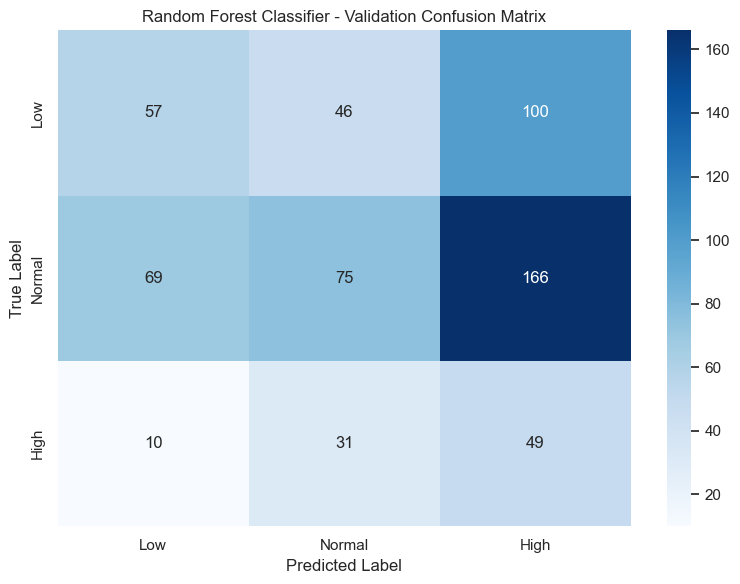


Classification Report:
              precision    recall  f1-score   support

         Low       0.42      0.28      0.34       203
      Normal       0.49      0.24      0.32       310
        High       0.16      0.54      0.24        90

    accuracy                           0.30       603
   macro avg       0.36      0.36      0.30       603
weighted avg       0.42      0.30      0.32       603



In [75]:
plot_confusion_matrix(
    y_val_class,
    rf_class_result["best_model"].predict(X_val[rf_class_result["best_features"]]),
    mapping=MAPPING,
    title="Random Forest Classifier - Validation Confusion Matrix",
)

#### 3. XGBoost Classifier

In [76]:
# Train XGBoost Classifier

xgb_class_result = train_classifier_with_feature_sets(
    model=xgb.XGBClassifier(
        random_state=RANDOM_SEED,
        n_jobs=-1,
        eval_metric="mlogloss",
    ),
    model_name="XGBoost Classifier (Weighted)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=False,
    verbose=True,
)
# Store best result
CLASSIFICATION_MODEL_RESULTS["XGBoost_Classifier"] = {
    "model": "XGBoost Classifier",
    "feature_set": xgb_class_result["best_feature_set_name"],
    "features": xgb_class_result["best_features"],
    "train_metrics": xgb_class_result["best_metrics"]["train"],
    "val_metrics": xgb_class_result["best_metrics"]["val"],
}
# Print validation metrics for XGBoost Classifier
print("\nXGBoost Classifier Best Model Validation Metrics:")
for metric, value in xgb_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training XGBoost Classifier (Weighted) with 12 feature sets
Optimizing for: F1_Macro
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1604
  Val Accuracy: 0.2007

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1542
  Val Accuracy: 0.1940

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2921
  Val Accuracy: 0.2852

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2899
  Val Accuracy: 0.3018

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1539
  Val Accuracy: 0.1907

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2054
  Val Accuracy: 0.2604

Feature Set: base_single_vol
  Features: 30, Lookback: 3

In [77]:
comparison_df = compare_feature_sets_results(
    xgb_class_result["all_results"], metric="F1_Macro", task="classification"
)
comparison_df

,Feature_Set,N_Features,Lookback_Days,Train_F1_Macro,Val_F1_Macro,Overfit_Gap
0,volatility_only,20,61,1.0,0.292127,-0.707873
1,short_volatility_only,15,45,1.0,0.289933,-0.710067
2,base,33,35,1.0,0.205408,-0.794592
3,base_with_long_vol,46,61,1.0,0.189715,-0.810285
4,base_with_short_vol,39,38,1.0,0.180117,-0.819883
5,all_features,48,61,1.0,0.177599,-0.822401
6,minimal,9,1,1.0,0.160360,-0.839640
7,price_only,28,35,1.0,0.154174,-0.845826
8,simple_vol,18,45,1.0,0.153947,-0.846053
9,compact_vol,26,45,1.0,0.146692,-0.853308


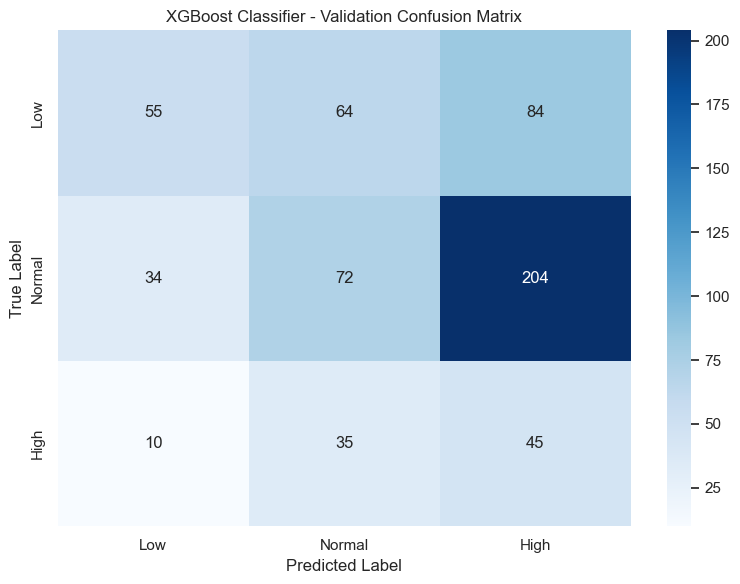


Classification Report:
              precision    recall  f1-score   support

         Low       0.56      0.27      0.36       203
      Normal       0.42      0.23      0.30       310
        High       0.14      0.50      0.21        90

    accuracy                           0.29       603
   macro avg       0.37      0.33      0.29       603
weighted avg       0.42      0.29      0.31       603



In [78]:
# Plot confusion matrix
plot_confusion_matrix(
    y_val_class,
    xgb_class_result["best_model"].predict(X_val[xgb_class_result["best_features"]]),
    mapping=MAPPING,
    title="XGBoost Classifier - Validation Confusion Matrix",
)

#### 4. LGB Classifier

In [79]:
lgb_class_result = train_classifier_with_feature_sets(
    model=lgb.LGBMClassifier(random_state=RANDOM_SEED, n_jobs=-1, verbose=-1),
    model_name="LightGBM Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=False,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["LightGBM"] = {
    "model": "LightGBM Classifier",
    "feature_set": lgb_class_result["best_feature_set_name"],
    "features": lgb_class_result["best_features"],
    "train_metrics": lgb_class_result["best_metrics"]["train"],
    "val_metrics": lgb_class_result["best_metrics"]["val"],
}
# Print validation metrics for LightGBM Classifier
print("\nLightGBM Classifier Best Model Validation Metrics:")
for metric, value in lgb_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training LightGBM Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9921
  Validation F1_Macro: 0.1619
  Val Accuracy: 0.2007

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1416
  Val Accuracy: 0.1758

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2825
  Val Accuracy: 0.2753

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.9994
  Validation F1_Macro: 0.2841
  Val Accuracy: 0.2919

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1392
  Val Accuracy: 0.1725

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1575
  Val Accuracy: 0.1973

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  T

In [80]:
comparison_df = compare_feature_sets_results(
    lgb_class_result["all_results"], metric="F1_Macro", task="classification"
)
comparison_df

,Feature_Set,N_Features,Lookback_Days,Train_F1_Macro,Val_F1_Macro,Overfit_Gap
0,short_volatility_only,15,45,0.999425,0.284133,-0.715292
1,volatility_only,20,61,1.000000,0.282514,-0.717486
2,minimal,9,1,0.992050,0.161896,-0.830154
3,base,33,35,1.000000,0.157494,-0.842506
4,base_with_short_vol,39,38,1.000000,0.149113,-0.850887
5,base_with_long_vol,46,61,1.000000,0.149089,-0.850911
6,price_only,28,35,1.000000,0.141641,-0.858359
7,all_features,48,61,1.000000,0.140553,-0.859447
8,simple_vol,18,45,1.000000,0.139180,-0.860820
9,compact_vol,26,45,1.000000,0.129522,-0.870478


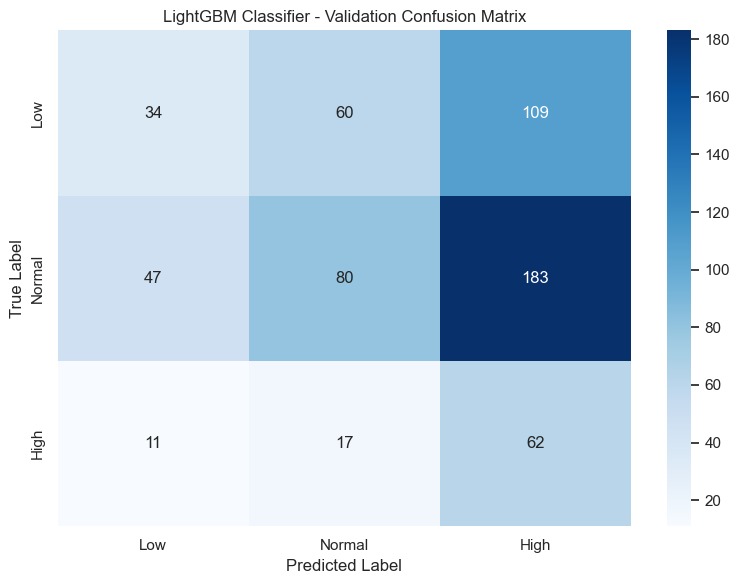


Classification Report:
              precision    recall  f1-score   support

         Low       0.37      0.17      0.23       203
      Normal       0.51      0.26      0.34       310
        High       0.18      0.69      0.28        90

    accuracy                           0.29       603
   macro avg       0.35      0.37      0.28       603
weighted avg       0.41      0.29      0.30       603



In [81]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    lgb_class_result["best_model"].predict(X_val[lgb_class_result["best_features"]]),
    mapping=MAPPING,
    title="LightGBM Classifier - Validation Confusion Matrix",
)

As our dataset is quite small, and in the previous experiment we saw that deep learning models were not able to perform well, we will not try to build deep learning classification models. We will focus on traditional machine learning algorithms that are more suitable for small datasets. We will try with bagging, stacking, voting and AdaBoost classifiers.

#### 5. Voting Classifier

##### Soft Voting

In [82]:
base_models = [
    (
        "lr",
        LogisticRegression(
            class_weight="balanced", max_iter=1000, random_state=RANDOM_SEED
        ),
    ),
    (
        "rf",
        RandomForestClassifier(
            class_weight="balanced", random_state=RANDOM_SEED, n_jobs=-1
        ),
    ),
    ("xgb", xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=-1)),
]

# Create voting classifier
voting_soft = VotingClassifier(
    estimators=base_models,
    voting="soft",  # Use predicted probabilities
    n_jobs=-1,
)

# Train with best feature set
voting_result = train_classifier_with_feature_sets(
    model=voting_soft,
    model_name="Voting Classifier (Soft)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,  # Will scale for all models
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Voting_Soft"] = {
    "model": "Voting Classifier (Soft)",
    "scaler": voting_result["best_scaler"],
    "feature_set": voting_result["best_feature_set_name"],
    "features": voting_result["best_features"],
    "train_metrics": voting_result["best_metrics"]["train"],
    "val_metrics": voting_result["best_metrics"]["val"],
}
# Print validation metrics for Voting Classifier
print("\nVoting Classifier Best Model Validation Metrics:")
for metric, value in voting_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Voting Classifier (Soft) with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1707
  Val Accuracy: 0.2206

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1544
  Val Accuracy: 0.1973

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2847
  Val Accuracy: 0.2803

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2816
  Val Accuracy: 0.2886

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1511
  Val Accuracy: 0.1874

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2039
  Val Accuracy: 0.2653

Feature Set: base_single_vol
  Features: 30, Lookback: 35 da

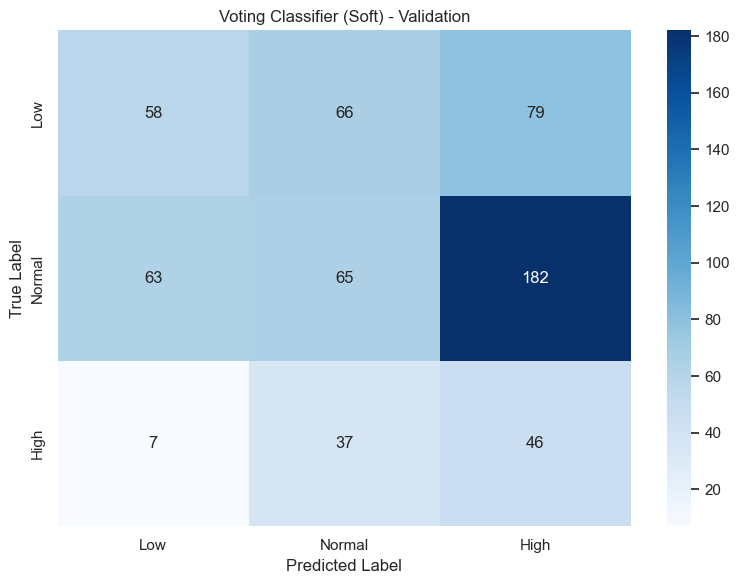


Classification Report:
              precision    recall  f1-score   support

         Low       0.45      0.29      0.35       203
      Normal       0.39      0.21      0.27       310
        High       0.15      0.51      0.23        90

    accuracy                           0.28       603
   macro avg       0.33      0.34      0.28       603
weighted avg       0.37      0.28      0.29       603



In [83]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    voting_result["best_model"].predict(
        voting_result["best_scaler"].transform(X_val[voting_result["best_features"]])
    ),
    mapping=MAPPING,
    title="Voting Classifier (Soft) - Validation",
)

##### Hard Voting

In [84]:
voting_hard = VotingClassifier(
    estimators=base_models,
    voting="hard",  # Use majority vote
    n_jobs=-1,
)

voting_hard_result = train_classifier_with_feature_sets(
    model=voting_hard,
    model_name="Voting Classifier (Hard)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Voting_Hard"] = {
    "model": "Voting Classifier (Hard)",
    "scaler": voting_hard_result["best_scaler"],
    "feature_set": voting_hard_result["best_feature_set_name"],
    "features": voting_hard_result["best_features"],
    "train_metrics": voting_hard_result["best_metrics"]["train"],
    "val_metrics": voting_hard_result["best_metrics"]["val"],
}

# Print validation metrics for Voting Classifier
print("\nVoting Classifier (Hard) Best Model Validation Metrics:")
for metric, value in voting_hard_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Voting Classifier (Hard) with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9989
  Validation F1_Macro: 0.1768
  Val Accuracy: 0.2189

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1400
  Val Accuracy: 0.1824

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.3089
  Val Accuracy: 0.3051

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2985
  Val Accuracy: 0.3018

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1641
  Val Accuracy: 0.2040

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2195
  Val Accuracy: 0.2769

Feature Set: base_single_vol
  Features: 30, Lookback: 35 da

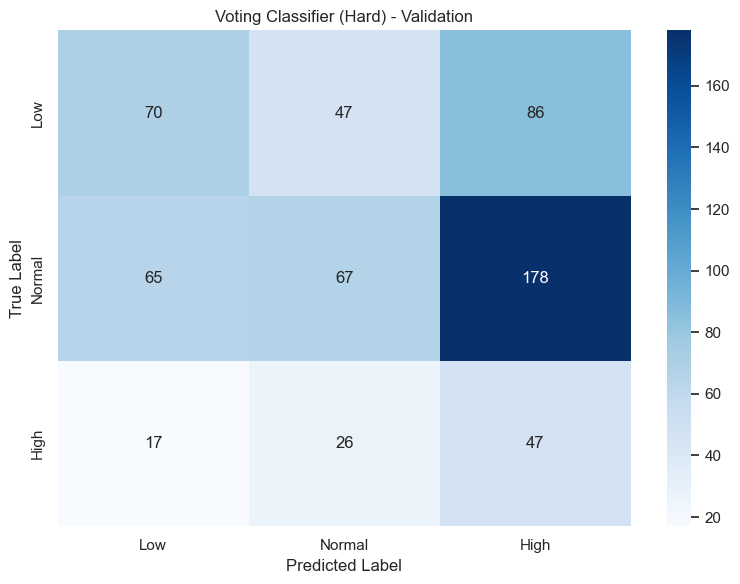


Classification Report:
              precision    recall  f1-score   support

         Low       0.46      0.34      0.39       203
      Normal       0.48      0.22      0.30       310
        High       0.15      0.52      0.23        90

    accuracy                           0.31       603
   macro avg       0.36      0.36      0.31       603
weighted avg       0.42      0.31      0.32       603



In [85]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    voting_hard_result["best_model"].predict(
        voting_hard_result["best_scaler"].transform(
            X_val[voting_hard_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="Voting Classifier (Hard) - Validation",
)

#### 6. Stacking Classifier

In [86]:
# Base models (Level 0)
base_estimators = [
    (
        "lr_l1",
        LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            random_state=RANDOM_SEED,
        ),
    ),
    (
        "rf",
        RandomForestClassifier(
            class_weight="balanced", random_state=RANDOM_SEED, n_jobs=-1
        ),
    ),
    ("xgb", xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=-1)),
    (
        "lgb",
        lgb.LGBMClassifier(
            class_weight="balanced", random_state=RANDOM_SEED, verbose=-1, n_jobs=-1
        ),
    ),
]

# Meta-model (Level 1) - simple logistic regression
final_estimator = LogisticRegression(
    C=0.5, class_weight="balanced", max_iter=1000, random_state=RANDOM_SEED
)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5,  # Use 5-fold CV for training meta-model
    stack_method="predict_proba",  # Use probabilities from base models
    n_jobs=-1,
)

stacking_result = train_classifier_with_feature_sets(
    model=stacking_clf,
    model_name="Stacking Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Stacking"] = {
    "model": "Stacking Classifier",
    "scaler": stacking_result["best_scaler"],
    "feature_set": stacking_result["best_feature_set_name"],
    "features": stacking_result["best_features"],
    "train_metrics": stacking_result["best_metrics"]["train"],
    "val_metrics": stacking_result["best_metrics"]["val"],
}
# Print validation metrics for Stacking Classifier
print("\nStacking Classifier Best Model Validation Metrics:")
for metric, value in stacking_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Stacking Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.3294
  Validation F1_Macro: 0.2875
  Val Accuracy: 0.3250



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.3397
  Validation F1_Macro: 0.1142
  Val Accuracy: 0.1376



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.2772
  Validation F1_Macro: 0.5098
  Val Accuracy: 0.5340



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.3730
  Validation F1_Macro: 0.4073
  Val Accuracy: 0.4444



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.3452
  Validation F1_Macro: 0.1918
  Val Accuracy: 0.2206



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.3431
  Validation F1_Macro: 0.2623
  Val Accuracy: 0.2687



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  Training F1_Macro: 0.3444
  Validation F1_Macro: 0.1117
  Val Accuracy: 0.1459



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_with_short_vol
  Features: 39, Lookback: 38 days
  Training F1_Macro: 0.3645
  Validation F1_Macro: 0.2673
  Val Accuracy: 0.2769



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: compact_vol
  Features: 26, Lookback: 45 days
  Training F1_Macro: 0.3430
  Validation F1_Macro: 0.1861
  Val Accuracy: 0.2007

Feature Set: base_with_medium_vol - FAILED
  Error: "['Volatility_STD_14Volatility_Change'] not in index"



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_with_long_vol
  Features: 46, Lookback: 61 days
  Training F1_Macro: 0.3885
  Validation F1_Macro: 0.2511
  Val Accuracy: 0.2769



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: all_features
  Features: 48, Lookback: 61 days
  Training F1_Macro: 0.3958
  Validation F1_Macro: 0.2712
  Val Accuracy: 0.3184

BEST FEATURE SET: volatility_only
  Features: 20
  Lookback: 61 days
  Validation F1_Macro: 0.5098
  Validation Accuracy: 0.5340


Stacking Classifier Best Model Validation Metrics:
  Accuracy: 0.533997
  Precision_Macro: 0.502174
  Recall_Macro: 0.538976
  F1_Macro: 0.509847
  Precision_Weighted: 0.558906
  Recall_Weighted: 0.533997
  F1_Weighted: 0.540101
  Precision_Low: 0.440415
  Recall_Low: 0.418719
  F1_Low: 0.429293
  Precision_Normal: 0.689394
  Recall_Normal: 0.587097
  F1_Normal: 0.634146
  Precision_High: 0.376712
  Recall_High: 0.611111
  F1_High: 0.466102


/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


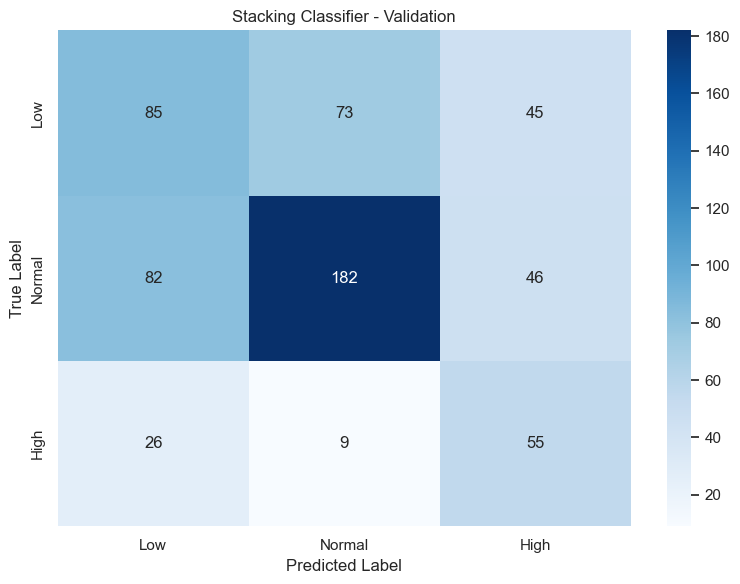


Classification Report:
              precision    recall  f1-score   support

         Low       0.44      0.42      0.43       203
      Normal       0.69      0.59      0.63       310
        High       0.38      0.61      0.47        90

    accuracy                           0.53       603
   macro avg       0.50      0.54      0.51       603
weighted avg       0.56      0.53      0.54       603



In [87]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    stacking_result["best_model"].predict(
        stacking_result["best_scaler"].transform(
            X_val[stacking_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="Stacking Classifier - Validation",
)

#### 7. Bagging Classifier

In [88]:
# Base model to bag
base_lr = LogisticRegression(
    class_weight="balanced", max_iter=1000, random_state=RANDOM_SEED
)

# Create bagging ensemble
bagging_clf = BaggingClassifier(
    estimator=base_lr,
    n_estimators=20,  # Number of base models
    max_samples=0.7,  # 70% of data per model
    max_features=0.8,  # 80% of features per model
    bootstrap=True,  # Sample with replacement
    bootstrap_features=False,  # Don't sample features with replacement
    random_state=RANDOM_SEED,
    n_jobs=-1,
)

bagging_result = train_classifier_with_feature_sets(
    model=bagging_clf,
    model_name="Bagging Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Bagging"] = {
    "model": "Bagging Classifier",
    "scaler": bagging_result["best_scaler"],
    "feature_set": bagging_result["best_feature_set_name"],
    "features": bagging_result["best_features"],
    "train_metrics": bagging_result["best_metrics"]["train"],
    "val_metrics": bagging_result["best_metrics"]["val"],
}
# Print validation metrics for Bagging Classifier
print("\nBagging Classifier Best Model Validation Metrics:")
for metric, value in bagging_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Bagging Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.4656
  Validation F1_Macro: 0.2674
  Val Accuracy: 0.3632

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.5156
  Validation F1_Macro: 0.2812
  Val Accuracy: 0.4710

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.5501
  Validation F1_Macro: 0.5208
  Val Accuracy: 0.5373

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.5318
  Validation F1_Macro: 0.3787
  Val Accuracy: 0.3897

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.4934
  Validation F1_Macro: 0.3110
  Val Accuracy: 0.4842

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.5943
  Validation F1_Macro: 0.3244
  Val Accuracy: 0.5058

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  T

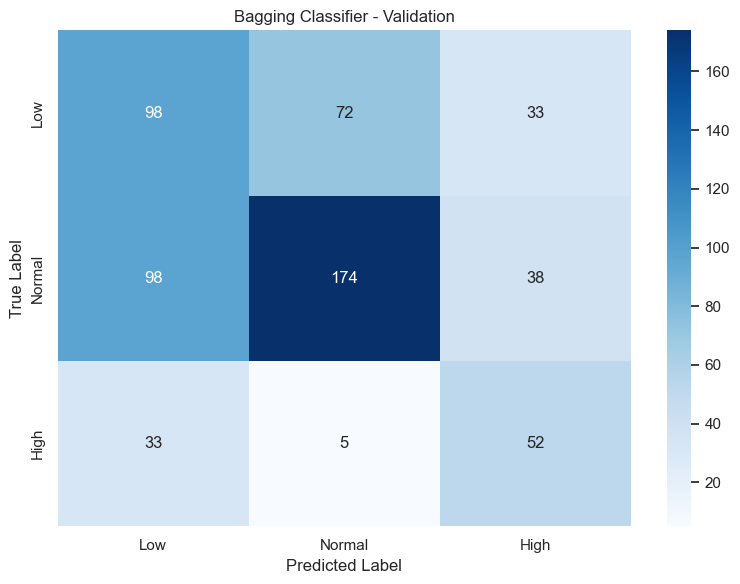


Classification Report:
              precision    recall  f1-score   support

         Low       0.43      0.48      0.45       203
      Normal       0.69      0.56      0.62       310
        High       0.42      0.58      0.49        90

    accuracy                           0.54       603
   macro avg       0.51      0.54      0.52       603
weighted avg       0.56      0.54      0.54       603



In [89]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    bagging_result["best_model"].predict(
        bagging_result["best_scaler"].transform(X_val[bagging_result["best_features"]])
    ),
    mapping=MAPPING,
    title="Bagging Classifier - Validation",
)

#### 8. AdaBoost Classifier

In [90]:
# Weak learner - shallow decision tree
weak_learner = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=RANDOM_SEED,
)

# AdaBoost ensemble
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner, learning_rate=0.5, random_state=RANDOM_SEED
)

adaboost_result = train_classifier_with_feature_sets(
    model=adaboost_clf,
    model_name="AdaBoost Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["AdaBoost"] = {
    "model": "AdaBoost Classifier",
    "scaler": adaboost_result["best_scaler"],
    "feature_set": adaboost_result["best_feature_set_name"],
    "features": adaboost_result["best_features"],
    "train_metrics": adaboost_result["best_metrics"]["train"],
    "val_metrics": adaboost_result["best_metrics"]["val"],
}

# Print validation metrics for AdaBoost Classifier
print("\nAdaBoost Classifier Best Model Validation Metrics:")
for metric, value in adaboost_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training AdaBoost Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.5324
  Validation F1_Macro: 0.2129
  Val Accuracy: 0.2703

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.5989
  Validation F1_Macro: 0.2922
  Val Accuracy: 0.3483

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.5089
  Validation F1_Macro: 0.3334
  Val Accuracy: 0.3814

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.5184
  Validation F1_Macro: 0.2795
  Val Accuracy: 0.3118

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.5696
  Validation F1_Macro: 0.2614
  Val Accuracy: 0.4444

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.6256
  Validation F1_Macro: 0.2265
  Val Accuracy: 0.4328

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  

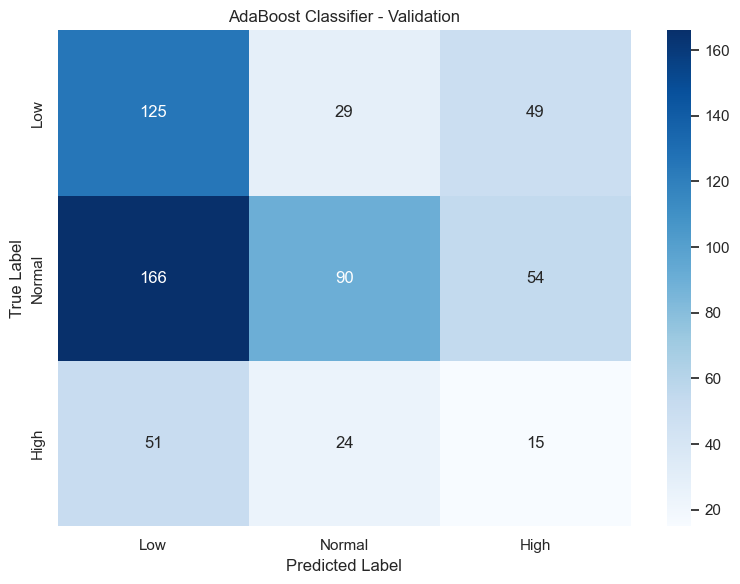


Classification Report:
              precision    recall  f1-score   support

         Low       0.37      0.62      0.46       203
      Normal       0.63      0.29      0.40       310
        High       0.13      0.17      0.14        90

    accuracy                           0.38       603
   macro avg       0.37      0.36      0.33       603
weighted avg       0.47      0.38      0.38       603



In [91]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    adaboost_result["best_model"].predict(
        adaboost_result["best_scaler"].transform(
            X_val[adaboost_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="AdaBoost Classifier - Validation",
)

#### 9. Comparison of Classification Models 

In [92]:
# Compare all classification models

print("\n" + "=" * 100)
print("CLASSIFICATION MODELS COMPARISON")
print("=" * 100)

comparison_data = []
for model_name, result in CLASSIFICATION_MODEL_RESULTS.items():
    comparison_data.append(
        {
            "Model": result["model"],
            "Feature_Set": result["feature_set"],
            "N_Features": len(result["features"]),
            "Train_Accuracy": result["train_metrics"]["Accuracy"],
            "Val_Accuracy": result["val_metrics"]["Accuracy"],
            "Train_F1_Macro": result["train_metrics"]["F1_Macro"],
            "Val_F1_Macro": result["val_metrics"]["F1_Macro"],
            "Val_F1_Low": result["val_metrics"]["F1_Low"],
            "Val_F1_Normal": result["val_metrics"]["F1_Normal"],
            "Val_F1_High": result["val_metrics"]["F1_High"],
        }
    )

comparison_df = pd.DataFrame(comparison_data).sort_values(
    "Val_F1_Macro", ascending=False
)
comparison_df


CLASSIFICATION MODELS COMPARISON


,Model,Feature_Set,N_Features,Train_Accuracy,Val_Accuracy,Train_F1_Macro,Val_F1_Macro,Val_F1_Low,Val_F1_Normal,Val_F1_High
10,Bagging Classifier,volatility_only,20,0.555477,0.537313,0.550129,0.520762,0.453704,0.620321,0.488263
3,Logistic Regression,volatility_only,20,0.563656,0.537313,0.557934,0.518675,0.462617,0.630597,0.462810
9,Stacking Classifier,volatility_only,20,0.287696,0.533997,0.277232,0.509847,0.429293,0.634146,0.466102
11,AdaBoost Classifier,volatility_only,20,0.529161,0.381426,0.508875,0.333432,0.458716,0.397351,0.144231
8,Voting Classifier (Hard),volatility_only,20,1.000000,0.305141,1.000000,0.308853,0.394366,0.297778,0.234414
4,Random Forest Classifier,volatility_only,20,0.961238,0.300166,0.962530,0.300978,0.336283,0.324675,0.241975
5,XGBoost Classifier,volatility_only,20,1.000000,0.285240,1.000000,0.292127,0.364238,0.299376,0.212766
2,Persistence Baseline,Current Volatility,1,0.465149,0.371476,0.438073,0.288519,0.305419,0.518033,0.042105
7,Voting Classifier (Soft),volatility_only,20,1.000000,0.280265,1.000000,0.284719,0.350453,0.271967,0.231738
6,LightGBM Classifier,short_volatility_only,15,0.999289,0.291874,0.999425,0.284133,0.230508,0.342612,0.279279


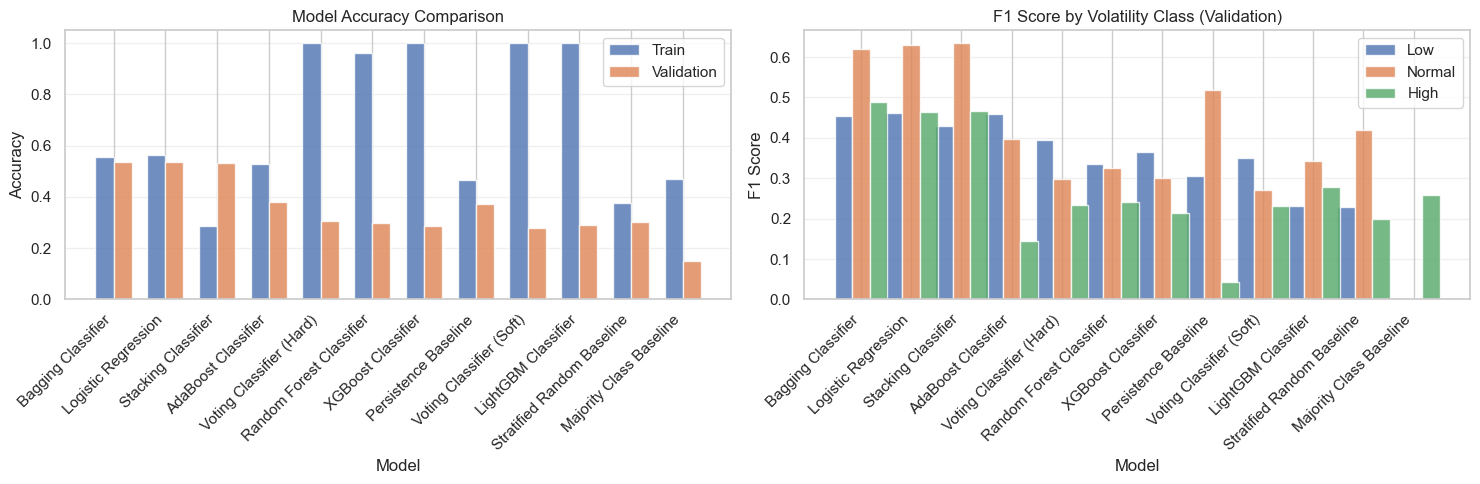

In [93]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
models = comparison_df["Model"]
train_acc = comparison_df["Train_Accuracy"]
val_acc = comparison_df["Val_Accuracy"]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width / 2, train_acc, width, label="Train", alpha=0.8)
axes[0].bar(x + width / 2, val_acc, width, label="Validation", alpha=0.8)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha="right")
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)

# F1 Score per class
val_f1_low = comparison_df["Val_F1_Low"]
val_f1_normal = comparison_df["Val_F1_Normal"]
val_f1_high = comparison_df["Val_F1_High"]

axes[1].bar(x - width, val_f1_low, width, label="Low", alpha=0.8)
axes[1].bar(x, val_f1_normal, width, label="Normal", alpha=0.8)
axes[1].bar(x + width, val_f1_high, width, label="High", alpha=0.8)
axes[1].set_xlabel("Model")
axes[1].set_ylabel("F1 Score")
axes[1].set_title("F1 Score by Volatility Class (Validation)")
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha="right")
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

#### 10. Observations and Conclusions

##### Model Performance Overview
The classification task proved moderately challenging, with the best models achieving ~54% validation accuracy and F1-macro scores around 0.52. This represents a meaningful improvement over baseline approaches, though substantial room for enhancement remains.

##### Key Findings

**1. Severe Overfitting in Tree-Based Models**
- Random Forest, XGBoost, LightGBM, and ensemble methods (Voting, Stacking) exhibited catastrophic overfitting
- Training accuracy: 96-100% vs. Validation accuracy: 28-30%
- These models memorized training patterns rather than learning generalizable volatility dynamics
- Root cause: Insufficient regularization combined with high model complexity

**2. Linear Models Show Superior Generalization**
- Logistic Regression and Bagging Classifier emerged as top performers (Val F1: 0.52)
- Both achieved balanced train-test performance (Train: 0.55-0.56, Val: 0.54)
- Simpler models better suited to the limited feature set (20 volatility-based features)
- Linear decision boundaries may be more appropriate for this problem structure

**3. Class-Specific Performance Patterns**
- "Normal" volatility class consistently achieved highest F1 scores (0.62-0.63)
- "Low" and "High" volatility classes showed weaker performance (0.45-0.49)
- Suggests model bias toward the majority/middle class

**4. Baseline Comparison Reveals Moderate Predictive Power**
- Persistence baseline (predicting current volatility continues): 37% accuracy, F1: 0.29
- Best models improved by 16 percentage points in accuracy
- Demonstrates that historical volatility features contain meaningful predictive signal
- However, gap to theoretical maximum suggests significant information still uncaptured

**5. Feature Set Effectiveness**
- "volatility_only" feature set (20 features) selected by most models
- Includes: rolling volatility statistics, Parkinson/Garman-Klass/Rogers-Satchell estimators
- Success of this focused set suggests volatility exhibits autoregressive properties
- More complex feature engineering may not help without addressing fundamental issues





##### Identified Issue

**Class Imbalance and Distribution in Train, Validation and Test Sets - Data Drift**

- The distribution of volatility classes is unbalanced across train, validation, and test sets
- This is expected due to the non-stationary nature of volatility, which can change over time
- Models struggle to generalize because the class distribution in the validation/test sets differs significantly from the training set
- Class imbalance can lead to models being biased towards the majority class, resulting in poor performance on minority classes (e.g., "Low" and "High" volatility)

### 5. Model Optimization

We can clearly see that the best models use `volatility_only` feature set, which includes 20 features related to volatility. This suggests that the most important information for predicting future volatility is contained within these volatility-based features, and adding more complex features may not necessarily improve performance. We will try to experiment with different combinations of features from this set to see if we can further improve the results. We will also try to optimize hyperparameters of our best models  to see if we can achieve better performance.  

Our optimization process follows a systematic approach:

1. **Baseline Model**: Establish initial performance with all features
2. **Feature Selection**: Identify the most predictive feature combinations
3. **Hyperparameter Tuning**: Optimize model parameters for best performance
4. **Final Evaluation**: Validate chosen model on test set

The goal is to maximize F1-Macro score while maintaining interpretability and avoiding overfitting to ensure robust performance on unseen data.

##### 5.1 Feature Engineering: Define Feature Groups

We organize our features into logical groups to facilitate systematic experimentation. This modular approach allows us to test different feature combinations efficiently.


In [163]:
best_features = FEATURE_SETS["volatility_only"]["features"]
best_features

['Volatility',
 'Volatility_Class_Num',
 'Parkinson_Volatility',
 'Garman_Klass_Volatility',
 'Roger_Satchel_Volatility',
 'Volatility_Lag1',
 'Volatility_Lag7',
 'Volatility_Lag14',
 'Volatility_Lag30',
 'Volatility_MA_7',
 'Volatility_MA_14',
 'Volatility_MA_30',
 'Volatility_STD_7',
 'Volatility_STD_14',
 'Volatility_STD_30',
 'Volatility_Change',
 'Volatility_Change_7d',
 'Volatility_Change_14d',
 'Volatility_Change_30d',
 'Volatility_Momentum']

In [ ]:
# Comprehensive feature groups for volatility prediction
# We will exclude the volattility as Volatility_Class_Num probably captures most of the information and we have other volatility features.
VOL_FEATURE_GROUPS = {
    "core": [
        "Volatility_Class_Num",
        "Parkinson_Volatility",
        "Garman_Klass_Volatility",
        "Roger_Satchel_Volatility",
    ],
    "lags": [
        "Volatility_Lag1",
        "Volatility_Lag7",
        "Volatility_Lag14",
        "Volatility_Lag30",
    ],
    "ma": [
        "Volatility_MA_7",
        "Volatility_MA_14",
        "Volatility_MA_30",
    ],
    "std": [
        "Volatility_STD_7",
        "Volatility_STD_14",
        "Volatility_STD_30",
    ],
    "change": [
        "Volatility_Change",
        "Volatility_Change_7d",
        "Volatility_Change_14d",
        "Volatility_Change_30d",
    ],
    "momentum": [
        "Volatility_Momentum",
    ],
}

##### 5.2 Feature Set Experiments

We create various minimal feature sets to identify which combinations provide the best predictive power without overfitting. Each set focuses on different
aspects of volatility dynamics.

In [231]:
# Create minimal feature sets with lookback days
MINIMAL_VOL_FEATURE_SETS = {
    "core_only": {
        "features": VOL_FEATURE_GROUPS["core"],
        "lookback_days": 30,
    },
    "core_lags": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["lags"],
        "lookback_days": 61,
    },
    "core_ma": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["ma"],
        "lookback_days": 61,
    },
    "core_std": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["std"],
        "lookback_days": 61,
    },
    "core_change": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["change"],
        "lookback_days": 61,
    },
    "core_no_7d": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
    "core_no_14d": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
    "core_no_30d": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Momentum",
        ],
        "lookback_days": 45,
    },
    "core_7d_only": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag7",
            "Volatility_MA_7",
            "Volatility_STD_7",
            "Volatility_Change_7d",
        ],
        "lookback_days": 38,
    },
    "core_14d_only": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag14",
            "Volatility_MA_14",
            "Volatility_STD_14",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "core_30d_only": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag30",
            "Volatility_MA_30",
            "Volatility_STD_30",
            "Volatility_Change_30d",
        ],
        "lookback_days": 61,
    },
    "minimal_ma_std": {
        "features": VOL_FEATURE_GROUPS["core"]
        + ["Volatility_MA_14", "Volatility_STD_14"],
        "lookback_days": 45,
    },
    "minimal_lag_change": {
        "features": VOL_FEATURE_GROUPS["core"]
        + ["Volatility_Lag7", "Volatility_Change_7d"],
        "lookback_days": 38,
    },
    "ultra_minimal": {
        "features": VOL_FEATURE_GROUPS["core"] + ["Volatility_Lag7"],
        "lookback_days": 38,
    },
    "volatility_only_full": {
        "features": VOL_FEATURE_GROUPS["core"]
        + VOL_FEATURE_GROUPS["lags"]
        + VOL_FEATURE_GROUPS["ma"]
        + VOL_FEATURE_GROUPS["std"]
        + VOL_FEATURE_GROUPS["change"]
        + VOL_FEATURE_GROUPS["momentum"],
        "lookback_days": 61,
    },
}

# Feature sets summary
print("\nFeature Set Configurations:")
print("=" * 80)
for set_name, config in MINIMAL_VOL_FEATURE_SETS.items():
    print(f"\n{set_name.upper()}")
    print(
        f"  Features ({len(config['features'])}): {', '.join(config['features'][:3])}..."
    )
    print(f"  Lookback days: {config['lookback_days']}")
print("=" * 80)


Feature Set Configurations:

CORE_ONLY
  Features (4): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 30

CORE_LAGS
  Features (8): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 61

CORE_MA
  Features (7): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 61

CORE_STD
  Features (7): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 61

CORE_CHANGE
  Features (8): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 61

CORE_NO_7D
  Features (13): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 61

CORE_NO_14D
  Features (15): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 61

CORE_NO_30D
  Features (15): Volatility_Class_Num, Parkinson_Volatility, Garman_Klass_Volatility...
  Lookback days: 45

CORE_7D_ONLY
  Feat

##### 5.3 Systematic Feature Set Evaluation

We train a baseline Logistic Regression model with each feature set and compare their performance on the validation set.

In [232]:
lr_volatility_features_results = train_classifier_with_feature_sets(
    model=LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=RANDOM_SEED,
    ),
    model_name="Logistic Regression - Feature Set Comparison",
    feature_sets=MINIMAL_VOL_FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)


Training Logistic Regression - Feature Set Comparison with 15 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: core_only
  Features: 4, Lookback: 30 days
  Training F1_Macro: 0.5267
  Validation F1_Macro: 0.3993
  Val Accuracy: 0.4113

Feature Set: core_lags
  Features: 8, Lookback: 61 days
  Training F1_Macro: 0.5383
  Validation F1_Macro: 0.4369
  Val Accuracy: 0.4411

Feature Set: core_ma
  Features: 7, Lookback: 61 days
  Training F1_Macro: 0.5363
  Validation F1_Macro: 0.4211
  Val Accuracy: 0.4245

Feature Set: core_std
  Features: 7, Lookback: 61 days
  Training F1_Macro: 0.5383
  Validation F1_Macro: 0.4493
  Val Accuracy: 0.4809

Feature Set: core_change
  Features: 8, Lookback: 61 days
  Training F1_Macro: 0.5228
  Validation F1_Macro: 0.4345
  Val Accuracy: 0.4411

Feature Set: core_no_7d
  Features: 13, Lookback: 61 days
  Training F1_Macro: 0.5531
  Validation F1_Macro: 0.5235
  Val Accuracy: 0.5423

Feature Set: core_no_14d
  Features: 15, Lookback: 61 da

##### 5.4 Feature Set Performance Analysis

In [233]:
feature_sets_results = compare_feature_sets_results(
    lr_volatility_features_results["all_results"],
    metric="F1_Macro",
    task="classification",
)
feature_sets_results

,Feature_Set,N_Features,Lookback_Days,Train_F1_Macro,Val_F1_Macro,Overfit_Gap
0,core_30d_only,8,61,0.524511,0.539619,0.015108
1,core_no_7d,13,61,0.553125,0.523535,-0.029590
2,volatility_only_full,19,61,0.559395,0.518675,-0.040720
3,core_no_14d,15,61,0.559725,0.511752,-0.047973
4,core_std,7,61,0.538250,0.449283,-0.088967
5,core_lags,8,61,0.538339,0.436851,-0.101488
6,core_change,8,61,0.522763,0.434497,-0.088266
7,core_no_30d,15,45,0.545003,0.423345,-0.121657
8,core_ma,7,61,0.536332,0.421066,-0.115266
9,core_only,4,30,0.526748,0.399265,-0.127483


In [234]:
best_feature_set_name = feature_sets_results.sort_values(
    "Val_F1_Macro", ascending=False
).iloc[0]["Feature_Set"]
print(f"\nBest Feature Set: {best_feature_set_name}")
print(
    f"Validation F1 Score: {feature_sets_results.sort_values('Val_F1_Macro', ascending=False).iloc[0]['Val_F1_Macro']}"
)


Best Feature Set: core_30d_only
Validation F1 Score: 0.5396190839488844


##### 5.5 Best Feature Set Selection

The `'core_30d_only'` feature set performed best on the validation set.

In [236]:
BEST_FEATURE_SET_NAME = "core_30d_only"
BEST_FEATURES = MINIMAL_VOL_FEATURE_SETS[BEST_FEATURE_SET_NAME]["features"]

print(f"Selected Feature Set: {BEST_FEATURE_SET_NAME}")
print("\nFeature List:")
for i, feature in enumerate(BEST_FEATURES, 1):
    print(f"  {i}. {feature}")

print(f"\nTotal features: {len(BEST_FEATURES)}")

Selected Feature Set: core_30d_only

Feature List:
  1. Volatility_Class_Num
  2. Parkinson_Volatility
  3. Garman_Klass_Volatility
  4. Roger_Satchel_Volatility
  5. Volatility_Lag30
  6. Volatility_MA_30
  7. Volatility_STD_30
  8. Volatility_Change_30d

Total features: 8


In [ ]:
# Prepare best feature subsets for training
X_train_best = X_train[BEST_FEATURES]
X_val_best = X_val[BEST_FEATURES]
X_test_best = X_test[BEST_FEATURES]

##### 5.6 Hyperparameter Optimization: Regularization Strength
 
Now that we have the best feature set, we optimize the regularization parameter C.
Lower C values increase regularization, which can help prevent overfitting.

In [238]:
C_PARAMETERS = [0.01, 0.1, 0.5, 1, 5, 10]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)
X_val_scaled = scaler.transform(X_val_best)

# Store results
c_tuning_results = []

for c in C_PARAMETERS:
    print(f"Training with C={c}...", end=" ")

    lr = LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=RANDOM_SEED,
        C=c,
    )
    lr.fit(X_train_scaled, y_train_class)

    y_pred_val = lr.predict(X_val_scaled)
    val_metrics = calculate_classification_metrics(
        y_val_class, y_pred_val, mapping=MAPPING
    )

    c_tuning_results.append(
        {
            "C": c,
            "F1_Macro": val_metrics["F1_Macro"],
            "Accuracy": val_metrics["Accuracy"],
            "F1_Low": val_metrics["F1_Low"],
            "F1_Normal": val_metrics["F1_Normal"],
            "F1_High": val_metrics["F1_High"],
        }
    )

    print(f"F1_Macro: {val_metrics['F1_Macro']:.6f}")

Training with C=0.01... F1_Macro: 0.430592
Training with C=0.1... F1_Macro: 0.555618
Training with C=0.5... F1_Macro: 0.548545
Training with C=1... F1_Macro: 0.539619
Training with C=5... F1_Macro: 0.518107
Training with C=10... F1_Macro: 0.513457


In [241]:
c_results_df = pd.DataFrame(c_tuning_results)
c_results_df = c_results_df.sort_values("F1_Macro", ascending=False)

print("\nRegularization Parameter (C) Tuning Results:")
print("=" * 100)
print(
    f"{'C Value':<10} {'F1_Macro':<12} {'Accuracy':<12} {'F1_Low':<12} {'F1_Normal':<12} {'F1_High':<12}"
)
print("-" * 100)

for _, row in c_results_df.iterrows():
    print(
        f"{row['C']:<10} {row['F1_Macro']:<12.6f} {row['Accuracy']:<12.6f} "
        f"{row['F1_Low']:<12.6f} {row['F1_Normal']:<12.6f} {row['F1_High']:<12.6f}"
    )

print("=" * 100)

# Identify optimal C
best_c = c_results_df.iloc[0]["C"]
best_c_f1 = c_results_df.iloc[0]["F1_Macro"]

print(f"\nOPTIMAL C VALUE: {best_c}")
print(f"   Validation F1-Macro: {best_c_f1:.6f}")
print(
    f"   Interpretation: {'Strong regularization' if best_c < 1 else 'Weak regularization'}"
)


Regularization Parameter (C) Tuning Results:
C Value    F1_Macro     Accuracy     F1_Low       F1_Normal    F1_High     
----------------------------------------------------------------------------------------------------
0.1        0.555618     0.567164     0.536885     0.614504     0.515464    
0.5        0.548545     0.562189     0.503254     0.635338     0.507042    
1.0        0.539619     0.555556     0.491228     0.638941     0.488688    
5.0        0.518107     0.535655     0.490066     0.624254     0.440000    
10.0       0.513457     0.530680     0.490066     0.617234     0.433071    
0.01       0.430592     0.466003     0.507719     0.455487     0.328571    

OPTIMAL C VALUE: 0.1
   Validation F1-Macro: 0.555618
   Interpretation: Strong regularization


##### 5.7 Final Model Configuration

Based on systematic experimentation, our final model configuration is:

**Feature Set:** core_30d_only
- Volatility_Class_Num
- Parkinson_Volatility
- Garman_Klass_Volatility
- Roger_Satchel_Volatility
- Volatility_Lag30
- Volatility_MA_30
- Volatility_STD_30
- Volatility_Change_30d

**Model:** Logistic Regression
- C = 0.1 (strong regularization)
- class_weight = "balanced"
- max_iter = 1000

This configuration balances predictive performance with model simplicity and
generalization capability.

In [370]:
FINAL_CLASSIFICATION_MODEL_CONFIG = {
    "model_type": "LogisticRegression",
    "C": 0.1,
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": RANDOM_SEED,
    "features": BEST_FEATURES,
    "n_features": len(BEST_FEATURES),
    "scaling": "StandardScaler",
}

print("Final Model Configuration:")
print("=" * 80)
for key, value in FINAL_CLASSIFICATION_MODEL_CONFIG.items():
    if key != "features":
        print(f"  {key}: {value}")
print("=" * 80)

Final Model Configuration:
  model_type: LogisticRegression
  C: 0.1
  class_weight: balanced
  max_iter: 1000
  random_state: 2137
  n_features: 8
  scaling: StandardScaler


### 6. Final Model Training and Validation


#### 6.1 Train Final Model with Optimal Configuration and Evaluate on Validation Set

In [371]:
# Initialize final model
final_classification_model = LogisticRegression(
    C=FINAL_CLASSIFICATION_MODEL_CONFIG["C"],
    max_iter=FINAL_CLASSIFICATION_MODEL_CONFIG["max_iter"],
    class_weight=FINAL_CLASSIFICATION_MODEL_CONFIG["class_weight"],
    random_state=FINAL_CLASSIFICATION_MODEL_CONFIG["random_state"],
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)
X_val_scaled = scaler.transform(X_val_best)

# Train model
final_classification_model.fit(X_train_scaled, y_train_class)
print("Model training complete\n")

# Validation predictions
final_val_pred = final_classification_model.predict(X_val_scaled)
final_val_metrics = calculate_classification_metrics(
    y_val_class, final_val_pred, mapping=MAPPING
)

print("VALIDATION SET PERFORMANCE")
print("=" * 80)
for metric, value in final_val_metrics.items():
    print(f"  {metric:<20s}: {value:.6f}")
print("=" * 80)

Model training complete

VALIDATION SET PERFORMANCE
  Accuracy            : 0.567164
  Precision_Macro     : 0.564252
  Recall_Macro        : 0.573410
  F1_Macro            : 0.555618
  Precision_Weighted  : 0.613271
  Recall_Weighted     : 0.567164
  F1_Weighted         : 0.573591
  Precision_Low       : 0.459649
  Recall_Low          : 0.645320
  F1_Low              : 0.536885
  Precision_Normal    : 0.752336
  Recall_Normal       : 0.519355
  F1_Normal           : 0.614504
  Precision_High      : 0.480769
  Recall_High         : 0.555556
  F1_High             : 0.515464


### 7. Save the best model and its parameters for future use

In [374]:
model_data = {
    "model": final_classification_model,
    "scaler": scaler,
    "C": FINAL_CLASSIFICATION_MODEL_CONFIG["C"],
    "max_iter": FINAL_CLASSIFICATION_MODEL_CONFIG["max_iter"],
    "class_weight": FINAL_CLASSIFICATION_MODEL_CONFIG["class_weight"],
    "features": FINAL_CLASSIFICATION_MODEL_CONFIG["features"],
}

path = "volatility_models/final_classification_model.pkl"
os.makedirs(os.path.dirname(path), exist_ok=True)

with open(path, "wb") as f:
    pickle.dump(model_data, f)

## Comparison of Regression and Classification Approaches for Volatility Prediction

### Map Regression Task Results into Volatility Classes and Evaluate Classification Metrics

We've developed two different approaches to volatility prediction:

1. **Regression Approach**: Directly predicting continuous volatility values
2. **Classification Approach**: Predicting discrete volatility classes (Low, Medium, High)

To fairly compare these approaches, we convert regression predictions into volatility
classes using the same thresholds and evaluate them with classification metrics.
This allows us to assess whether the added complexity of regression modeling provides
benefits over the simpler classification approach.

**Evaluation Strategy**

- Convert regression predictions to classes using training set thresholds
- Calculate classification metrics (F1-Macro, Accuracy, per-class F1)
- Compare confusion matrices
- Analyze strengths and weaknesses of each approach
- Determine which method is more suitable for practical volatility prediction


#### 1. Load best models

In [375]:
# Load regression model
with open("volatility_models/final_regression_model.pkl", "rb") as f:
    regression_model_data = pickle.load(f)

final_regression_model = regression_model_data["model"]
regression_scaler = regression_model_data["scaler"]
features_regression = regression_model_data["features"]

# Load classification model
with open("volatility_models/final_classification_model.pkl", "rb") as f:
    classification_model_data = pickle.load(f)

final_classification_model = classification_model_data["model"]
classification_scaler = classification_model_data["scaler"]
features_classification = classification_model_data["features"]
print("Models loaded successfully")

Models loaded successfully


#### 2. Compare regression and classification models on the validation set using classification metrics

In [383]:
# Get regression predictions on validation set
X_val_reg_scaled = regression_scaler.transform(X_val[features_regression])
regression_val_predictions = final_regression_model.predict(X_val_reg_scaled)

# Get classification predictions on validation set
X_val_class_scaled = classification_scaler.transform(X_val[features_classification])
classification_val_predictions = final_classification_model.predict(X_val_class_scaled)

# Map regression predictions to classes
regression_val_predictions_class = np.array(
    [MAPPING[classify_volatility(pred)] for pred in regression_val_predictions]
)

# Get true classes
y_val_class = np.array([MAPPING[classify_volatility(vol)] for vol in y_val])

# Calculate metrics for both approaches
regression_metrics = calculate_classification_metrics(
    y_val_class,
    regression_val_predictions_class,
    mapping={v: k for k, v in MAPPING.items()},
)

classification_metrics = calculate_classification_metrics(
    y_val_class,
    classification_val_predictions,
    mapping={v: k for k, v in MAPPING.items()},
)

# Compare results
comparison_df = pd.DataFrame(
    {
        "Ridge Regression (mapped to classes)": regression_metrics,
        "Logistic Regression (classification)": classification_metrics,
    }
).T

In [384]:
comparison_df

,Accuracy,Precision_Macro,Recall_Macro,F1_Macro,Precision_Weighted,Recall_Weighted,F1_Weighted,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Precision_2,Recall_2,F1_2
Ridge Regression (mapped to classes),0.454395,0.271732,0.433931,0.330866,0.314566,0.454395,0.369660,0.000000,0.00000,0.000000,0.528708,0.712903,0.607143,0.286486,0.588889,0.385455
Logistic Regression (classification),0.567164,0.564252,0.573410,0.555618,0.613271,0.567164,0.573591,0.459649,0.64532,0.536885,0.752336,0.519355,0.614504,0.480769,0.555556,0.515464


In [385]:
print("=" * 100)
print("VALIDATION SET COMPARISON: REGRESSION vs CLASSIFICATION")


# Determine winner
if classification_metrics["F1_Macro"] > regression_metrics["F1_Macro"]:
    print(
        f"\nWinner: Classification approach (+{classification_metrics['F1_Macro'] - regression_metrics['F1_Macro']:.4f} F1-Macro)"
    )
else:
    print(
        f"\nWinner: Regression approach (+{regression_metrics['F1_Macro'] - classification_metrics['F1_Macro']:.4f} F1-Macro)"
    )
print("=" * 100)

VALIDATION SET COMPARISON: REGRESSION vs CLASSIFICATION

Winner: Classification approach (+0.2248 F1-Macro)


**Classification approach significantly outperforms regression** (mapped to classes) on the validation set with a **+22.5% improvement in F1-Macro score**.

**Conclusion:** The **Logistic Regression classification model** is the preferred choice. The direct classification is better suited for this task than continuous regression followed by threshold-based mapping.

## Evaluating best model on the test set

In [395]:
# Get classification predictions on test set
X_test_scaled = classification_scaler.transform(X_test[features_classification])
final_test_pred = final_classification_model.predict(X_test_scaled)

# Get true classes
y_test_class = np.array([MAPPING[classify_volatility(vol)] for vol in y_test])

# Calculate final test metrics
final_test_metrics = calculate_classification_metrics(
    y_test_class, final_test_pred, mapping={v: k for k, v in MAPPING.items()}
)

print("\nFINAL TEST SET PERFORMANCE:")
print("-" * 100)
for metric, value in final_test_metrics.items():
    print(f"  {metric:<20s}: {value:.6f}")
print("=" * 100)


FINAL TEST SET PERFORMANCE:
----------------------------------------------------------------------------------------------------
  Accuracy            : 0.475954
  Precision_Macro     : 0.459887
  Recall_Macro        : 0.470237
  F1_Macro            : 0.426679
  Precision_Weighted  : 0.576241
  Recall_Weighted     : 0.475954
  F1_Weighted         : 0.507856
  Precision_0         : 0.725610
  Recall_0            : 0.472222
  F1_0                : 0.572115
  Precision_1         : 0.519435
  Recall_1            : 0.481967
  F1_1                : 0.500000
  Precision_2         : 0.134615
  Recall_2            : 0.456522
  F1_2                : 0.207921


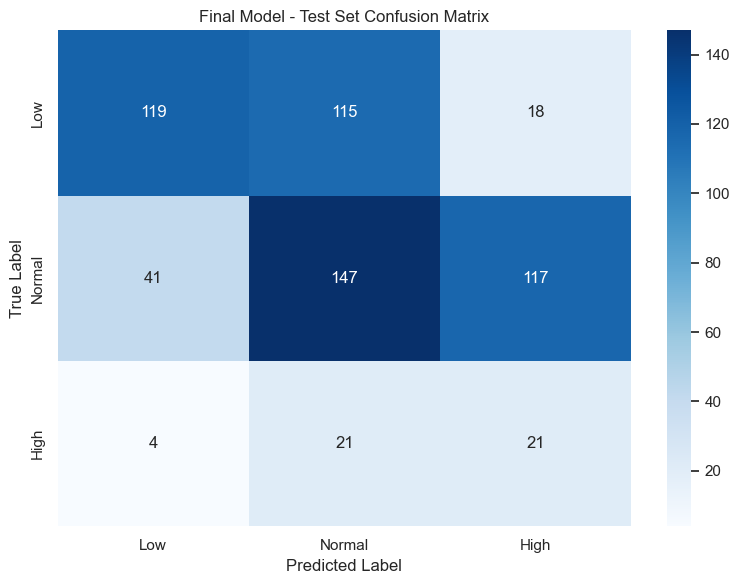


Classification Report:
              precision    recall  f1-score   support

         Low       0.73      0.47      0.57       252
      Normal       0.52      0.48      0.50       305
        High       0.13      0.46      0.21        46

    accuracy                           0.48       603
   macro avg       0.46      0.47      0.43       603
weighted avg       0.58      0.48      0.51       603



In [396]:
# Plot confusion matrix
plot_confusion_matrix(
    y_test_class,
    final_test_pred,
    mapping=MAPPING,
    title="Final Model - Test Set Confusion Matrix",
)

## Error Analysis of Final Model on Test Set


Now that we have our final model, we perform a comprehensive error analysis to:
1. Understand where and why the model makes mistakes
2. Identify patterns in misclassifications
3. Discover potential areas for improvement
4. Assess model reliability across different market conditions

This analysis will help us understand the model's limitations and guide future improvements.

#### 7.1 Prepare Error Analysis Dataset

Create a comprehensive dataframe with predictions, probabilities, and error flags.

In [397]:
final_test_proba = final_classification_model.predict_proba(X_test_scaled)

inverted_mapping = {v: k for k, v in MAPPING.items()}

# Create analysis dataframe
error_analysis_df = pd.DataFrame(
    {
        "true_class": y_test_class,
        "predicted_class": final_test_pred,
        "correct": y_test_class == final_test_pred,
        "error": y_test_class != final_test_pred,
        "prob_low": final_test_proba[:, 0],
        "prob_normal": final_test_proba[:, 1],
        "prob_high": final_test_proba[:, 2],
        "max_prob": final_test_proba.max(axis=1),
        "true_class_name": [inverted_mapping[c] for c in y_test_class],
        "predicted_class_name": [inverted_mapping[c] for c in final_test_pred],
    }
)

# Add actual volatility values
error_analysis_df["actual_volatility"] = y_test.values

# Add date index
error_analysis_df.index = y_test.index

# Calculate confidence (max probability)
error_analysis_df["confidence"] = error_analysis_df["max_prob"]

# Display summary
print("\nError Analysis Dataset Summary:")
print("=" * 80)
print(f"Total samples: {len(error_analysis_df)}")
print(
    f"Correct predictions: {error_analysis_df['correct'].sum()} ({error_analysis_df['correct'].mean() * 100:.2f}%)"
)
print(
    f"Incorrect predictions: {error_analysis_df['error'].sum()} ({error_analysis_df['error'].mean() * 100:.2f}%)"
)
print("=" * 80)

# Sample of error cases
print("\nSample of Error Cases:")
error_analysis_df[error_analysis_df["error"]].head(10)


Error Analysis Dataset Summary:
Total samples: 603
Correct predictions: 287 (47.60%)
Incorrect predictions: 316 (52.40%)

Sample of Error Cases:


,true_class,predicted_class,correct,error,prob_low,prob_normal,prob_high,max_prob,true_class_name,predicted_class_name,actual_volatility,confidence
Date,,,,,,,,,,,,
2024-04-22,1,2,False,True,0.056859,0.404905,0.538235,0.538235,Normal,High,0.580248,0.538235
2024-04-23,1,2,False,True,0.057163,0.400174,0.542663,0.542663,Normal,High,0.583296,0.542663
2024-04-24,1,2,False,True,0.058762,0.396685,0.544553,0.544553,Normal,High,0.571236,0.544553
2024-04-25,1,2,False,True,0.055353,0.387801,0.556846,0.556846,Normal,High,0.572018,0.556846
2024-04-26,1,2,False,True,0.060178,0.389444,0.550378,0.550378,Normal,High,0.571878,0.550378
2024-04-27,1,2,False,True,0.061062,0.387104,0.551834,0.551834,Normal,High,0.572278,0.551834
2024-04-28,1,2,False,True,0.067970,0.386317,0.545712,0.545712,Normal,High,0.575499,0.545712
2024-04-29,1,2,False,True,0.063067,0.377396,0.559537,0.559537,Normal,High,0.576374,0.559537
2024-04-30,1,2,False,True,0.045791,0.350431,0.603777,0.603777,Normal,High,0.543911,0.603777


#### 7.2 Enhanced Confusion Matrix Analysis

Create detailed confusion matrix with both counts and percentages

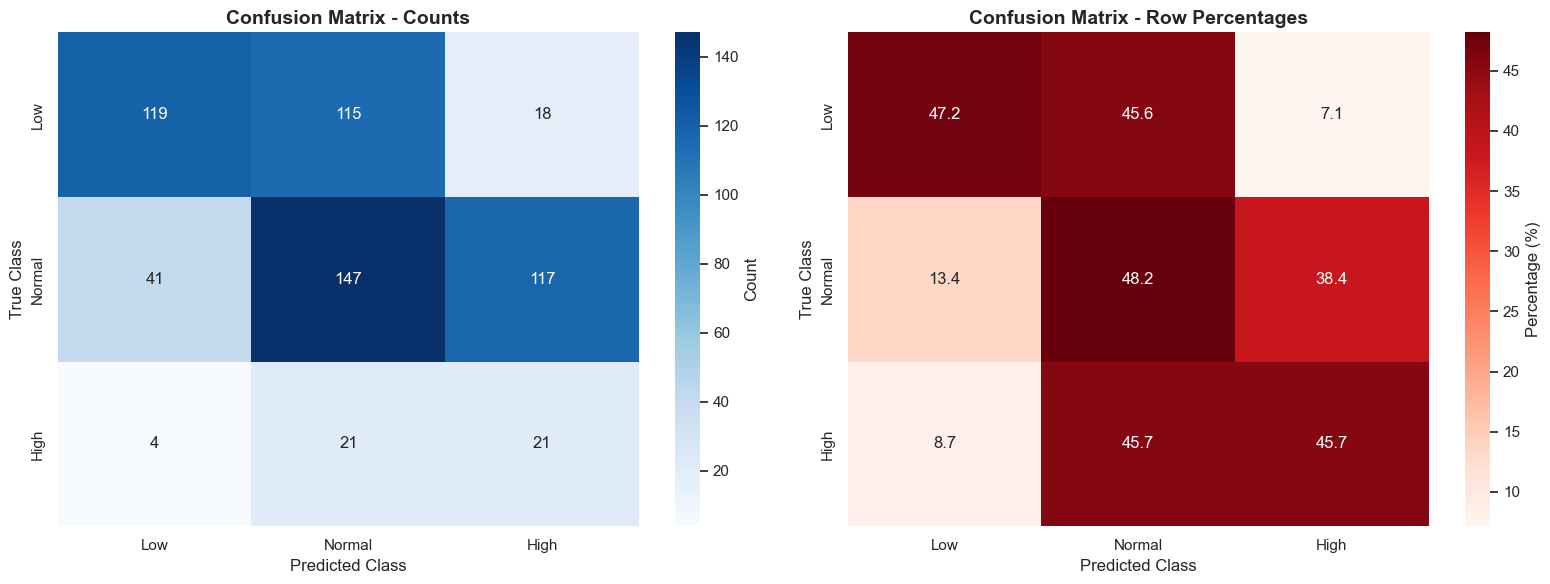

In [274]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_class, final_test_pred)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Counts
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[inverted_mapping[i] for i in range(3)],
    yticklabels=[inverted_mapping[i] for i in range(3)],
    ax=axes[0],
    cbar_kws={"label": "Count"},
)
axes[0].set_title("Confusion Matrix - Counts", fontsize=14, fontweight="bold")
axes[0].set_ylabel("True Class", fontsize=12)
axes[0].set_xlabel("Predicted Class", fontsize=12)

# Plot 2: Percentages (row-normalized)
cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(
    cm_percent,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    xticklabels=[inverted_mapping[i] for i in range(3)],
    yticklabels=[inverted_mapping[i] for i in range(3)],
    ax=axes[1],
    cbar_kws={"label": "Percentage (%)"},
)
axes[1].set_title("Confusion Matrix - Row Percentages", fontsize=14, fontweight="bold")
axes[1].set_ylabel("True Class", fontsize=12)
axes[1].set_xlabel("Predicted Class", fontsize=12)

plt.tight_layout()
plt.show()

In [275]:
# Detailed confusion analysis
print("\nDetailed Confusion Matrix Analysis:")
print("=" * 80)
for i, true_label in enumerate([inverted_mapping[j] for j in range(3)]):
    print(f"\nTrue Class: {true_label}")
    total = cm[i].sum()
    for j, pred_label in enumerate([inverted_mapping[k] for k in range(3)]):
        count = cm[i, j]
        pct = (count / total * 100) if total > 0 else 0
        status = "Correct" if i == j else "Error"
        print(f"Predicted as {pred_label}: {count} ({pct:.1f}%) {status}")
print("=" * 80)


Detailed Confusion Matrix Analysis:

True Class: Low
Predicted as Low: 119 (47.2%) Correct
Predicted as Normal: 115 (45.6%) Error
Predicted as High: 18 (7.1%) Error

True Class: Normal
Predicted as Low: 41 (13.4%) Error
Predicted as Normal: 147 (48.2%) Correct
Predicted as High: 117 (38.4%) Error

True Class: High
Predicted as Low: 4 (8.7%) Error
Predicted as Normal: 21 (45.7%) Error
Predicted as High: 21 (45.7%) Correct


#### 7.3 Misclassification Pattern Analysis

Identify the most frequent types of errors

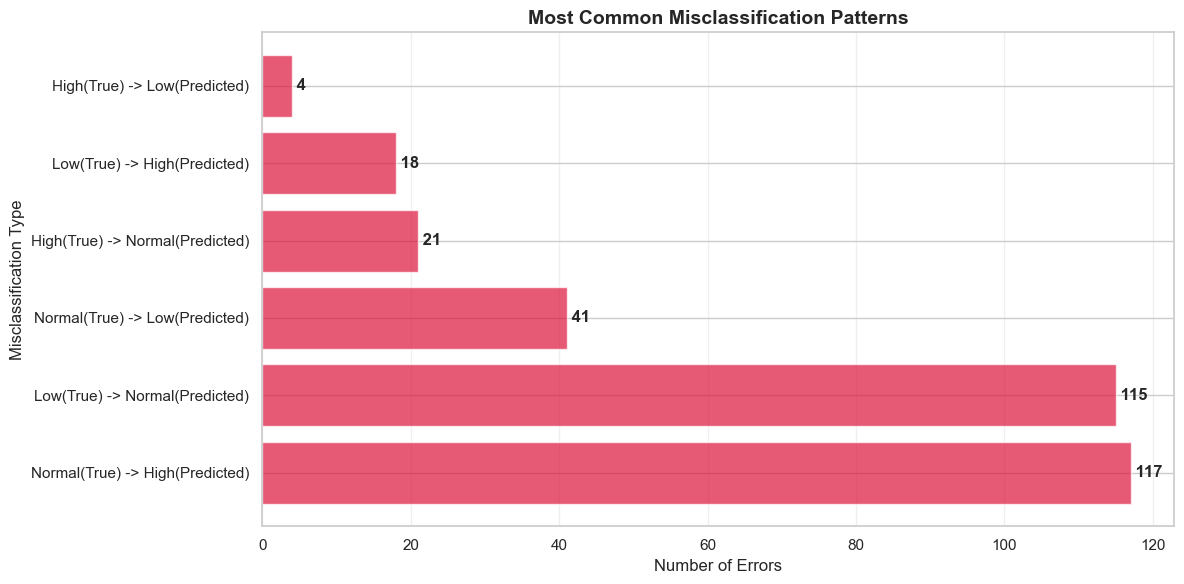

In [276]:
# Misclassification summary
misclass_patterns = []
for true_cls in range(3):
    for pred_cls in range(3):
        if true_cls != pred_cls:
            count = ((y_test_class == true_cls) & (final_test_pred == pred_cls)).sum()
            if count > 0:
                misclass_patterns.append(
                    {
                        "True Class": inverted_mapping[true_cls],
                        "Predicted As": inverted_mapping[pred_cls],
                        "Count": count,
                        "Error Type": f"{inverted_mapping[true_cls]}(True) -> {inverted_mapping[pred_cls]}(Predicted)",
                    }
                )

misclass_df = pd.DataFrame(misclass_patterns).sort_values("Count", ascending=False)

# Visualize misclassification patterns
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    misclass_df["Error Type"], misclass_df["Count"], color="crimson", alpha=0.7
)
ax.set_xlabel("Number of Errors", fontsize=12)
ax.set_ylabel("Misclassification Type", fontsize=12)
ax.set_title("Most Common Misclassification Patterns", fontsize=14, fontweight="bold")
ax.grid(axis="x", alpha=0.3)

# Add count labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f" {int(width)}",
        ha="left",
        va="center",
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

In [277]:
# Summary
print("\nMisclassification Pattern Summary:")
print("=" * 80)
print(misclass_df.to_string(index=False))
print("=" * 80)

# Calculate severity of errors
print("\nError Severity Analysis:")
print("Adjacent class errors (e.g., Normal->High): Less severe")
print("Distant class errors (e.g., Low->High): More severe")
print()
adjacent_errors = misclass_df[
    misclass_df["Error Type"].isin(
        [
            "Low(True) -> Normal(Predicted)",
            "Normal(True) -> Low(Predicted)",
            "Normal(True) -> High(Predicted)",
            "High(True) -> Normal(Predicted)",
        ]
    )
]["Count"].sum()
distant_errors = misclass_df[
    misclass_df["Error Type"].isin(
        ["Low(True) -> High(Predicted)", "High(True) -> Low(Predicted)"]
    )
]["Count"].sum()
total_errors = error_analysis_df["error"].sum()

print(
    f"Adjacent class errors: {adjacent_errors} ({adjacent_errors / total_errors * 100:.1f}%)"
)
print(
    f"Distant class errors: {distant_errors} ({distant_errors / total_errors * 100:.1f}%)"
)
print("=" * 80)


Misclassification Pattern Summary:
True Class Predicted As  Count                      Error Type
    Normal         High    117 Normal(True) -> High(Predicted)
       Low       Normal    115  Low(True) -> Normal(Predicted)
    Normal          Low     41  Normal(True) -> Low(Predicted)
      High       Normal     21 High(True) -> Normal(Predicted)
       Low         High     18    Low(True) -> High(Predicted)
      High          Low      4    High(True) -> Low(Predicted)

Error Severity Analysis:
Adjacent class errors (e.g., Normal->High): Less severe
Distant class errors (e.g., Low->High): More severe

Adjacent class errors: 294 (93.0%)
Distant class errors: 22 (7.0%)


#### 7.4 Temporal Error Distribution

Analyze how errors are distributed over time and their relationship with volatility


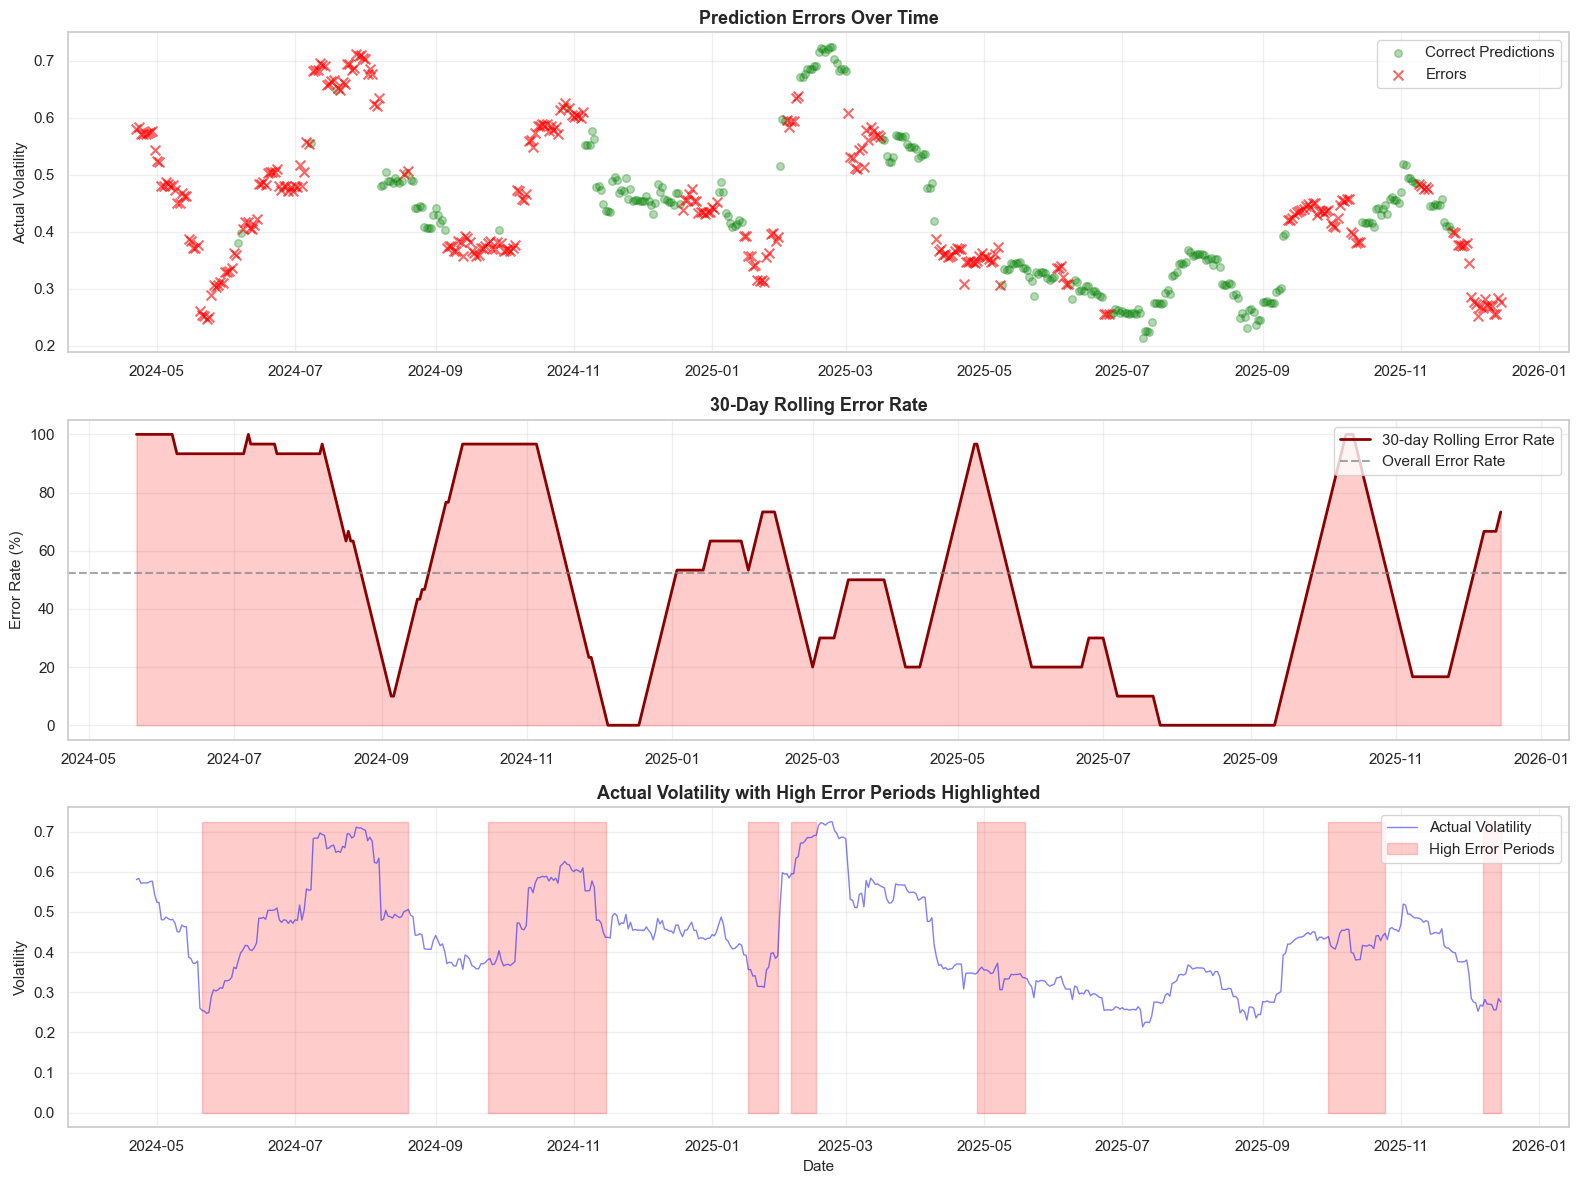

In [278]:
# Figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Errors over time
axes[0].scatter(
    error_analysis_df.index[error_analysis_df["correct"]],
    error_analysis_df.loc[error_analysis_df["correct"], "actual_volatility"],
    c="green",
    alpha=0.3,
    s=30,
    label="Correct Predictions",
)
axes[0].scatter(
    error_analysis_df.index[error_analysis_df["error"]],
    error_analysis_df.loc[error_analysis_df["error"], "actual_volatility"],
    c="red",
    alpha=0.6,
    s=50,
    marker="x",
    label="Errors",
)
axes[0].set_ylabel("Actual Volatility", fontsize=11)
axes[0].set_title("Prediction Errors Over Time", fontsize=13, fontweight="bold")
axes[0].legend(loc="upper right")
axes[0].grid(alpha=0.3)

# Plot 2: Rolling error rate
window = 30
error_analysis_df["error_numeric"] = error_analysis_df["error"].astype(int)
rolling_error_rate = (
    error_analysis_df["error_numeric"].rolling(window=window).mean() * 100
)

axes[1].plot(
    error_analysis_df.index,
    rolling_error_rate,
    color="darkred",
    linewidth=2,
    label=f"{window}-day Rolling Error Rate",
)
axes[1].axhline(
    y=error_analysis_df["error"].mean() * 100,
    color="gray",
    linestyle="--",
    alpha=0.7,
    label="Overall Error Rate",
)
axes[1].fill_between(
    error_analysis_df.index, 0, rolling_error_rate, color="red", alpha=0.2
)
axes[1].set_ylabel("Error Rate (%)", fontsize=11)
axes[1].set_title(f"{window}-Day Rolling Error Rate", fontsize=13, fontweight="bold")
axes[1].legend(loc="upper right")
axes[1].grid(alpha=0.3)

# Plot 3: Actual volatility over time with error highlighting
axes[2].plot(
    error_analysis_df.index,
    error_analysis_df["actual_volatility"],
    color="blue",
    alpha=0.5,
    linewidth=1,
    label="Actual Volatility",
)
# Highlight high error periods
high_error_threshold = (
    error_analysis_df["error"].mean() + error_analysis_df["error"].std()
)
high_error_periods = rolling_error_rate > (error_analysis_df["error"].mean() * 100 + 10)
axes[2].fill_between(
    error_analysis_df.index,
    0,
    error_analysis_df["actual_volatility"].max(),
    where=high_error_periods,
    color="red",
    alpha=0.2,
    label="High Error Periods",
)
axes[2].set_ylabel("Volatility", fontsize=11)
axes[2].set_xlabel("Date", fontsize=11)
axes[2].set_title(
    "Actual Volatility with High Error Periods Highlighted",
    fontsize=13,
    fontweight="bold",
)
axes[2].legend(loc="upper right")
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [281]:
# Identify periods with highest error rates
print("\nPeriods with Highest Error Rates:")
print("=" * 80)
error_by_month = (
    error_analysis_df.groupby(error_analysis_df.index.to_period("M"))["error"]
    .mean()
    .sort_values(ascending=False)
)
print(error_by_month.head(10).to_string())
print("=" * 80)


Periods with Highest Error Rates:
Date
2024-04    1.000000
2024-05    1.000000
2025-12    1.000000
2024-10    0.967742
2024-07    0.935484
2024-06    0.933333
2024-09    0.800000
2025-04    0.700000
2025-09    0.633333
2025-01    0.612903
Freq: M


#### 7.5 Error Rate by True Class

Analyze which volatility classes are most difficult to predict


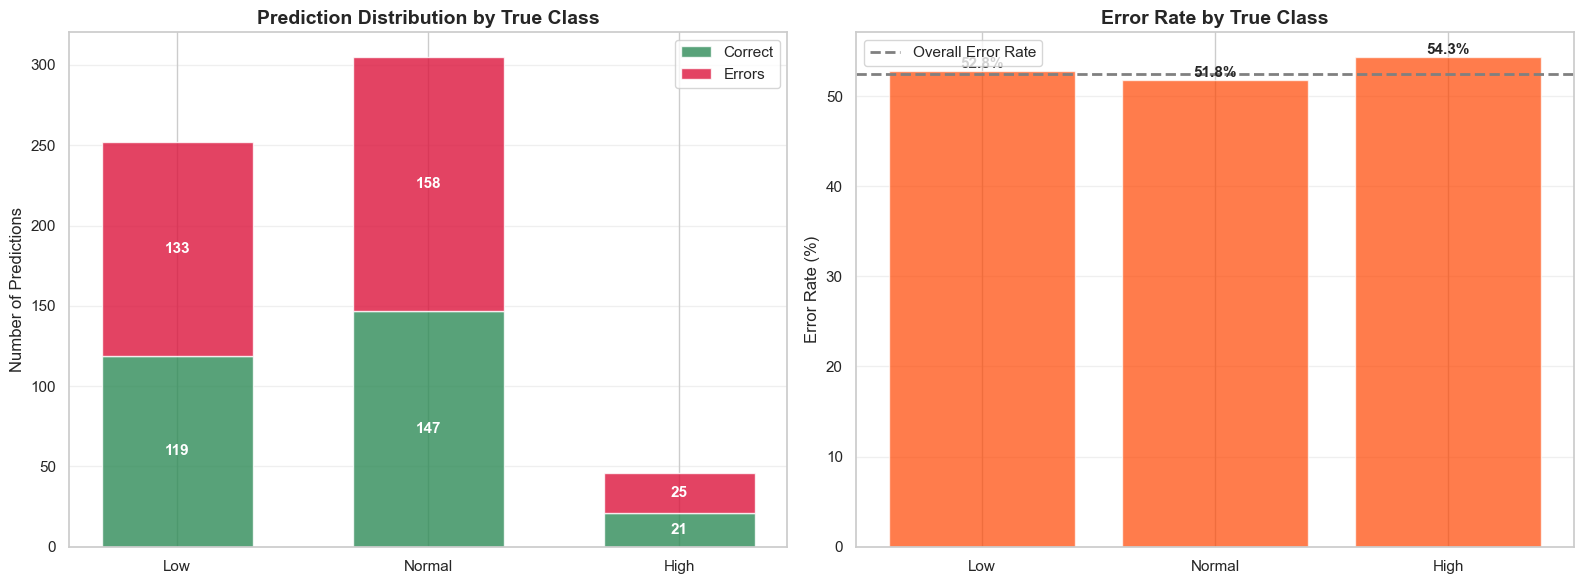

In [282]:
# Calculate metrics per class
class_error_analysis = []
for cls in range(3):
    class_mask = y_test_class == cls
    total = class_mask.sum()
    errors = (error_analysis_df.loc[class_mask, "error"]).sum()
    error_rate = errors / total * 100 if total > 0 else 0

    class_error_analysis.append(
        {
            "Class": inverted_mapping[cls],
            "Total Samples": total,
            "Errors": errors,
            "Correct": total - errors,
            "Error Rate (%)": error_rate,
            "Accuracy (%)": 100 - error_rate,
        }
    )

class_error_df = pd.DataFrame(class_error_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked bar chart
classes = class_error_df["Class"]
correct = class_error_df["Correct"]
errors = class_error_df["Errors"]

x = np.arange(len(classes))
width = 0.6

bars1 = axes[0].bar(x, correct, width, label="Correct", color="seagreen", alpha=0.8)
bars2 = axes[0].bar(
    x, errors, width, bottom=correct, label="Errors", color="crimson", alpha=0.8
)

axes[0].set_ylabel("Number of Predictions", fontsize=12)
axes[0].set_title(
    "Prediction Distribution by True Class", fontsize=14, fontweight="bold"
)
axes[0].set_xticks(x)
axes[0].set_xticklabels(classes)
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)

# Add count labels
for bar1, bar2 in zip(bars1, bars2):
    h1 = bar1.get_height()
    h2 = bar2.get_height()
    axes[0].text(
        bar1.get_x() + bar1.get_width() / 2,
        h1 / 2,
        f"{int(h1)}",
        ha="center",
        va="center",
        fontweight="bold",
        color="white",
        fontsize=11,
    )
    if h2 > 0:
        axes[0].text(
            bar2.get_x() + bar2.get_width() / 2,
            h1 + h2 / 2,
            f"{int(h2)}",
            ha="center",
            va="center",
            fontweight="bold",
            color="white",
            fontsize=11,
        )

# Plot 2: Error rate comparison
bars = axes[1].bar(
    classes, class_error_df["Error Rate (%)"], color="orangered", alpha=0.7
)
axes[1].axhline(
    y=error_analysis_df["error"].mean() * 100,
    color="gray",
    linestyle="--",
    linewidth=2,
    label="Overall Error Rate",
)
axes[1].set_ylabel("Error Rate (%)", fontsize=12)
axes[1].set_title("Error Rate by True Class", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=11,
    )

plt.tight_layout()
plt.show()

In [283]:
# Print detailed table
print("\nError Analysis by True Class:")
class_error_df


Error Analysis by True Class:


,Class,Total Samples,Errors,Correct,Error Rate (%),Accuracy (%)
0,Low,252,133,119,52.777778,47.222222
1,Normal,305,158,147,51.803279,48.196721
2,High,46,25,21,54.347826,45.652174


In [284]:
# Identify hardest class
hardest_class = class_error_df.loc[class_error_df["Error Rate (%)"].idxmax(), "Class"]
hardest_error_rate = class_error_df["Error Rate (%)"].max()
print(
    f"\nMost Difficult Class to Predict: {hardest_class} ({hardest_error_rate:.1f}% error rate)"
)


Most Difficult Class to Predict: High (54.3% error rate)


#### 7.6 Feature Analysis: Correct vs Incorrect Predictions
Compare feature distributions between correct and incorrect predictions

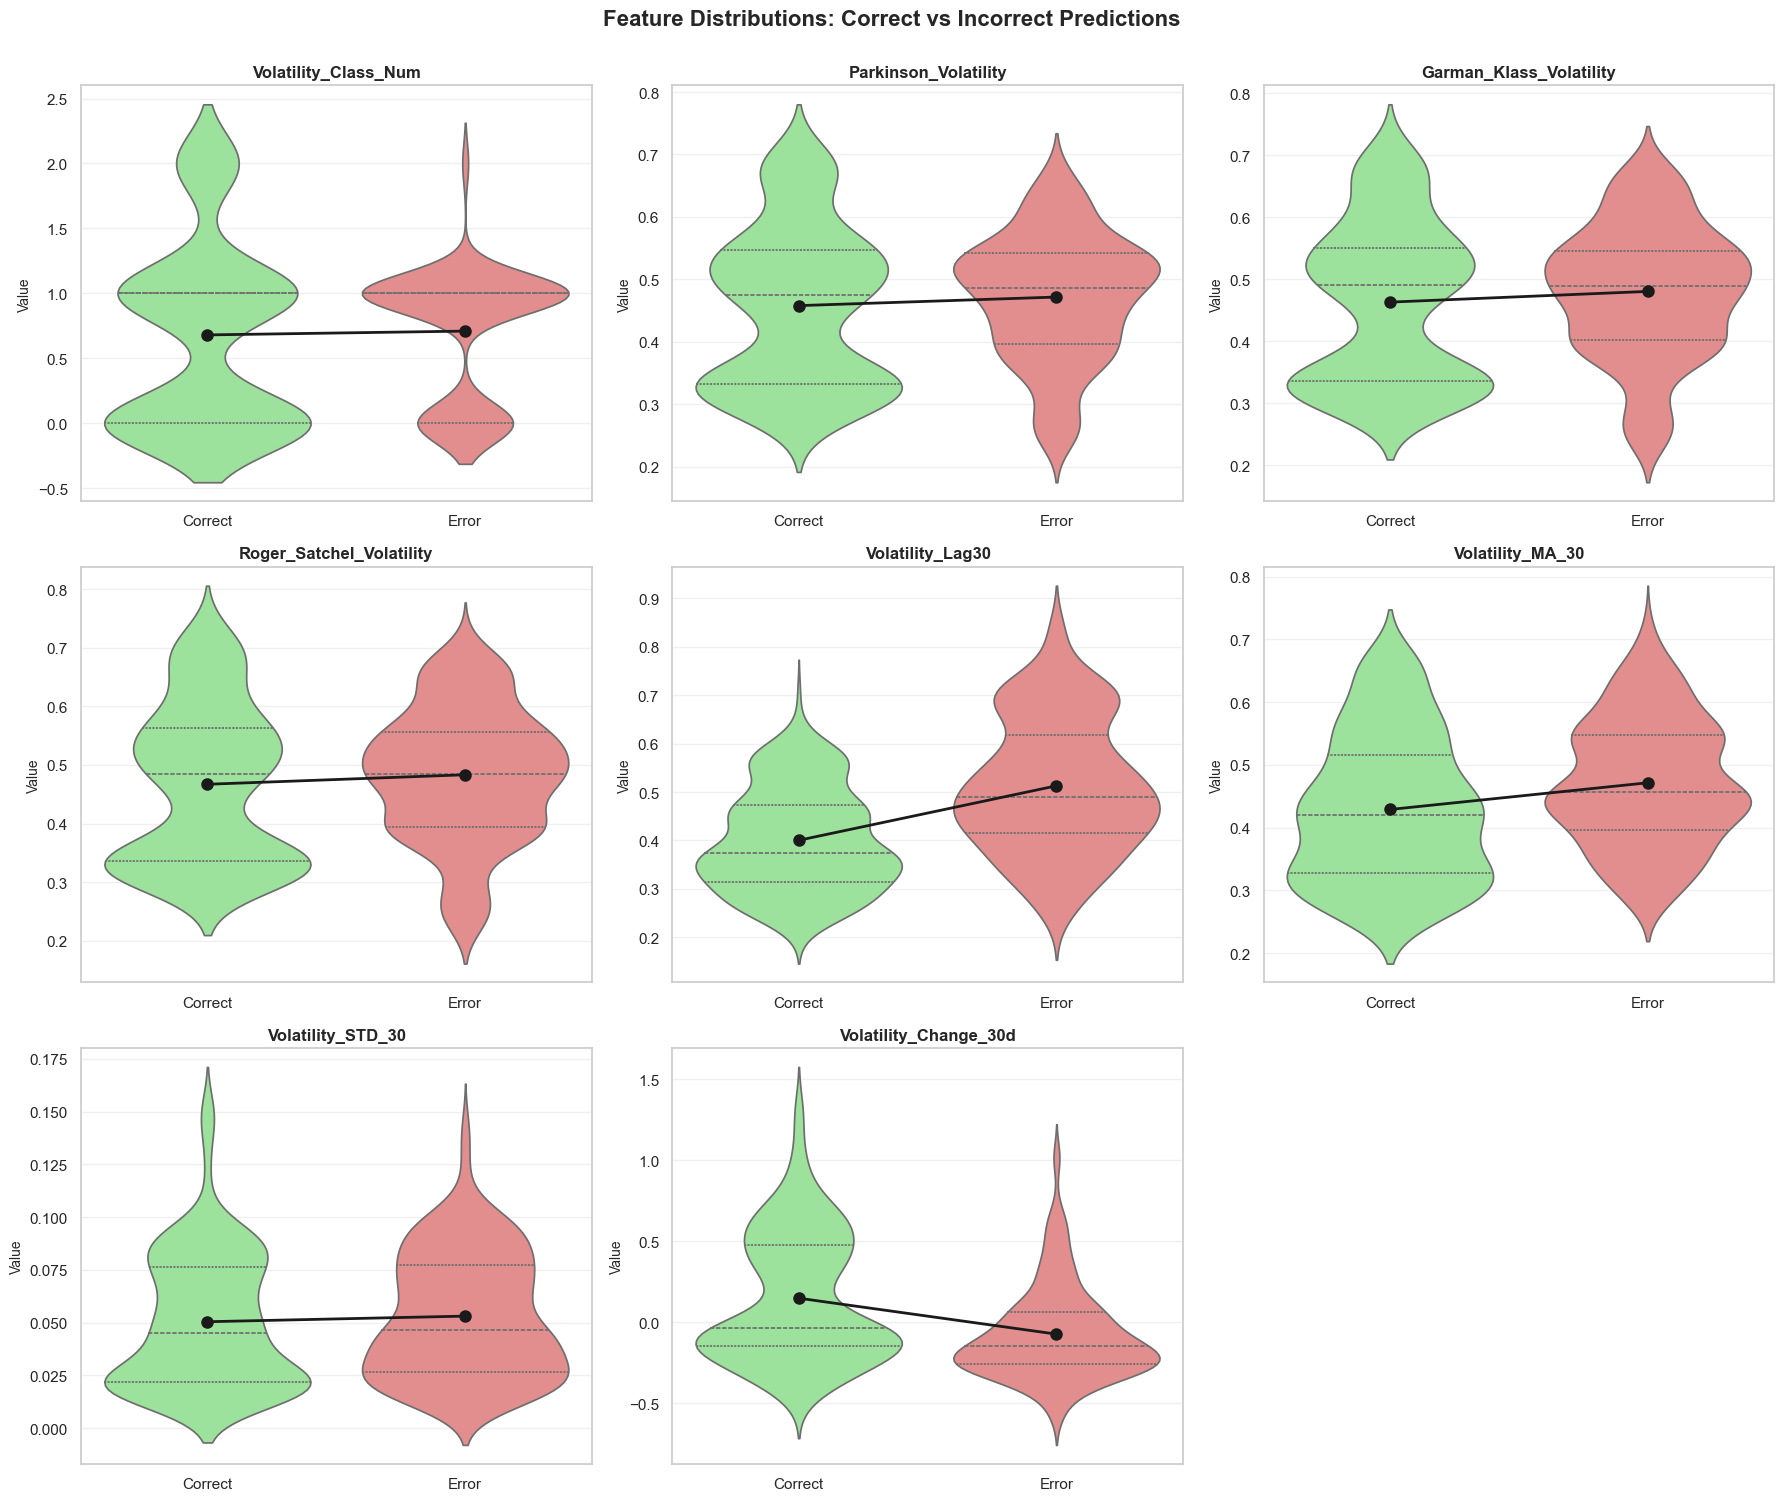

In [ ]:
# Select key features for visualization
key_features = BEST_FEATURES

features_length = len(key_features)

# Prepare data
feature_comparison_data = []
for feature in key_features:
    correct_vals = X_test_best.loc[error_analysis_df["correct"], feature]
    error_vals = X_test_best.loc[error_analysis_df["error"], feature]

    for val, label in zip([correct_vals, error_vals], ["Correct", "Error"]):
        for v in val:
            feature_comparison_data.append(
                {"Feature": feature, "Value": v, "Prediction": label}
            )

feature_comp_df = pd.DataFrame(feature_comparison_data)

# Calculate optimal grid layout
n_cols = 3
n_rows = int(np.ceil(features_length / n_cols))

# Create violin plots with dynamic layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    feature_data = feature_comp_df[feature_comp_df["Feature"] == feature]

    sns.violinplot(
        data=feature_data,
        x="Prediction",
        y="Value",
        hue="Prediction",
        palette={"Correct": "lightgreen", "Error": "lightcoral"},
        ax=axes[idx],
        inner="quartile",
        legend=False,
    )

    axes[idx].set_title(f"{feature}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Value", fontsize=10)
    axes[idx].grid(axis="y", alpha=0.3)

    # Add mean markers
    correct_mean = X_test_best.loc[error_analysis_df["correct"], feature].mean()
    error_mean = X_test_best.loc[error_analysis_df["error"], feature].mean()
    axes[idx].plot([0, 1], [correct_mean, error_mean], "ko-", linewidth=2, markersize=8)

# Hide unused subplots
for idx in range(features_length, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(
    "Feature Distributions: Correct vs Incorrect Predictions",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)
plt.tight_layout()
plt.show()

In [289]:
# Statistical comparison
print("\nFeature Statistics: Correct vs Incorrect Predictions")
print("=" * 100)
print(
    f"{'Feature':<30} {'Correct Mean':<15} {'Error Mean':<15} {'Difference':<15} {'% Diff':<10}"
)
print("-" * 100)

for feature in key_features:
    correct_mean = X_test_best.loc[error_analysis_df["correct"], feature].mean()
    error_mean = X_test_best.loc[error_analysis_df["error"], feature].mean()
    diff = error_mean - correct_mean
    pct_diff = (diff / correct_mean * 100) if correct_mean != 0 else 0

    print(
        f"{feature:<30} {correct_mean:<15.4f} {error_mean:<15.4f} {diff:<15.4f} {pct_diff:<10.2f}%"
    )

print("=" * 100)


Feature Statistics: Correct vs Incorrect Predictions
Feature                        Correct Mean    Error Mean      Difference      % Diff    
----------------------------------------------------------------------------------------------------
Volatility_Class_Num           0.6794          0.7089          0.0294          4.33      %
Parkinson_Volatility           0.4580          0.4718          0.0137          3.00      %
Garman_Klass_Volatility        0.4628          0.4801          0.0173          3.73      %
Roger_Satchel_Volatility       0.4671          0.4833          0.0162          3.47      %
Volatility_Lag30               0.4003          0.5129          0.1125          28.11     %
Volatility_MA_30               0.4289          0.4714          0.0426          9.93      %
Volatility_STD_30              0.0505          0.0531          0.0027          5.27      %
Volatility_Change_30d          0.1489          -0.0730         -0.2219         -148.99   %


#### 7.7 Prediction Confidence Analysis

The relationship between model confidence and prediction accuracy

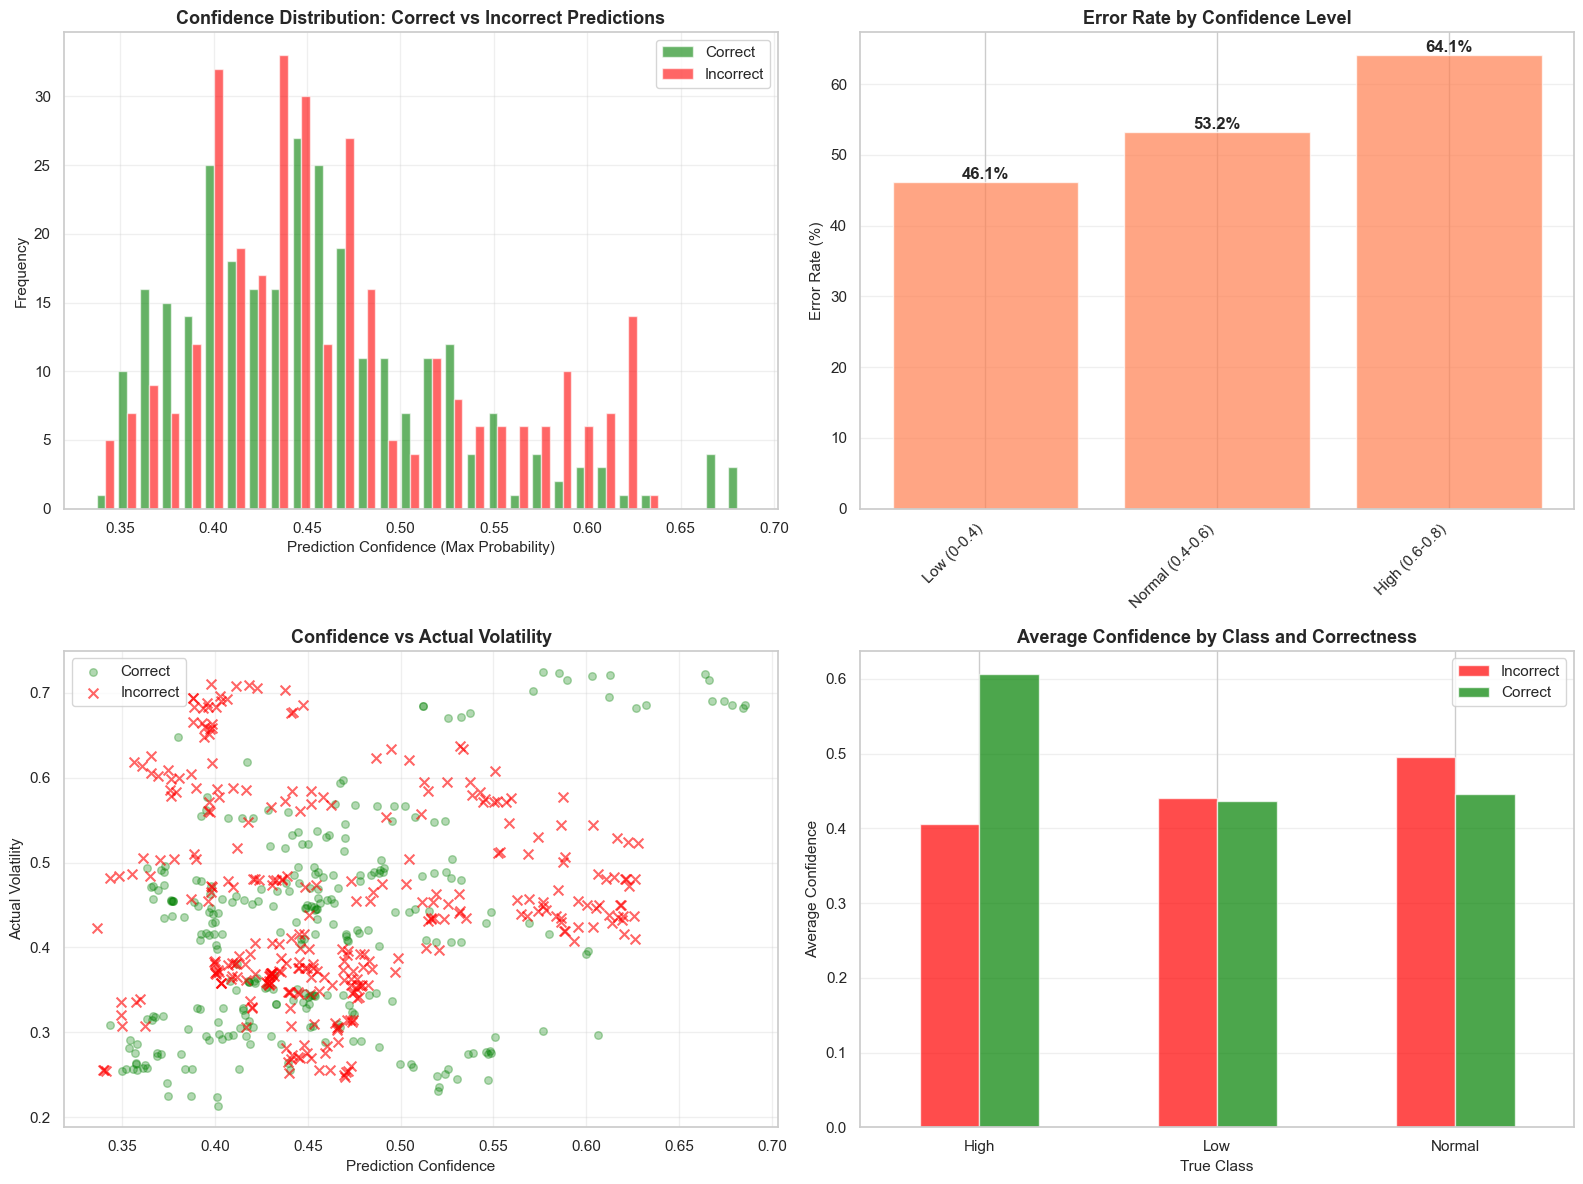

In [ ]:
# Create confidence bins
error_analysis_df["confidence_bin"] = pd.cut(
    error_analysis_df["confidence"],
    bins=[0, 0.4, 0.6, 0.8, 1.0],
    labels=["Low (0-0.4)", "Medium (0.4-0.6)", "High (0.6-0.8)", "Very High (0.8-1.0)"],
)

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Confidence distribution for correct vs incorrect
axes[0, 0].hist(
    [
        error_analysis_df.loc[error_analysis_df["correct"], "confidence"],
        error_analysis_df.loc[error_analysis_df["error"], "confidence"],
    ],
    bins=30,
    label=["Correct", "Incorrect"],
    color=["green", "red"],
    alpha=0.6,
)
axes[0, 0].set_xlabel("Prediction Confidence (Max Probability)", fontsize=11)
axes[0, 0].set_ylabel("Frequency", fontsize=11)
axes[0, 0].set_title(
    "Confidence Distribution: Correct vs Incorrect Predictions",
    fontsize=13,
    fontweight="bold",
)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Error rate by confidence bin
conf_error_analysis = (
    error_analysis_df.groupby("confidence_bin", observed=True)
    .agg({"error": ["sum", "count", "mean"]})
    .reset_index()
)
conf_error_analysis.columns = ["Confidence Bin", "Errors", "Total", "Error Rate"]
conf_error_analysis["Error Rate"] *= 100

bars = axes[0, 1].bar(
    range(len(conf_error_analysis)),
    conf_error_analysis["Error Rate"],
    color="coral",
    alpha=0.7,
)
axes[0, 1].set_xticks(range(len(conf_error_analysis)))
axes[0, 1].set_xticklabels(
    conf_error_analysis["Confidence Bin"], rotation=45, ha="right"
)
axes[0, 1].set_ylabel("Error Rate (%)", fontsize=11)
axes[0, 1].set_title("Error Rate by Confidence Level", fontsize=13, fontweight="bold")
axes[0, 1].grid(axis="y", alpha=0.3)

for bar, val in zip(bars, conf_error_analysis["Error Rate"]):
    axes[0, 1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Plot 3: Scatter plot - confidence vs actual volatility colored by correctness
axes[1, 0].scatter(
    error_analysis_df.loc[error_analysis_df["correct"], "confidence"],
    error_analysis_df.loc[error_analysis_df["correct"], "actual_volatility"],
    c="green",
    alpha=0.3,
    s=30,
    label="Correct",
)
axes[1, 0].scatter(
    error_analysis_df.loc[error_analysis_df["error"], "confidence"],
    error_analysis_df.loc[error_analysis_df["error"], "actual_volatility"],
    c="red",
    alpha=0.6,
    s=50,
    marker="x",
    label="Incorrect",
)
axes[1, 0].set_xlabel("Prediction Confidence", fontsize=11)
axes[1, 0].set_ylabel("Actual Volatility", fontsize=11)
axes[1, 0].set_title("Confidence vs Actual Volatility", fontsize=13, fontweight="bold")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Average confidence by true class and correctness
conf_by_class = (
    error_analysis_df.groupby(["true_class_name", "correct"])["confidence"]
    .mean()
    .unstack()
)
conf_by_class.plot(kind="bar", ax=axes[1, 1], color=["red", "green"], alpha=0.7)
axes[1, 1].set_ylabel("Average Confidence", fontsize=11)
axes[1, 1].set_xlabel("True Class", fontsize=11)
axes[1, 1].set_title(
    "Average Confidence by Class and Correctness", fontsize=13, fontweight="bold"
)
axes[1, 1].legend(["Incorrect", "Correct"])
axes[1, 1].set_xticklabels(conf_by_class.index, rotation=0)
axes[1, 1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

In [291]:
# Confidence analysis summary
print("\nConfidence Statistics:")
print("=" * 80)
print(
    f"Average confidence (correct predictions): {error_analysis_df.loc[error_analysis_df['correct'], 'confidence'].mean():.4f}"
)
print(
    f"Average confidence (incorrect predictions): {error_analysis_df.loc[error_analysis_df['error'], 'confidence'].mean():.4f}"
)
print("\nError Rate by Confidence Bin:")
print(conf_error_analysis.to_string(index=False))
print("=" * 80)


Confidence Statistics:
Average confidence (correct predictions): 0.4541
Average confidence (incorrect predictions): 0.4655

Error Rate by Confidence Bin:
  Confidence Bin  Errors  Total  Error Rate
     Low (0-0.4)      59    128   46.093750
Normal (0.4-0.6)     232    436   53.211009
  High (0.6-0.8)      25     39   64.102564
